In [1]:
#ROI masked, individual social features (ToMs, ToM, Social Interaction, Valence, Arousal) predicting STS and MT
#permutation + null dist difference!

In [1]:
# Functional imports
import os 
import numpy as np
import nibabel as nib

from data_prep_helpers import make_vol
from plotting_helpers import darken_color, plot_lateral_only, plot_lateral_only_with_vmax, plot_surfaces, plot_surfaces_with_vmax
import data_prep_helpers_new as helpers_new
# Notebook specific imports
import warnings
import sys 
if not sys.warnoptions:
    warnings.simplefilter("ignore")
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%autosave 5

/home/imelizabeth/.conda/envs/cloudy2/lib/python3.6/site-packages/nilearn/__init__.py:69: FutureWarning: Python 3.6 support is deprecated and will be removed in release 0.10 of Nilearn. Consider switching to Python 3.8 or 3.9.
  _python_deprecation_warnings()


Autosaving every 5 seconds


In [2]:
# Set data location
directory = os.path.join(os.path.expanduser('~'), 'data-lisik3', 'imelizabeth', 'partly_cloudy-main', 'data')
print('Data location:', directory)

# Load masks
mask = nib.load(os.path.join(directory, 'adult_isc_mask.nii.gz'))
print('ISC Mask:', np.shape(mask))

group_mask = nib.load(os.path.join(directory, 'group_mask.nii.gz'))
print('Anatomical mask:', np.shape(group_mask))

# Load mask
MT_mask_resampled_bool = nib.load(os.path.join(directory, 'adult_MT_mask.nii.gz'))
print('MT Mask shape:', np.shape(MT_mask_resampled_bool))

# Load mask
STS_mask_resampled = nib.load(os.path.join(directory, 'adult_STS_mask.nii.gz'))
print('STS Mask shape:', np.shape(STS_mask_resampled))

Data location: /home/imelizabeth/data-lisik3/imelizabeth/partly_cloudy-main/data
ISC Mask: (79, 95, 68)
Anatomical mask: (79, 95, 68)
MT Mask shape: (79, 95, 68)
STS Mask shape: (79, 95, 68)


In [3]:
import numpy as np
from sklearn.model_selection import train_test_split

def generate_null_difference_permute_groups(group1_scores, group2_scores, n_permutations):
    """
    Generates a null distribution of inter-group differences via group label permutation test.
    Returns a null distribution of dim n_permutations
    """
    all_scores = np.concatenate((group1_scores, group2_scores))
    null_dist = []

    for i in range(n_permutations):
        # Split data
        sample_group1, sample_group2 = train_test_split(all_scores, train_size=len(group1_scores), shuffle=True)

        # Calculate difference in means
        diff = np.mean(sample_group1) - np.mean(sample_group2)
        null_dist.append(diff)
    
    return null_dist

<h1>Faces</h1>

In [4]:
#Load social model scores data

face_scores_34yrs_unthresholded = np.mean(np.load(os.path.join(
    directory, '3-4-yrs', 'encoding_results', 'unthresholded_whole', '3-4-yrs_faces_only_scores_adult_isc_mask.npy')), axis=0)

face_scores_5yrs_unthresholded = np.mean(np.load(os.path.join(
    directory, '5-yrs','encoding_results', 'unthresholded', '5-yrs_faces_only_scores_adult_isc_mask.npy')), axis=0)

face_scores_7yrs_unthresholded = np.mean(np.load(os.path.join(
    directory, '7-yrs','encoding_results', 'unthresholded', '7-yrs_faces_only_scores_adult_isc_mask.npy')), axis=0)

face_scores_812yrs_unthresholded = np.mean(np.load(os.path.join(
    directory, '8-12-yrs','encoding_results', 'unthresholded', '8-12-yrs_faces_only_scores_adult_isc_mask.npy')), axis=0)

face_scores_adults_unthresholded = np.mean(np.load(os.path.join(
    directory, 'adults', 'encoding_results','unthresholded', 'adults_faces_only_scores_adult_isc_mask.npy')), axis=0)

0.031085214046437364
0.042502339836326425
0.05835496881117578
0.04483241726173937
0.05616176023568735


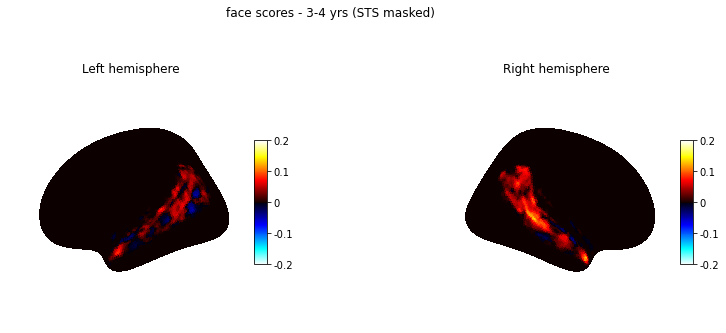

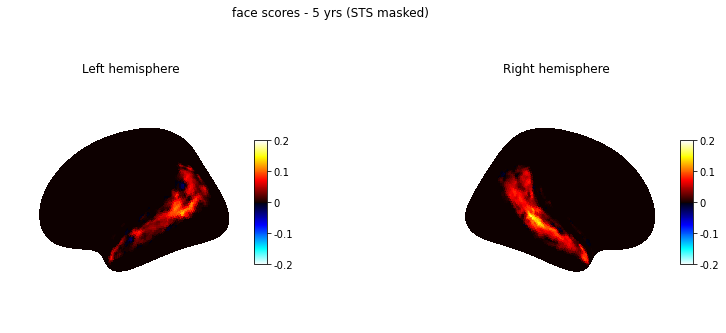

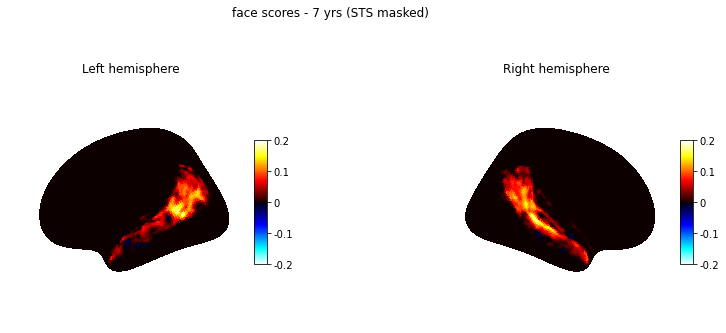

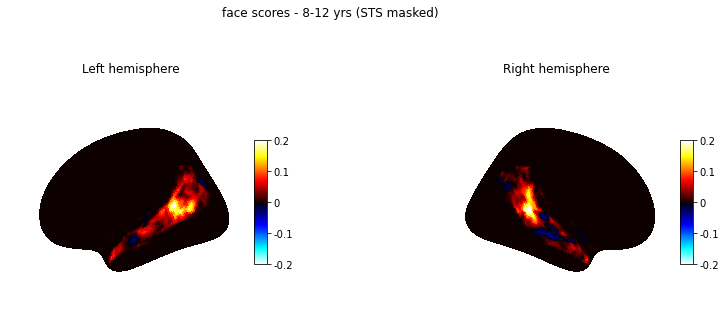

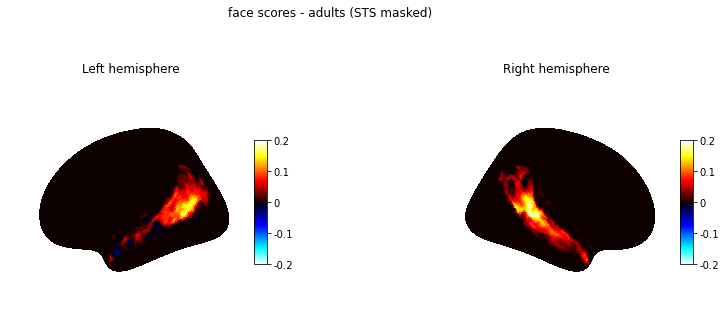

In [5]:


# mask 3-4 yrs data - STS
sts_mask_array = np.invert(STS_mask_resampled.get_fdata().astype('bool'))
face_isc_volume_34yrs = make_vol(face_scores_34yrs_unthresholded, mask)
face_isc_volume_34yrs_array = face_isc_volume_34yrs.get_fdata()
#mt_mask_array = np.invert(MT_mask_resampled_bool.get_fdata().astype('bool'))
face_sts_volume_34yrs = face_isc_volume_34yrs_array.copy()
face_sts_volume_34yrs[sts_mask_array] = 0
face_sts_volume_34yrs_image = nib.Nifti1Image(face_sts_volume_34yrs, affine=face_isc_volume_34yrs.affine, header=face_isc_volume_34yrs.header)
plot_lateral_only_with_vmax(vol=face_sts_volume_34yrs_image, 
                            title='face scores - 3-4 yrs (STS masked)', 
                            vis_threshold=0, vmax=0.2)

print(face_isc_volume_34yrs_array[np.invert(sts_mask_array)].mean())



# mask 5 yrs data - STS
sts_mask_array = np.invert(STS_mask_resampled.get_fdata().astype('bool'))
face_isc_volume_5yrs = make_vol(face_scores_5yrs_unthresholded, mask)
face_isc_volume_5yrs_array = face_isc_volume_5yrs.get_fdata()
#mt_mask_array = np.invert(MT_mask_resampled_bool.get_fdata().astype('bool'))
face_sts_volume_5yrs = face_isc_volume_5yrs_array.copy()
face_sts_volume_5yrs[sts_mask_array] = 0
face_sts_volume_5yrs_image = nib.Nifti1Image(face_sts_volume_5yrs, affine=face_isc_volume_5yrs.affine, header=face_isc_volume_5yrs.header)
plot_lateral_only_with_vmax(vol=face_sts_volume_5yrs_image, 
                            title='face scores - 5 yrs (STS masked)', 
                            vis_threshold=0, vmax=0.2)

print(face_isc_volume_5yrs_array[np.invert(sts_mask_array)].mean())

# mask 7 yrs data - STS
sts_mask_array = np.invert(STS_mask_resampled.get_fdata().astype('bool'))
face_isc_volume_7yrs = make_vol(face_scores_7yrs_unthresholded, mask)
face_isc_volume_7yrs_array = face_isc_volume_7yrs.get_fdata()
#mt_mask_array = np.invert(MT_mask_resampled_bool.get_fdata().astype('bool'))
face_sts_volume_7yrs = face_isc_volume_7yrs_array.copy()
face_sts_volume_7yrs[sts_mask_array] = 0
face_sts_volume_7yrs_image = nib.Nifti1Image(face_sts_volume_7yrs, affine=face_isc_volume_7yrs.affine, header=face_isc_volume_7yrs.header)
plot_lateral_only_with_vmax(vol=face_sts_volume_7yrs_image, 
                            title='face scores - 7 yrs (STS masked)', 
                            vis_threshold=0, vmax=0.2)

print(face_isc_volume_7yrs_array[np.invert(sts_mask_array)].mean())

# mask 8-12 yrs data - STS
sts_mask_array = np.invert(STS_mask_resampled.get_fdata().astype('bool'))
face_isc_volume_812yrs = make_vol(face_scores_812yrs_unthresholded, mask)
face_isc_volume_812yrs_array = face_isc_volume_812yrs.get_fdata()
#mt_mask_array = np.invert(MT_mask_resampled_bool.get_fdata().astype('bool'))
face_sts_volume_812yrs = face_isc_volume_812yrs_array.copy()
face_sts_volume_812yrs[sts_mask_array] = 0
face_sts_volume_812yrs_image = nib.Nifti1Image(face_sts_volume_812yrs, affine=face_isc_volume_812yrs.affine, header=face_isc_volume_812yrs.header)
plot_lateral_only_with_vmax(vol=face_sts_volume_812yrs_image, 
                            title='face scores - 8-12 yrs (STS masked)', 
                            vis_threshold=0, vmax=0.2)

print(face_isc_volume_812yrs_array[np.invert(sts_mask_array)].mean())

#mask adult data - STS
sts_mask_array = np.invert(STS_mask_resampled.get_fdata().astype('bool'))

face_isc_volume_adult = make_vol(face_scores_adults_unthresholded, mask)
face_isc_volume_adult_array = face_isc_volume_adult.get_fdata()
#sts_mask_array = np.invert(STS_mask_resampled.get_fdata().astype('bool'))
face_sts_volume_adult = face_isc_volume_adult_array.copy()
face_sts_volume_adult[sts_mask_array] = 0
face_sts_volume_adult_image = nib.Nifti1Image(face_sts_volume_adult, affine=face_isc_volume_adult.affine, header=face_isc_volume_adult.header)
plot_lateral_only_with_vmax(vol=face_sts_volume_adult_image, 
                            title='face scores - adults (STS masked)', 
                            vis_threshold=0, vmax=0.2)

print(face_isc_volume_adult_array[np.invert(sts_mask_array)].mean())


0.04907934031028913
0.05705799391066426
0.06167670295932959
0.06580719488831271
0.08769616367186688


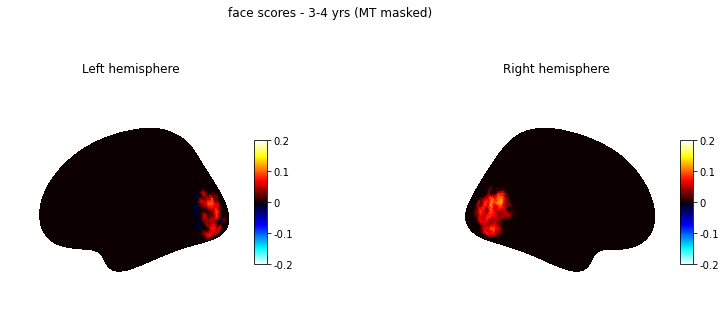

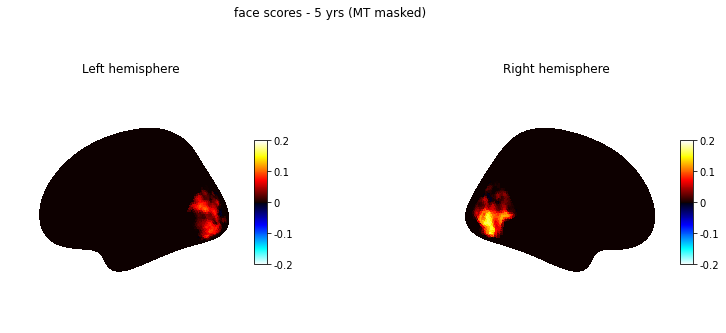

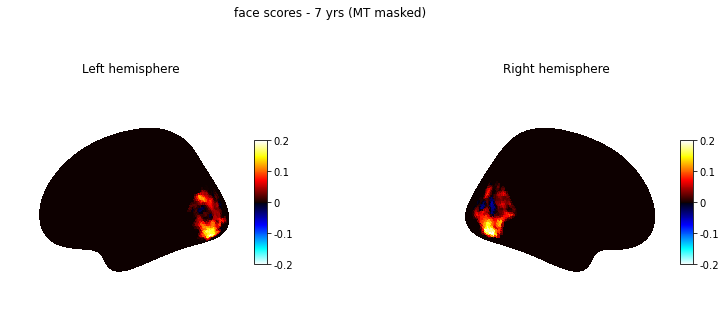

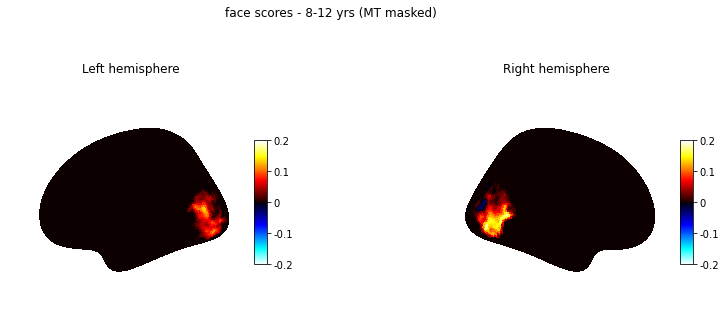

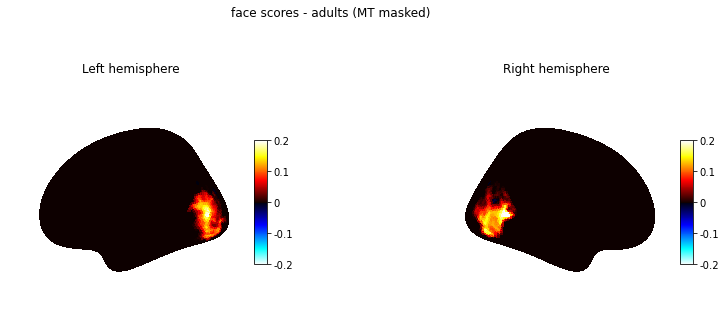

In [6]:
# mask 3-4 yrs data - MT

face_isc_volume_34yrs = make_vol(face_scores_34yrs_unthresholded, mask)
face_isc_volume_34yrs_array = face_isc_volume_34yrs.get_fdata()
MT_mask_array = np.invert(MT_mask_resampled_bool.get_fdata().astype('bool'))
face_MT_volume_34yrs = face_isc_volume_34yrs_array.copy()
face_MT_volume_34yrs[MT_mask_array] = 0
face_MT_volume_34yrs_image = nib.Nifti1Image(face_MT_volume_34yrs, affine=face_isc_volume_34yrs.affine, header=face_isc_volume_34yrs.header)
plot_lateral_only_with_vmax(vol=face_MT_volume_34yrs_image, 
                            title='face scores - 3-4 yrs (MT masked)', 
                            vis_threshold=0, vmax=0.2)

print(face_isc_volume_34yrs_array[np.invert(MT_mask_array)].mean())



# mask 5 yrs data - MT

face_isc_volume_5yrs = make_vol(face_scores_5yrs_unthresholded, mask)
face_isc_volume_5yrs_array = face_isc_volume_5yrs.get_fdata()
MT_mask_array = np.invert(MT_mask_resampled_bool.get_fdata().astype('bool'))
face_MT_volume_5yrs = face_isc_volume_5yrs_array.copy()
face_MT_volume_5yrs[MT_mask_array] = 0
face_MT_volume_5yrs_image = nib.Nifti1Image(face_MT_volume_5yrs, affine=face_isc_volume_5yrs.affine, header=face_isc_volume_5yrs.header)
plot_lateral_only_with_vmax(vol=face_MT_volume_5yrs_image, 
                            title='face scores - 5 yrs (MT masked)', 
                            vis_threshold=0, vmax=0.2)

print(face_isc_volume_5yrs_array[np.invert(MT_mask_array)].mean())

# mask 7 yrs data - MT

face_isc_volume_7yrs = make_vol(face_scores_7yrs_unthresholded, mask)
face_isc_volume_7yrs_array = face_isc_volume_7yrs.get_fdata()
MT_mask_array = np.invert(MT_mask_resampled_bool.get_fdata().astype('bool'))
face_MT_volume_7yrs = face_isc_volume_7yrs_array.copy()
face_MT_volume_7yrs[MT_mask_array] = 0
face_MT_volume_7yrs_image = nib.Nifti1Image(face_MT_volume_7yrs, affine=face_isc_volume_7yrs.affine, header=face_isc_volume_7yrs.header)
plot_lateral_only_with_vmax(vol=face_MT_volume_7yrs_image, 
                            title='face scores - 7 yrs (MT masked)', 
                            vis_threshold=0, vmax=0.2)

print(face_isc_volume_7yrs_array[np.invert(MT_mask_array)].mean())

# mask 8-12 yrs data - MT

face_isc_volume_812yrs = make_vol(face_scores_812yrs_unthresholded, mask)
face_isc_volume_812yrs_array = face_isc_volume_812yrs.get_fdata()
MT_mask_array = np.invert(MT_mask_resampled_bool.get_fdata().astype('bool'))
face_MT_volume_812yrs = face_isc_volume_812yrs_array.copy()
face_MT_volume_812yrs[MT_mask_array] = 0
face_MT_volume_812yrs_image = nib.Nifti1Image(face_MT_volume_812yrs, affine=face_isc_volume_812yrs.affine, header=face_isc_volume_812yrs.header)
plot_lateral_only_with_vmax(vol=face_MT_volume_812yrs_image, 
                            title='face scores - 8-12 yrs (MT masked)', 
                            vis_threshold=0, vmax=0.2)

print(face_isc_volume_812yrs_array[np.invert(MT_mask_array)].mean())

#mask adult data - MT
face_isc_volume_adult = make_vol(face_scores_adults_unthresholded, mask)
face_isc_volume_adult_array = face_isc_volume_adult.get_fdata()
MT_mask_array = np.invert(MT_mask_resampled_bool.get_fdata().astype('bool'))
face_MT_volume_adult = face_isc_volume_adult_array.copy()
face_MT_volume_adult[MT_mask_array] = 0
face_MT_volume_adult_image = nib.Nifti1Image(face_MT_volume_adult, affine=face_isc_volume_adult.affine, header=face_isc_volume_adult.header)
plot_lateral_only_with_vmax(vol=face_MT_volume_adult_image, 
                            title='face scores - adults (MT masked)', 
                            vis_threshold=0, vmax=0.2)

print(face_isc_volume_adult_array[np.invert(MT_mask_array)].mean())

In [7]:
#load individual subject score

subj_face_scores_34yrs_unthresholded = np.load(os.path.join(
    directory, '3-4-yrs', 'encoding_results','unthresholded_whole', '3-4-yrs_faces_only_scores_adult_isc_mask.npy')).T
print(subj_face_scores_34yrs_unthresholded.shape)
n_34yrs = subj_face_scores_34yrs_unthresholded.shape[-1]

subj_face_scores_5yrs_unthresholded = np.load(os.path.join(
    directory, '5-yrs', 'encoding_results','unthresholded', '5-yrs_faces_only_scores_adult_isc_mask.npy')).T
print(subj_face_scores_5yrs_unthresholded.shape)
n_5yrs = subj_face_scores_5yrs_unthresholded.shape[-1]

subj_face_scores_7yrs_unthresholded = np.load(os.path.join(
    directory, '7-yrs', 'encoding_results','unthresholded', '7-yrs_faces_only_scores_adult_isc_mask.npy')).T
print(subj_face_scores_7yrs_unthresholded.shape)
n_7yrs = subj_face_scores_7yrs_unthresholded.shape[-1]

subj_face_scores_812yrs_unthresholded = np.load(os.path.join(
    directory, '8-12-yrs', 'encoding_results','unthresholded', '8-12-yrs_faces_only_scores_adult_isc_mask.npy')).T
print(subj_face_scores_812yrs_unthresholded.shape)
n_812yrs = subj_face_scores_812yrs_unthresholded.shape[-1]

subj_face_scores_adults_unthresholded = np.load(os.path.join(
    directory, 'adults', 'encoding_results','unthresholded', 'adults_faces_only_scores_adult_isc_mask.npy')).T
print(subj_face_scores_adults_unthresholded.shape)
n_adults = subj_face_scores_adults_unthresholded.shape[-1]



(136543, 31)
(136543, 34)
(136543, 23)
(136543, 34)
(136543, 33)


In [8]:
### get the encoding performance correlation score for STS

sts_mask_array = STS_mask_resampled.get_fdata().astype('bool') #un-invert it bc not mapping it to brain surface

mask_volume = mask.get_fdata() > 0
print(mask_volume.shape)
print(mask_volume.size) #shape of the brain
print(mask_volume.sum())

(79, 95, 68)
510340
136543


In [9]:
### adults
print(subj_face_scores_adults_unthresholded.shape)
volume_adult = np.zeros(mask_volume.shape + (n_adults,))
volume_adult[mask_volume, :] = subj_face_scores_adults_unthresholded # change subj data to shape of the brain
sts_adult_face_score = volume_adult[sts_mask_array, :].mean(axis=0)
print(sts_adult_face_score.mean())

(136543, 33)
0.05616176023568732


In [10]:
### 3-4-yrs
print(subj_face_scores_34yrs_unthresholded.shape)
volume_34yrs = np.zeros(mask_volume.shape + (n_34yrs,))
volume_34yrs[mask_volume, :] = subj_face_scores_34yrs_unthresholded # change subj data to shape of the brain
sts_34yrs_face_score = volume_34yrs[sts_mask_array, :].mean(axis=0)
print(sts_34yrs_face_score.mean())

null_distribution = generate_null_difference_permute_groups(sts_adult_face_score, sts_34yrs_face_score, 5000)
print(np.shape(null_distribution)) #returns array of differences of a mean of randomly split (5000 times) groups
observed_difference = np.mean(sts_adult_face_score) - np.mean(sts_34yrs_face_score)
print(observed_difference)

# Compute the p-value
p_value = np.sum(np.abs(null_distribution) >= np.abs(observed_difference)) / 5000 #two-tailed p-val test

# Check significance
if p_value < 0.05:
    print("The difference between groups is statistically significant!")
else:
    print("The difference between groups is not statistically significant.")

print(p_value)


(136543, 31)
0.031085214046437312
(5000,)
0.02507654618925001
The difference between groups is statistically significant!
0.0154


In [11]:
### 5-yrs
print(subj_face_scores_5yrs_unthresholded.shape)
volume_5yrs = np.zeros(mask_volume.shape + (n_5yrs,))
volume_5yrs[mask_volume, :] = subj_face_scores_5yrs_unthresholded # change subj data to shape of the brain
sts_5yrs_face_score = volume_5yrs[sts_mask_array, :].mean(axis=0)
print(sts_5yrs_face_score.mean())

null_distribution = generate_null_difference_permute_groups(sts_adult_face_score, sts_5yrs_face_score, 5000)
print(np.shape(null_distribution)) #returns array of differences of a mean of randomly split (5000 times) groups
observed_difference = np.mean(sts_adult_face_score) - np.mean(sts_5yrs_face_score)
print(observed_difference)

# Compute the p-value
p_value = np.sum(np.abs(null_distribution) >= np.abs(observed_difference)) / 5000 #two-tailed p-val test

# Check significance
if p_value < 0.05:
    print("The difference between groups is statistically significant!")
else:
    print("The difference between groups is not statistically significant.")

print(p_value)


(136543, 34)
0.042502339836326425
(5000,)
0.013659420399360897
The difference between groups is not statistically significant.
0.218


In [12]:
### 7-yrs
print(subj_face_scores_7yrs_unthresholded.shape)
volume_7yrs = np.zeros(mask_volume.shape + (n_7yrs,))
volume_7yrs[mask_volume, :] = subj_face_scores_7yrs_unthresholded # change subj data to shape of the brain
sts_7yrs_face_score = volume_7yrs[sts_mask_array, :].mean(axis=0)
print(sts_7yrs_face_score.mean())

null_distribution = generate_null_difference_permute_groups(sts_adult_face_score, sts_7yrs_face_score, 5000)
print(np.shape(null_distribution)) #returns array of differences of a mean of randomly split (5000 times) groups
observed_difference = np.mean(sts_adult_face_score) - np.mean(sts_7yrs_face_score)
print(observed_difference)

# Compute the p-value
p_value = np.sum(np.abs(null_distribution) >= np.abs(observed_difference)) / 5000 #two-tailed p-val test

# Check significance
if p_value < 0.05:
    print("The difference between groups is statistically significant!")
else:
    print("The difference between groups is not statistically significant.")

print(p_value)

(136543, 23)
0.058354968811175835
(5000,)
-0.002193208575488513
The difference between groups is not statistically significant.
0.8492


In [13]:
### 8-12-yrs
print(subj_face_scores_812yrs_unthresholded.shape)
volume_812yrs = np.zeros(mask_volume.shape + (n_812yrs,))
volume_812yrs[mask_volume, :] = subj_face_scores_812yrs_unthresholded # change subj data to shape of the brain
sts_812yrs_face_score = volume_812yrs[sts_mask_array, :].mean(axis=0)
print(sts_812yrs_face_score.mean())

null_distribution = generate_null_difference_permute_groups(sts_adult_face_score, sts_812yrs_face_score, 5000)
print(np.shape(null_distribution)) #returns array of differences of a mean of randomly split (5000 times) groups
observed_difference = np.mean(sts_adult_face_score) - np.mean(sts_812yrs_face_score)
print(observed_difference)

# Compute the p-value
p_value = np.sum(np.abs(null_distribution) >= np.abs(observed_difference)) / 5000 #two-tailed p-val test

# Check significance
if p_value < 0.05:
    print("The difference between groups is statistically significant!")
else:
    print("The difference between groups is not statistically significant.")

print(p_value)

(136543, 34)
0.04483241726173934
(5000,)
0.011329342973947984
The difference between groups is not statistically significant.
0.239


In [14]:
### get the encoding performance correlation score - MT

mt_mask_array = MT_mask_resampled_bool.get_fdata().astype('bool') #un-invert it bc not mapping it to brain surface

mask_volume = mask.get_fdata() > 0
print(mask_volume.shape)
print(mask_volume.size) #shape of the brain
print(mask_volume.sum())

### adults
print(subj_face_scores_adults_unthresholded.shape)
volume_adult = np.zeros(mask_volume.shape + (n_adults,))
volume_adult[mask_volume, :] = subj_face_scores_adults_unthresholded # change subj data to shape of the brain
mt_adult_face_score = volume_adult[mt_mask_array, :].mean(axis=0)
print(mt_adult_face_score.mean())

(79, 95, 68)
510340
136543
(136543, 33)
0.08769616367186685


In [15]:
### 3-4-yrs
print(subj_face_scores_34yrs_unthresholded.shape)
volume_34yrs = np.zeros(mask_volume.shape + (n_34yrs,))
volume_34yrs[mask_volume, :] = subj_face_scores_34yrs_unthresholded # change subj data to shape of the brain
mt_34yrs_face_score = volume_34yrs[mt_mask_array, :].mean(axis=0)
print(mt_34yrs_face_score.mean())

null_distribution = generate_null_difference_permute_groups(mt_adult_face_score, mt_34yrs_face_score, 5000)
print(np.shape(null_distribution)) #returns array of differences of a mean of randomly split (5000 times) groups
observed_difference = np.mean(mt_adult_face_score) - np.mean(mt_34yrs_face_score)
print(observed_difference)

# Compute the p-value
p_value = np.sum(np.abs(null_distribution) >= np.abs(observed_difference)) / 5000 #two-tailed p-val test

# Check significance
if p_value < 0.05:
    print("The difference between groups is statistically significant!")
else:
    print("The difference between groups is not statistically significant.")

print(p_value)

(136543, 31)
0.04907934031028912
(5000,)
0.03861682336157773
The difference between groups is statistically significant!
0.0186


In [16]:
### 5-yrs
print(subj_face_scores_5yrs_unthresholded.shape)
volume_5yrs = np.zeros(mask_volume.shape + (n_5yrs,))
volume_5yrs[mask_volume, :] = subj_face_scores_5yrs_unthresholded # change subj data to shape of the brain
mt_5yrs_face_score = volume_5yrs[mt_mask_array, :].mean(axis=0)
print(mt_5yrs_face_score.mean())

null_distribution = generate_null_difference_permute_groups(mt_adult_face_score, mt_5yrs_face_score, 5000)
print(np.shape(null_distribution)) #returns array of differences of a mean of randomly split (5000 times) groups
observed_difference = np.mean(mt_adult_face_score) - np.mean(mt_5yrs_face_score)
print(observed_difference)

# Compute the p-value
p_value = np.sum(np.abs(null_distribution) >= np.abs(observed_difference)) / 5000 #two-tailed p-val test

# Check significance
if p_value < 0.05:
    print("The difference between groups is statistically significant!")
else:
    print("The difference between groups is not statistically significant.")

print(p_value)

(136543, 34)
0.057057993910664254
(5000,)
0.030638169761202594
The difference between groups is not statistically significant.
0.0626


In [17]:
### 7-yrs
print(subj_face_scores_7yrs_unthresholded.shape)
volume_7yrs = np.zeros(mask_volume.shape + (n_7yrs,))
volume_7yrs[mask_volume, :] = subj_face_scores_7yrs_unthresholded # change subj data to shape of the brain
mt_7yrs_face_score = volume_7yrs[mt_mask_array, :].mean(axis=0)
print(mt_7yrs_face_score.mean())

null_distribution = generate_null_difference_permute_groups(mt_adult_face_score, mt_7yrs_face_score, 5000)
print(np.shape(null_distribution)) #returns array of differences of a mean of randomly split (5000 times) groups
observed_difference = np.mean(mt_adult_face_score) - np.mean(mt_7yrs_face_score)
print(observed_difference)

# Compute the p-value
p_value = np.sum(np.abs(null_distribution) >= np.abs(observed_difference)) / 5000 #two-tailed p-val test

# Check significance
if p_value < 0.05:
    print("The difference between groups is statistically significant!")
else:
    print("The difference between groups is not statistically significant.")

print(p_value)

(136543, 23)
0.0616767029593296
(5000,)
0.026019460712537246
The difference between groups is not statistically significant.
0.1426


In [18]:
### 8-12-yrs
print(subj_face_scores_812yrs_unthresholded.shape)
volume_812yrs = np.zeros(mask_volume.shape + (n_812yrs,))
volume_812yrs[mask_volume, :] = subj_face_scores_812yrs_unthresholded # change subj data to shape of the brain
mt_812yrs_face_score = volume_812yrs[mt_mask_array, :].mean(axis=0)
print(mt_812yrs_face_score.mean())

null_distribution = generate_null_difference_permute_groups(mt_adult_face_score, mt_812yrs_face_score, 5000)
print(np.shape(null_distribution)) #returns array of differences of a mean of randomly split (5000 times) groups
observed_difference = np.mean(mt_adult_face_score) - np.mean(mt_812yrs_face_score)
print(observed_difference)

# Compute the p-value
p_value = np.sum(np.abs(null_distribution) >= np.abs(observed_difference)) / 5000 #two-tailed p-val test

# Check significance
if p_value < 0.05:
    print("The difference between groups is statistically significant!")
else:
    print("The difference between groups is not statistically significant.")

print(p_value)

(136543, 34)
0.0658071948883127
(5000,)
0.021888968783554147
The difference between groups is not statistically significant.
0.1702


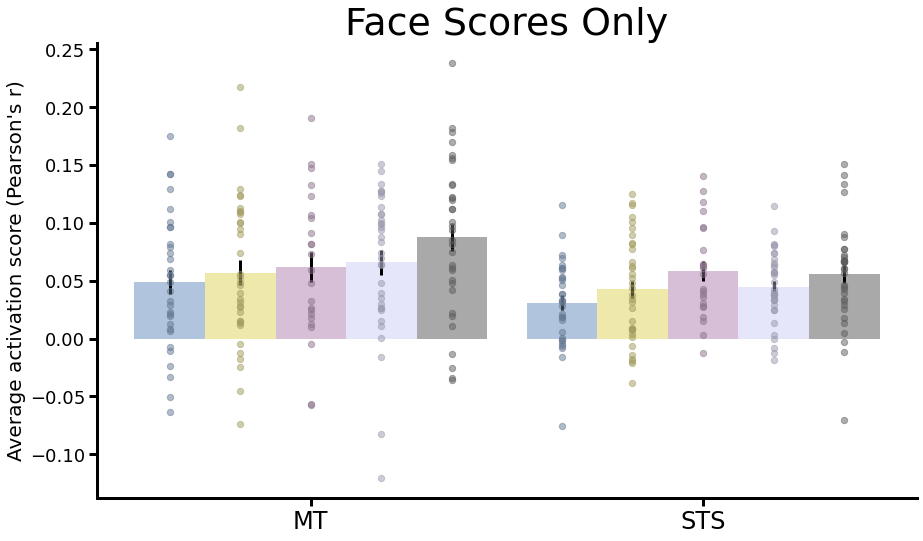

In [19]:
### mean activation for each subject in STS for face model

# Calculate the average of the array of individual subj average 
face_STS_34yrs_mean = sts_34yrs_face_score.mean()
face_STS_5yrs_mean = sts_5yrs_face_score.mean()
face_STS_7yrs_mean = sts_7yrs_face_score.mean()
face_STS_812yrs_mean = sts_812yrs_face_score.mean()
face_STS_adults_mean = sts_adult_face_score.mean()

#STD
face_STS_34yrs_std = np.std(sts_34yrs_face_score)
face_STS_5yrs_std= np.std(sts_5yrs_face_score)
face_STS_7yrs_std= np.std(sts_7yrs_face_score)
face_STS_812yrs_std= np.std(sts_812yrs_face_score)
face_STS_adults_std = np.std(sts_adult_face_score)

face_STS_34yrs_err = np.std(sts_34yrs_face_score)/np.sqrt(len(sts_34yrs_face_score))
face_STS_5yrs_err= np.std(sts_5yrs_face_score)/np.sqrt(len(sts_5yrs_face_score))
face_STS_7yrs_err= np.std(sts_7yrs_face_score)/np.sqrt(len(sts_7yrs_face_score))
face_STS_812yrs_err= np.std(sts_812yrs_face_score)/np.sqrt(len(sts_812yrs_face_score))
face_STS_adults_err = np.std(sts_adult_face_score)/np.sqrt(len(sts_adult_face_score))

### mean activation for each subject in MT for face model

# Calculate the average of the array of individual subj average 
face_MT_34yrs_mean = mt_34yrs_face_score.mean()
face_MT_5yrs_mean = mt_5yrs_face_score.mean()
face_MT_7yrs_mean = mt_7yrs_face_score.mean()
face_MT_812yrs_mean = mt_812yrs_face_score.mean()
face_MT_adults_mean = mt_adult_face_score.mean()

#std
face_MT_34yrs_std = np.std(mt_34yrs_face_score)
face_MT_5yrs_std= np.std(mt_5yrs_face_score)
face_MT_7yrs_std= np.std(mt_7yrs_face_score)
face_MT_812yrs_std= np.std(mt_812yrs_face_score)
face_MT_adults_std = np.std(mt_adult_face_score)

#err
face_MT_34yrs_err = np.std(mt_34yrs_face_score)/np.sqrt(len(mt_34yrs_face_score))
face_MT_5yrs_err= np.std(mt_5yrs_face_score)/np.sqrt(len(mt_5yrs_face_score))
face_MT_7yrs_err= np.std(mt_7yrs_face_score)/np.sqrt(len(mt_7yrs_face_score))
face_MT_812yrs_err= np.std(mt_812yrs_face_score)/np.sqrt(len(mt_812yrs_face_score))
face_MT_adults_err = np.std(mt_adult_face_score)/np.sqrt(len(mt_adult_face_score))

# Define labels, positions, bar heights and error bar heights
labels = ['MT','STS']
X_axis = np.arange(len(labels))


face_34 = [face_MT_34yrs_mean, face_STS_34yrs_mean]
error = [face_MT_34yrs_err, face_STS_34yrs_err]

face_5 = [face_MT_5yrs_mean, face_STS_5yrs_mean]
error2 = [face_MT_5yrs_err, face_STS_5yrs_err ]

face_7 = [face_MT_7yrs_mean, face_STS_7yrs_mean]
error3 = [face_MT_7yrs_err, face_STS_7yrs_err ]

face_812 = [face_MT_812yrs_mean, face_STS_812yrs_mean]
error4 = [face_MT_812yrs_err, face_STS_812yrs_err ]

face_adult = [face_MT_adults_mean, face_STS_adults_mean]
error5 = [face_MT_adults_err, face_STS_adults_err]

_, ax = plt.subplots(figsize=(14.69, 8.38))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(3)
ax.spines['bottom'].set_linewidth(3)
ax.tick_params(width=3, length=8)
ax.bar(X_axis - 0.36, face_34, 0.18, yerr=error, label = '3-4 yrs', color = 'lightsteelblue', error_kw=dict(lw=3))
ax.bar(X_axis - 0.18, face_5, 0.18, yerr= error2, label = '5 yrs', color ='palegoldenrod', error_kw=dict(lw=3))
ax.bar(X_axis + 0.0, face_7, 0.18, yerr= error3, label = '7 yrs', color ='thistle', error_kw=dict(lw=3))
ax.bar(X_axis + 0.18, face_812, 0.18, yerr= error4, label = '8-12 yrs', color ='lavender', error_kw=dict(lw=3))
ax.bar(X_axis + 0.36, face_adult, 0.18, yerr= error5, label = 'adults', color ='darkgrey', error_kw=dict(lw=3))

# Scatter individual scores
scatter_width = 0.18
scatter_shifts = [-0.36, -0.18, 0.0, 0.18, 0.36]
scores_MT = [mt_34yrs_face_score, mt_5yrs_face_score, mt_7yrs_face_score, mt_812yrs_face_score, mt_adult_face_score]
scores_STS = [sts_34yrs_face_score, sts_5yrs_face_score, sts_7yrs_face_score, sts_812yrs_face_score, sts_adult_face_score]

age_colors = ['lightsteelblue', 'palegoldenrod', 'thistle', 'lavender', 'darkgrey']
darkened_colors = [darken_color(color) for color in age_colors]


for i, shift in enumerate(scatter_shifts):
    # Scatter for MT
    ax.scatter([X_axis[0] + shift]*len(scores_MT[i]), 
               scores_MT[i], 
               marker='o', color=darkened_colors[i], s=40, alpha=0.5, zorder=3) # <-- Added zorder

    # Scatter for STS
    ax.scatter([X_axis[1] + shift]* len(scores_STS[i]), 
               scores_STS[i], 
               marker='o', color=darkened_colors[i], s=40, alpha=0.5, zorder=3) # <-- Added zorder


ax.set_xticks([0,1])
ax.set_xticklabels(labels, fontsize=24)
ax.tick_params(axis='y', which='major', labelsize=18)
ax.set_ylabel("Average activation score (Pearson's r)", fontsize=20)
ax.set_title("Face Scores Only", fontsize=38)
#ax.set_yticks([0, 0.05, 0.10, 0.15, 0.20])
#ax.set_ylim([0, 0.2])
ax.legend([], [], frameon=False)
plt.savefig('face_only_w_scatter.pdf')
plt.show()



<h1>ToM</h1>

In [20]:
#Load social model scores data

ToM_scores_34yrs_unthresholded = np.mean(np.load(os.path.join(
    directory, '3-4-yrs', 'encoding_results', 'unthresholded_whole', '3-4-yrs_tom_only_scores_adult_isc_mask.npy')), axis=0)

ToM_scores_5yrs_unthresholded = np.mean(np.load(os.path.join(
    directory, '5-yrs','encoding_results', 'unthresholded', '5-yrs_tom_only_scores_adult_isc_mask.npy')), axis=0)

ToM_scores_7yrs_unthresholded = np.mean(np.load(os.path.join(
    directory, '7-yrs','encoding_results', 'unthresholded', '7-yrs_tom_only_scores_adult_isc_mask.npy')), axis=0)

ToM_scores_812yrs_unthresholded = np.mean(np.load(os.path.join(
    directory, '8-12-yrs','encoding_results', 'unthresholded', '8-12-yrs_tom_only_scores_adult_isc_mask.npy')), axis=0)

ToM_scores_adults_unthresholded = np.mean(np.load(os.path.join(
    directory, 'adults', 'encoding_results','unthresholded', 'adults_tom_only_scores_adult_isc_mask.npy')), axis=0)

-0.0046568582210945175
0.0009500510470603372
0.00525482496775037
0.024529668676566918
0.035548337278230105


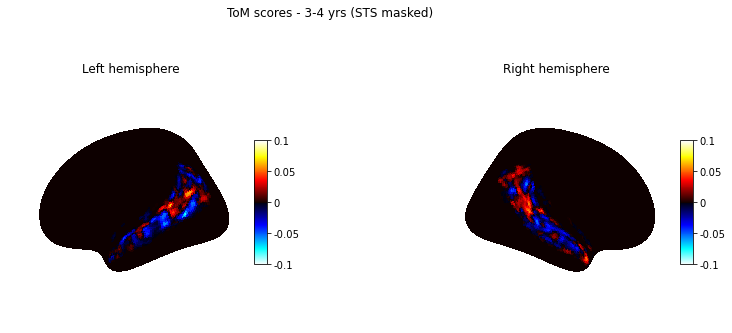

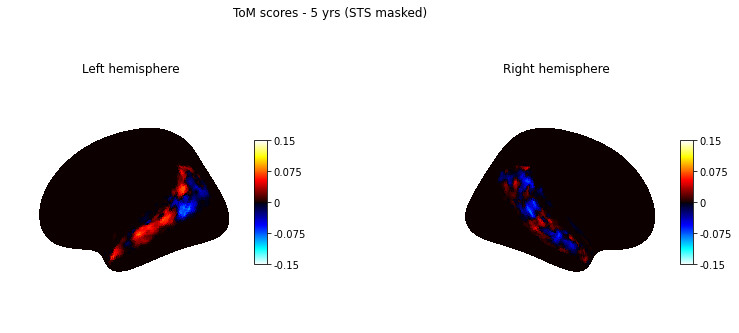

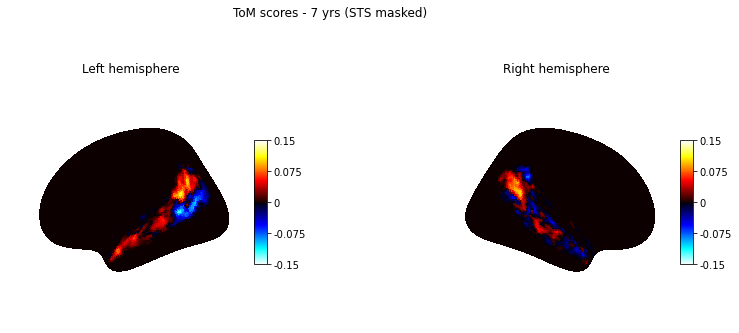

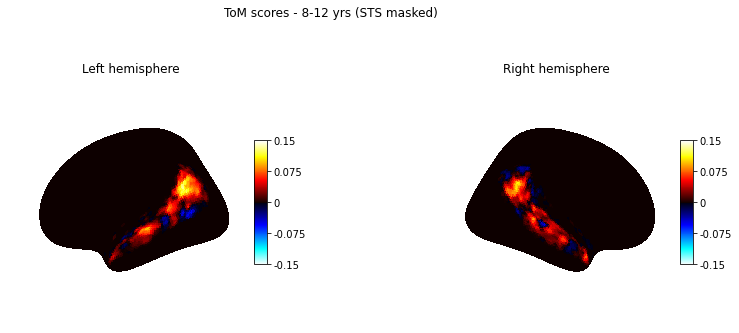

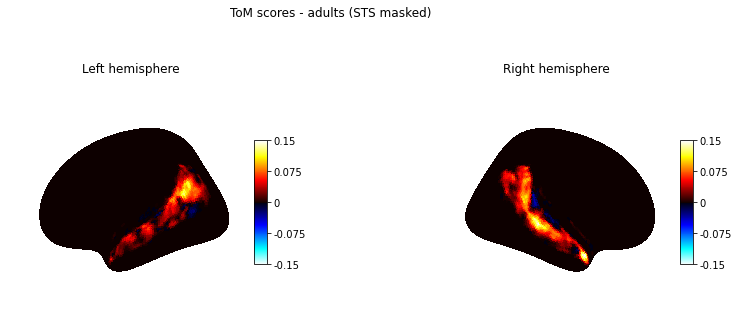

In [21]:
# mask 3-4 yrs data - STS
sts_mask_array = np.invert(STS_mask_resampled.get_fdata().astype('bool'))
ToM_isc_volume_34yrs = make_vol(ToM_scores_34yrs_unthresholded, mask)
ToM_isc_volume_34yrs_array = ToM_isc_volume_34yrs.get_fdata()
ToM_sts_volume_34yrs = ToM_isc_volume_34yrs_array.copy()
ToM_sts_volume_34yrs[sts_mask_array] = 0
ToM_sts_volume_34yrs_image = nib.Nifti1Image(ToM_sts_volume_34yrs, affine=ToM_isc_volume_34yrs.affine, header=ToM_isc_volume_34yrs.header)
plot_lateral_only_with_vmax(vol=ToM_sts_volume_34yrs_image, 
                            title='ToM scores - 3-4 yrs (STS masked)', 
                            vis_threshold=0, vmax=0.1)

print(ToM_isc_volume_34yrs_array[np.invert(sts_mask_array)].mean())



# mask 5 yrs data - STS
sts_mask_array = np.invert(STS_mask_resampled.get_fdata().astype('bool'))
ToM_isc_volume_5yrs = make_vol(ToM_scores_5yrs_unthresholded, mask)
ToM_isc_volume_5yrs_array = ToM_isc_volume_5yrs.get_fdata()
ToM_sts_volume_5yrs = ToM_isc_volume_5yrs_array.copy()
ToM_sts_volume_5yrs[sts_mask_array] = 0
ToM_sts_volume_5yrs_image = nib.Nifti1Image(ToM_sts_volume_5yrs, affine=ToM_isc_volume_5yrs.affine, header=ToM_isc_volume_5yrs.header)
plot_lateral_only_with_vmax(vol=ToM_sts_volume_5yrs_image, 
                            title='ToM scores - 5 yrs (STS masked)', 
                            vis_threshold=0, vmax=0.15)

print(ToM_isc_volume_5yrs_array[np.invert(sts_mask_array)].mean())

# mask 7 yrs data - STS
sts_mask_array = np.invert(STS_mask_resampled.get_fdata().astype('bool'))
ToM_isc_volume_7yrs = make_vol(ToM_scores_7yrs_unthresholded, mask)
ToM_isc_volume_7yrs_array = ToM_isc_volume_7yrs.get_fdata()
ToM_sts_volume_7yrs = ToM_isc_volume_7yrs_array.copy()
ToM_sts_volume_7yrs[sts_mask_array] = 0
ToM_sts_volume_7yrs_image = nib.Nifti1Image(ToM_sts_volume_7yrs, affine=ToM_isc_volume_7yrs.affine, header=ToM_isc_volume_7yrs.header)
plot_lateral_only_with_vmax(vol=ToM_sts_volume_7yrs_image, 
                            title='ToM scores - 7 yrs (STS masked)', 
                            vis_threshold=0, vmax=0.15)

print(ToM_isc_volume_7yrs_array[np.invert(sts_mask_array)].mean())

# mask 8-12 yrs data - STS
sts_mask_array = np.invert(STS_mask_resampled.get_fdata().astype('bool'))
ToM_isc_volume_812yrs = make_vol(ToM_scores_812yrs_unthresholded, mask)
ToM_isc_volume_812yrs_array = ToM_isc_volume_812yrs.get_fdata()
ToM_sts_volume_812yrs = ToM_isc_volume_812yrs_array.copy()
ToM_sts_volume_812yrs[sts_mask_array] = 0
ToM_sts_volume_812yrs_image = nib.Nifti1Image(ToM_sts_volume_812yrs, affine=ToM_isc_volume_812yrs.affine, header=ToM_isc_volume_812yrs.header)
plot_lateral_only_with_vmax(vol=ToM_sts_volume_812yrs_image, 
                            title='ToM scores - 8-12 yrs (STS masked)', 
                            vis_threshold=0, vmax=0.15)

print(ToM_isc_volume_812yrs_array[np.invert(sts_mask_array)].mean())


#mask adult data - STS
sts_mask_array = np.invert(STS_mask_resampled.get_fdata().astype('bool'))

ToM_isc_volume_adult = make_vol(ToM_scores_adults_unthresholded, mask)
ToM_isc_volume_adult_array = ToM_isc_volume_adult.get_fdata()
ToM_sts_volume_adult = ToM_isc_volume_adult_array.copy()
ToM_sts_volume_adult[sts_mask_array] = 0
ToM_sts_volume_adult_image = nib.Nifti1Image(ToM_sts_volume_adult, affine=ToM_isc_volume_adult.affine, header=ToM_isc_volume_adult.header)
plot_lateral_only_with_vmax(vol=ToM_sts_volume_adult_image, 
                            title='ToM scores - adults (STS masked)', 
                            vis_threshold=0, vmax=0.15)

print(ToM_isc_volume_adult_array[np.invert(sts_mask_array)].mean())

-0.0008403988523667491
-0.027879057126466673
-0.027131362730349644
-0.016577076457585885
0.001540884257356895


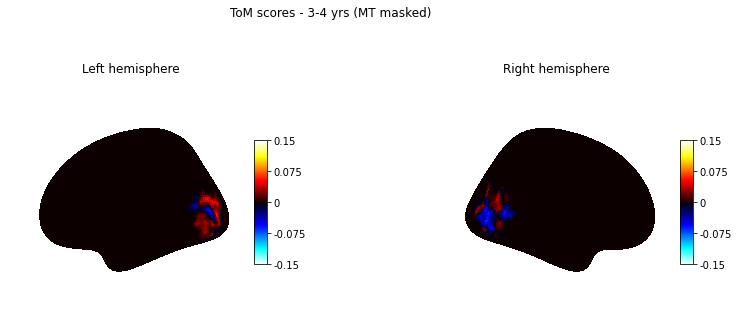

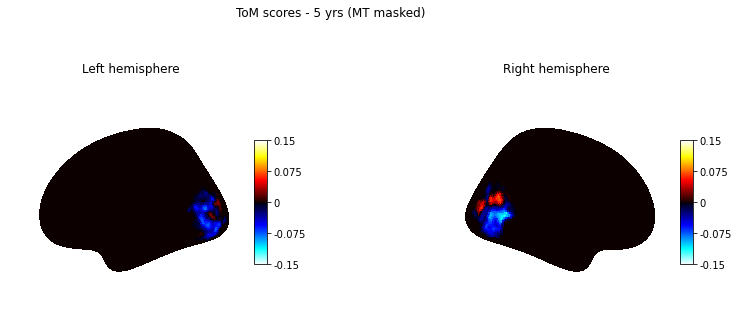

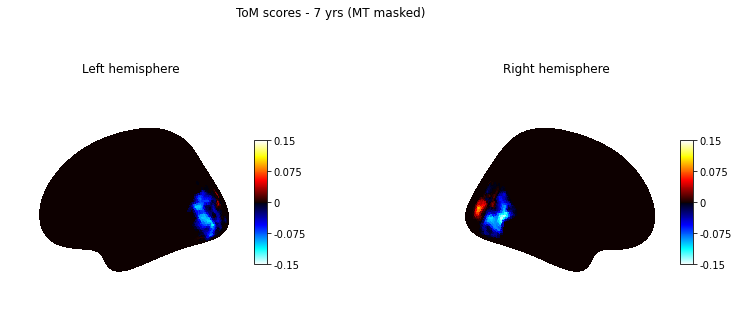

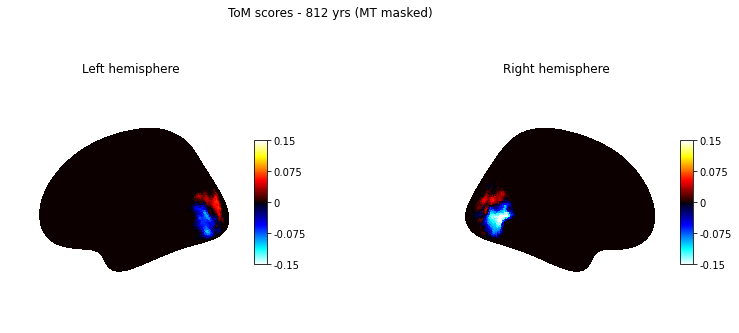

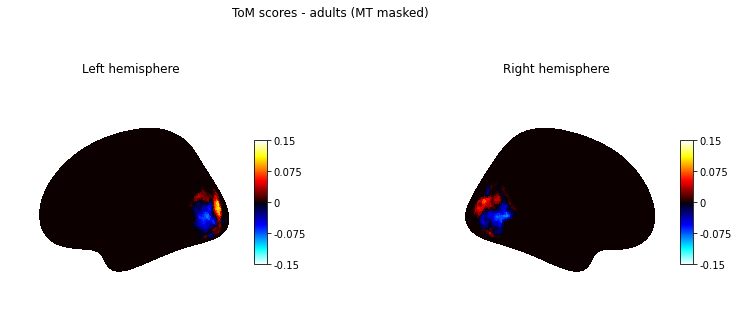

In [22]:
# mask 3-4 yrs data - MT

ToM_isc_volume_34yrs = make_vol(ToM_scores_34yrs_unthresholded, mask)
ToM_isc_volume_34yrs_array = ToM_isc_volume_34yrs.get_fdata()
MT_mask_array = np.invert(MT_mask_resampled_bool.get_fdata().astype('bool'))
ToM_MT_volume_34yrs = ToM_isc_volume_34yrs_array.copy()
ToM_MT_volume_34yrs[MT_mask_array] = 0
ToM_MT_volume_34yrs_image = nib.Nifti1Image(ToM_MT_volume_34yrs, affine=ToM_isc_volume_34yrs.affine, header=ToM_isc_volume_34yrs.header)
plot_lateral_only_with_vmax(vol=ToM_MT_volume_34yrs_image, 
                            title='ToM scores - 3-4 yrs (MT masked)', 
                            vis_threshold=0, vmax=0.15)

print(ToM_isc_volume_34yrs_array[np.invert(MT_mask_array)].mean())



# mask 5 yrs data - MT

ToM_isc_volume_5yrs = make_vol(ToM_scores_5yrs_unthresholded, mask)
ToM_isc_volume_5yrs_array = ToM_isc_volume_5yrs.get_fdata()
MT_mask_array = np.invert(MT_mask_resampled_bool.get_fdata().astype('bool'))
ToM_MT_volume_5yrs = ToM_isc_volume_5yrs_array.copy()
ToM_MT_volume_5yrs[MT_mask_array] = 0
ToM_MT_volume_5yrs_image = nib.Nifti1Image(ToM_MT_volume_5yrs, affine=ToM_isc_volume_5yrs.affine, header=ToM_isc_volume_5yrs.header)
plot_lateral_only_with_vmax(vol=ToM_MT_volume_5yrs_image, 
                            title='ToM scores - 5 yrs (MT masked)', 
                            vis_threshold=0, vmax=0.15)

print(ToM_isc_volume_5yrs_array[np.invert(MT_mask_array)].mean())

# mask 7 yrs data - MT

ToM_isc_volume_7yrs = make_vol(ToM_scores_7yrs_unthresholded, mask)
ToM_isc_volume_7yrs_array = ToM_isc_volume_7yrs.get_fdata()
MT_mask_array = np.invert(MT_mask_resampled_bool.get_fdata().astype('bool'))
ToM_MT_volume_7yrs = ToM_isc_volume_7yrs_array.copy()
ToM_MT_volume_7yrs[MT_mask_array] = 0
ToM_MT_volume_7yrs_image = nib.Nifti1Image(ToM_MT_volume_7yrs, affine=ToM_isc_volume_7yrs.affine, header=ToM_isc_volume_7yrs.header)
plot_lateral_only_with_vmax(vol=ToM_MT_volume_7yrs_image, 
                            title='ToM scores - 7 yrs (MT masked)', 
                            vis_threshold=0, vmax=0.15)

print(ToM_isc_volume_7yrs_array[np.invert(MT_mask_array)].mean())

# mask 8-12 yrs data - MT

ToM_isc_volume_812yrs = make_vol(ToM_scores_812yrs_unthresholded, mask)
ToM_isc_volume_812yrs_array = ToM_isc_volume_812yrs.get_fdata()
MT_mask_array = np.invert(MT_mask_resampled_bool.get_fdata().astype('bool'))
ToM_MT_volume_812yrs = ToM_isc_volume_812yrs_array.copy()
ToM_MT_volume_812yrs[MT_mask_array] = 0
ToM_MT_volume_812yrs_image = nib.Nifti1Image(ToM_MT_volume_812yrs, affine=ToM_isc_volume_812yrs.affine, header=ToM_isc_volume_812yrs.header)
plot_lateral_only_with_vmax(vol=ToM_MT_volume_812yrs_image, 
                            title='ToM scores - 812 yrs (MT masked)', 
                            vis_threshold=0, vmax=0.15)

print(ToM_isc_volume_812yrs_array[np.invert(MT_mask_array)].mean())


#mask adult data - MT
ToM_isc_volume_adult = make_vol(ToM_scores_adults_unthresholded, mask)
ToM_isc_volume_adult_array = ToM_isc_volume_adult.get_fdata()
MT_mask_array = np.invert(MT_mask_resampled_bool.get_fdata().astype('bool'))
ToM_MT_volume_adult = ToM_isc_volume_adult_array.copy()
ToM_MT_volume_adult[MT_mask_array] = 0
ToM_MT_volume_adult_image = nib.Nifti1Image(ToM_MT_volume_adult, affine=ToM_isc_volume_adult.affine, header=ToM_isc_volume_adult.header)
plot_lateral_only_with_vmax(vol=ToM_MT_volume_adult_image, 
                            title='ToM scores - adults (MT masked)', 
                            vis_threshold=0, vmax=0.15)

print(ToM_isc_volume_adult_array[np.invert(MT_mask_array)].mean())

In [23]:
#load individual subject score


subj_ToM_scores_34yrs_unthresholded = np.load(os.path.join(
    directory, '3-4-yrs', 'encoding_results','unthresholded_whole', '3-4-yrs_tom_only_scores_adult_isc_mask.npy')).T
print(subj_ToM_scores_34yrs_unthresholded.shape)
n_34yrs = subj_ToM_scores_34yrs_unthresholded.shape[-1]

subj_ToM_scores_5yrs_unthresholded = np.load(os.path.join(
    directory, '5-yrs', 'encoding_results','unthresholded', '5-yrs_tom_only_scores_adult_isc_mask.npy')).T
print(subj_ToM_scores_5yrs_unthresholded.shape)
n_5yrs = subj_ToM_scores_5yrs_unthresholded.shape[-1]

subj_ToM_scores_7yrs_unthresholded = np.load(os.path.join(
    directory, '7-yrs', 'encoding_results','unthresholded', '7-yrs_tom_only_scores_adult_isc_mask.npy')).T
print(subj_ToM_scores_7yrs_unthresholded.shape)
n_7yrs = subj_ToM_scores_7yrs_unthresholded.shape[-1]

subj_ToM_scores_812yrs_unthresholded = np.load(os.path.join(
    directory, '8-12-yrs', 'encoding_results','unthresholded', '8-12-yrs_tom_only_scores_adult_isc_mask.npy')).T
print(subj_ToM_scores_812yrs_unthresholded.shape)
n_812yrs = subj_ToM_scores_812yrs_unthresholded.shape[-1]

subj_ToM_scores_adults_unthresholded = np.load(os.path.join(
    directory, 'adults', 'encoding_results','unthresholded', 'adults_tom_only_scores_adult_isc_mask.npy')).T
print(subj_ToM_scores_adults_unthresholded.shape)
n_adults = subj_ToM_scores_adults_unthresholded.shape[-1]

(136543, 31)
(136543, 34)
(136543, 23)
(136543, 34)
(136543, 33)


In [24]:
### get the encoding performance correlation score for STS

sts_mask_array = STS_mask_resampled.get_fdata().astype('bool') #un-invert it bc not mapping it to brain surToM

mask_volume = mask.get_fdata() > 0
print(mask_volume.shape)
print(mask_volume.size) #shape of the brain
print(mask_volume.sum())

### adults
print(subj_ToM_scores_adults_unthresholded.shape)
volume_adult = np.zeros(mask_volume.shape + (n_adults,))
volume_adult[mask_volume, :] = subj_ToM_scores_adults_unthresholded # change subj data to shape of the brain
sts_adult_ToM_score = volume_adult[sts_mask_array, :].mean(axis=0)
print(sts_adult_ToM_score.mean())


(79, 95, 68)
510340
136543
(136543, 33)
0.03554833727823006


In [25]:
### 3-4-yrs
print(subj_ToM_scores_34yrs_unthresholded.shape)
volume_34yrs = np.zeros(mask_volume.shape + (n_34yrs,))
volume_34yrs[mask_volume, :] = subj_ToM_scores_34yrs_unthresholded # change subj data to shape of the brain
sts_34yrs_ToM_score = volume_34yrs[sts_mask_array, :].mean(axis=0)
print(sts_34yrs_ToM_score.mean())

null_distribution = generate_null_difference_permute_groups(sts_adult_ToM_score, sts_34yrs_ToM_score, 5000)
print(np.shape(null_distribution)) #returns array of differences of a mean of randomly split (5000 times) groups
observed_difference = np.mean(sts_adult_ToM_score) - np.mean(sts_34yrs_ToM_score)
print(observed_difference)

# Compute the p-value
p_value = np.sum(np.abs(null_distribution) >= np.abs(observed_difference)) / 5000 #two-tailed p-val test

# Check significance
if p_value < 0.05:
    print("The difference between groups is statistically significant!")
else:
    print("The difference between groups is not statistically significant.")

print(p_value)

(136543, 31)
-0.004656858221094494
(5000,)
0.04020519549932456
The difference between groups is statistically significant!
0.0002


In [26]:
### 5-yrs
print(subj_ToM_scores_5yrs_unthresholded.shape)
volume_5yrs = np.zeros(mask_volume.shape + (n_5yrs,))
volume_5yrs[mask_volume, :] = subj_ToM_scores_5yrs_unthresholded # change subj data to shape of the brain
sts_5yrs_ToM_score = volume_5yrs[sts_mask_array, :].mean(axis=0)
print(sts_5yrs_ToM_score.mean())

null_distribution = generate_null_difference_permute_groups(sts_adult_ToM_score, sts_5yrs_ToM_score, 5000)
print(np.shape(null_distribution)) #returns array of differences of a mean of randomly split (5000 times) groups
observed_difference = np.mean(sts_adult_ToM_score) - np.mean(sts_5yrs_ToM_score)
print(observed_difference)

# Compute the p-value
p_value = np.sum(np.abs(null_distribution) >= np.abs(observed_difference)) / 5000 #two-tailed p-val test

# Check significance
if p_value < 0.05:
    print("The difference between groups is statistically significant!")
else:
    print("The difference between groups is not statistically significant.")

print(p_value)

(136543, 34)
0.0009500510470603511
(5000,)
0.034598286231169714
The difference between groups is statistically significant!
0.0008


In [27]:
### 7-yrs
print(subj_ToM_scores_7yrs_unthresholded.shape)
volume_7yrs = np.zeros(mask_volume.shape + (n_7yrs,))
volume_7yrs[mask_volume, :] = subj_ToM_scores_7yrs_unthresholded # change subj data to shape of the brain
sts_7yrs_ToM_score = volume_7yrs[sts_mask_array, :].mean(axis=0)
print(sts_7yrs_ToM_score.mean())

null_distribution = generate_null_difference_permute_groups(sts_adult_ToM_score, sts_7yrs_ToM_score, 5000)
print(np.shape(null_distribution)) #returns array of differences of a mean of randomly split (5000 times) groups
observed_difference = np.mean(sts_adult_ToM_score) - np.mean(sts_7yrs_ToM_score)
print(observed_difference)

# Compute the p-value
p_value = np.sum(np.abs(null_distribution) >= np.abs(observed_difference)) / 5000 #two-tailed p-val test

# Check significance
if p_value < 0.05:
    print("The difference between groups is statistically significant!")
else:
    print("The difference between groups is not statistically significant.")

print(p_value)

(136543, 23)
0.0052548249677503555
(5000,)
0.030293512310479706
The difference between groups is statistically significant!
0.0142


In [28]:
### 8-12-yrs
print(subj_ToM_scores_812yrs_unthresholded.shape)
volume_812yrs = np.zeros(mask_volume.shape + (n_812yrs,))
volume_812yrs[mask_volume, :] = subj_ToM_scores_812yrs_unthresholded # change subj data to shape of the brain
sts_812yrs_ToM_score = volume_812yrs[sts_mask_array, :].mean(axis=0)
print(sts_812yrs_ToM_score.mean())

null_distribution = generate_null_difference_permute_groups(sts_adult_ToM_score, sts_812yrs_ToM_score, 5000)
print(np.shape(null_distribution)) #returns array of differences of a mean of randomly split (5000 times) groups
observed_difference = np.mean(sts_adult_ToM_score) - np.mean(sts_812yrs_ToM_score)
print(observed_difference)

# Compute the p-value
p_value = np.sum(np.abs(null_distribution) >= np.abs(observed_difference)) / 5000 #two-tailed p-val test

# Check significance
if p_value < 0.05:
    print("The difference between groups is statistically significant!")
else:
    print("The difference between groups is not statistically significant.")

print(p_value)

(136543, 34)
0.024529668676566963
(5000,)
0.0110186686016631
The difference between groups is not statistically significant.
0.3026


In [29]:
### get the encoding performance correlation score - MT
mt_mask_array = MT_mask_resampled_bool.get_fdata().astype('bool') #un-invert it bc not mapping it to brain surToM

mask_volume = mask.get_fdata() > 0
print(mask_volume.shape)
print(mask_volume.size) #shape of the brain
print(mask_volume.sum())

### adults
print(subj_ToM_scores_adults_unthresholded.shape)
volume_adult = np.zeros(mask_volume.shape + (n_adults,))
volume_adult[mask_volume, :] = subj_ToM_scores_adults_unthresholded # change subj data to shape of the brain
mt_adult_ToM_score = volume_adult[mt_mask_array, :].mean(axis=0)
print('MT adults ToM:', mt_adult_ToM_score.mean())

(79, 95, 68)
510340
136543
(136543, 33)
MT adults ToM: 0.0015408842573568975


In [30]:
### 3-4-yrs
print(subj_ToM_scores_34yrs_unthresholded.shape)
volume_34yrs = np.zeros(mask_volume.shape + (n_34yrs,))
volume_34yrs[mask_volume, :] = subj_ToM_scores_34yrs_unthresholded # change subj data to shape of the brain
mt_34yrs_ToM_score = volume_34yrs[mt_mask_array, :].mean(axis=0)
print('MT 3-4 yrs ToM:', mt_34yrs_ToM_score.mean())

null_distribution = generate_null_difference_permute_groups(mt_adult_ToM_score, mt_34yrs_ToM_score, 5000)
print(np.shape(null_distribution)) #returns array of differences of a mean of randomly split (5000 times) groups
observed_difference = np.mean(mt_adult_ToM_score) - np.mean(mt_34yrs_ToM_score)
print(observed_difference)

# Compute the p-value
p_value = np.sum(np.abs(null_distribution) >= np.abs(observed_difference)) / 5000 #two-tailed p-val test

# Check significance
if p_value < 0.05:
    print("The difference between groups is statistically significant!")
else:
    print("The difference between groups is not statistically significant.")

print(p_value)

(136543, 31)
MT 3-4 yrs ToM: -0.0008403988523667585
(5000,)
0.002381283109723656
The difference between groups is not statistically significant.
0.868


In [31]:
### 5-yrs
print(subj_ToM_scores_5yrs_unthresholded.shape)
volume_5yrs = np.zeros(mask_volume.shape + (n_5yrs,))
volume_5yrs[mask_volume, :] = subj_ToM_scores_5yrs_unthresholded # change subj data to shape of the brain
mt_5yrs_ToM_score = volume_5yrs[mt_mask_array, :].mean(axis=0)
print('MT 5 yrs ToM:', mt_5yrs_ToM_score.mean())

null_distribution = generate_null_difference_permute_groups(mt_adult_ToM_score, mt_5yrs_ToM_score, 5000)
print(np.shape(null_distribution)) #returns array of differences of a mean of randomly split (5000 times) groups
observed_difference = np.mean(mt_adult_ToM_score) - np.mean(mt_5yrs_ToM_score)
print(observed_difference)

# Compute the p-value
p_value = np.sum(np.abs(null_distribution) >= np.abs(observed_difference)) / 5000 #two-tailed p-val test

# Check significance
if p_value < 0.05:
    print("The difference between groups is statistically significant!")
else:
    print("The difference between groups is not statistically significant.")

print(p_value)

(136543, 34)
MT 5 yrs ToM: -0.02787905712646664
(5000,)
0.02941994138382354
The difference between groups is statistically significant!
0.0252


In [32]:
### 7-yrs
print(subj_ToM_scores_7yrs_unthresholded.shape)
volume_7yrs = np.zeros(mask_volume.shape + (n_7yrs,))
volume_7yrs[mask_volume, :] = subj_ToM_scores_7yrs_unthresholded # change subj data to shape of the brain
mt_7yrs_ToM_score = volume_7yrs[mt_mask_array, :].mean(axis=0)
print('MT 7 yrs ToM:', mt_7yrs_ToM_score.mean())

null_distribution = generate_null_difference_permute_groups(mt_adult_ToM_score, mt_7yrs_ToM_score, 5000)
print(np.shape(null_distribution)) #returns array of differences of a mean of randomly split (5000 times) groups
observed_difference = np.mean(mt_adult_ToM_score) - np.mean(mt_7yrs_ToM_score)
print(observed_difference)

# Compute the p-value
p_value = np.sum(np.abs(null_distribution) >= np.abs(observed_difference)) / 5000 #two-tailed p-val test

# Check significance
if p_value < 0.05:
    print("The difference between groups is statistically significant!")
else:
    print("The difference between groups is not statistically significant.")

print(p_value)


(136543, 23)
MT 7 yrs ToM: -0.027131362730349648
(5000,)
0.028672246987706547
The difference between groups is statistically significant!
0.0376


In [33]:
### 8-12-yrs
print(subj_ToM_scores_812yrs_unthresholded.shape)
volume_812yrs = np.zeros(mask_volume.shape + (n_812yrs,))
volume_812yrs[mask_volume, :] = subj_ToM_scores_812yrs_unthresholded # change subj data to shape of the brain
mt_812yrs_ToM_score = volume_812yrs[mt_mask_array, :].mean(axis=0)
print('MT 8-12 yrs ToM:', mt_812yrs_ToM_score.mean())

null_distribution = generate_null_difference_permute_groups(mt_adult_ToM_score, mt_812yrs_ToM_score, 5000)
print(np.shape(null_distribution)) #returns array of differences of a mean of randomly split (5000 times) groups
observed_difference = np.mean(mt_adult_ToM_score) - np.mean(mt_812yrs_ToM_score)
print(observed_difference)

# Compute the p-value
p_value = np.sum(np.abs(null_distribution) >= np.abs(observed_difference)) / 5000 #two-tailed p-val test

# Check significance
if p_value < 0.05:
    print("The difference between groups is statistically significant!")
else:
    print("The difference between groups is not statistically significant.")

print(p_value)

(136543, 34)
MT 8-12 yrs ToM: -0.016577076457585896
(5000,)
0.018117960714942795
The difference between groups is not statistically significant.
0.1716


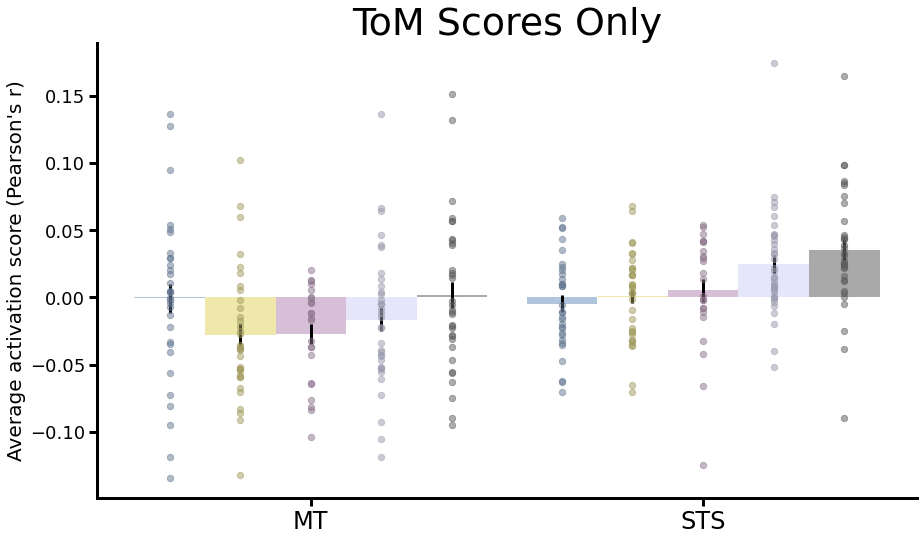

In [34]:
### mean activation for each subject in STS for ToM model

# Calculate the average of the array of individual subj average 
ToM_STS_34yrs_mean = sts_34yrs_ToM_score.mean()
ToM_STS_5yrs_mean = sts_5yrs_ToM_score.mean()
ToM_STS_7yrs_mean = sts_7yrs_ToM_score.mean()
ToM_STS_812yrs_mean = sts_812yrs_ToM_score.mean()
ToM_STS_adults_mean = sts_adult_ToM_score.mean()

#STD
ToM_STS_34yrs_std = np.std(sts_34yrs_ToM_score)
ToM_STS_5yrs_std= np.std(sts_5yrs_ToM_score)
ToM_STS_7yrs_std= np.std(sts_7yrs_ToM_score)
ToM_STS_812yrs_std= np.std(sts_812yrs_ToM_score)
ToM_STS_adults_std = np.std(sts_adult_ToM_score)

ToM_STS_34yrs_err = np.std(sts_34yrs_ToM_score)/np.sqrt(len(sts_34yrs_ToM_score))
ToM_STS_5yrs_err= np.std(sts_5yrs_ToM_score)/np.sqrt(len(sts_5yrs_ToM_score))
ToM_STS_7yrs_err= np.std(sts_7yrs_ToM_score)/np.sqrt(len(sts_7yrs_ToM_score))
ToM_STS_812yrs_err= np.std(sts_812yrs_ToM_score)/np.sqrt(len(sts_812yrs_ToM_score))
ToM_STS_adults_err = np.std(sts_adult_ToM_score)/np.sqrt(len(sts_adult_ToM_score))

### mean activation for each subject in MT for ToM model

# Calculate the average of the array of individual subj average 
ToM_MT_34yrs_mean = mt_34yrs_ToM_score.mean()
#print(ToM_MT_34yrs_mean)
ToM_MT_5yrs_mean = mt_5yrs_ToM_score.mean()
ToM_MT_7yrs_mean = mt_7yrs_ToM_score.mean()
ToM_MT_812yrs_mean = mt_812yrs_ToM_score.mean()
ToM_MT_adults_mean = mt_adult_ToM_score.mean()

#std
ToM_MT_34yrs_std = np.std(mt_34yrs_ToM_score)
ToM_MT_5yrs_std= np.std(mt_5yrs_ToM_score)
ToM_MT_7yrs_std= np.std(mt_7yrs_ToM_score)
ToM_MT_812yrs_std= np.std(mt_812yrs_ToM_score)
ToM_MT_adults_std = np.std(mt_adult_ToM_score)

#err
ToM_MT_34yrs_err = np.std(mt_34yrs_ToM_score)/np.sqrt(len(mt_34yrs_ToM_score))
ToM_MT_5yrs_err= np.std(mt_5yrs_ToM_score)/np.sqrt(len(mt_5yrs_ToM_score))
ToM_MT_7yrs_err= np.std(mt_7yrs_ToM_score)/np.sqrt(len(mt_7yrs_ToM_score))
ToM_MT_812yrs_err= np.std(mt_812yrs_ToM_score)/np.sqrt(len(mt_812yrs_ToM_score))
ToM_MT_adults_err = np.std(mt_adult_ToM_score)/np.sqrt(len(mt_adult_ToM_score))

# Define labels, positions, bar heights and error bar heights
labels = ['MT','STS']
X_axis = np.arange(len(labels))


ToM_34 = [ToM_MT_34yrs_mean, ToM_STS_34yrs_mean]
error = [ToM_MT_34yrs_err, ToM_STS_34yrs_err]

ToM_5 = [ToM_MT_5yrs_mean, ToM_STS_5yrs_mean]
error2 = [ToM_MT_5yrs_err, ToM_STS_5yrs_err ]

ToM_7 = [ToM_MT_7yrs_mean, ToM_STS_7yrs_mean]
error3 = [ToM_MT_7yrs_err, ToM_STS_7yrs_err ]

ToM_812 = [ToM_MT_812yrs_mean, ToM_STS_812yrs_mean]
error4 = [ToM_MT_812yrs_err, ToM_STS_812yrs_err ]

ToM_adult = [ToM_MT_adults_mean, ToM_STS_adults_mean]
error5 = [ToM_MT_adults_err, ToM_STS_adults_err]

_, ax = plt.subplots(figsize=(14.69, 8.38))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(3)
ax.spines['bottom'].set_linewidth(3)
ax.tick_params(width=3, length=8)
ax.bar(X_axis - 0.36, ToM_34, 0.18, yerr=error, label = '3-4 yrs', color = 'lightsteelblue', error_kw=dict(lw=3))
ax.bar(X_axis - 0.18, ToM_5, 0.18, yerr= error2, label = '5 yrs', color ='palegoldenrod', error_kw=dict(lw=3))
ax.bar(X_axis + 0.0, ToM_7, 0.18, yerr= error3, label = '7 yrs', color ='thistle', error_kw=dict(lw=3))
ax.bar(X_axis + 0.18, ToM_812, 0.18, yerr= error4, label = '8-12 yrs', color ='lavender', error_kw=dict(lw=3))
ax.bar(X_axis + 0.36, ToM_adult, 0.18, yerr= error5, label = 'adults', color ='darkgrey', error_kw=dict(lw=3))

# Scatter individual scores
scatter_width = 0.18
scatter_shifts = [-0.36, -0.18, 0.0, 0.18, 0.36]
scores_MT = [mt_34yrs_ToM_score, mt_5yrs_ToM_score, mt_7yrs_ToM_score, mt_812yrs_ToM_score, mt_adult_ToM_score]
scores_STS = [sts_34yrs_ToM_score, sts_5yrs_ToM_score, sts_7yrs_ToM_score, sts_812yrs_ToM_score, sts_adult_ToM_score]

age_colors = ['lightsteelblue', 'palegoldenrod', 'thistle', 'lavender', 'darkgrey']
darkened_colors = [darken_color(color) for color in age_colors]


for i, shift in enumerate(scatter_shifts):
    # Scatter for MT
    ax.scatter([X_axis[0] + shift]*len(scores_MT[i]), 
               scores_MT[i], 
               marker='o', color=darkened_colors[i], s=40, alpha=0.5, zorder=3) # <-- Added zorder

    # Scatter for STS
    ax.scatter([X_axis[1] + shift]* len(scores_STS[i]), 
               scores_STS[i], 
               marker='o', color=darkened_colors[i], s=40, alpha=0.5, zorder=3) # <-- Added zorder

    
ax.set_xticks([0,1])
ax.set_xticklabels(labels, fontsize=24)
ax.tick_params(axis='y', which='major', labelsize=18)
ax.set_ylabel("Average activation score (Pearson's r)", fontsize=20)
ax.set_title("ToM Scores Only", fontsize=38)
#ax.set_yticks([0, 0.05, 0.10, 0.15, 0.20])
#ax.set_ylim([0, 0.2])
ax.legend([], [], frameon=False)
plt.savefig('ToM_only_w_scatter.pdf')
plt.show()


<h1>Social Interaction</h1>

In [35]:
#Load social model scores data

SI_scores_34yrs_unthresholded = np.mean(np.load(os.path.join(
    directory, '3-4-yrs', 'encoding_results', 'unthresholded_whole', '3-4-yrs_interaction_only_scores_adult_isc_mask.npy')), axis=0)

SI_scores_5yrs_unthresholded = np.mean(np.load(os.path.join(
    directory, '5-yrs','encoding_results', 'unthresholded', '5-yrs_interaction_only_scores_adult_isc_mask.npy')), axis=0)

SI_scores_7yrs_unthresholded = np.mean(np.load(os.path.join(
    directory, '7-yrs','encoding_results', 'unthresholded', '7-yrs_interaction_only_scores_adult_isc_mask.npy')), axis=0)

SI_scores_812yrs_unthresholded = np.mean(np.load(os.path.join(
    directory, '8-12-yrs','encoding_results', 'unthresholded', '8-12-yrs_interaction_only_scores_adult_isc_mask.npy')), axis=0)

SI_scores_adults_unthresholded = np.mean(np.load(os.path.join(
    directory, 'adults', 'encoding_results','unthresholded', 'adults_interaction_only_scores_adult_isc_mask.npy')), axis=0)

0.04594559397071066
0.04091095626706841
0.06282374342146138
0.05078142602483515
0.05707641310413938


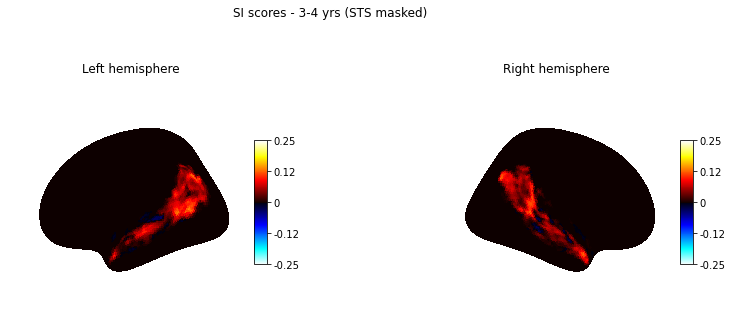

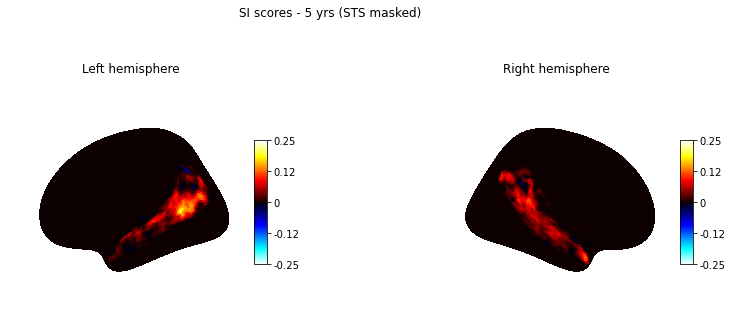

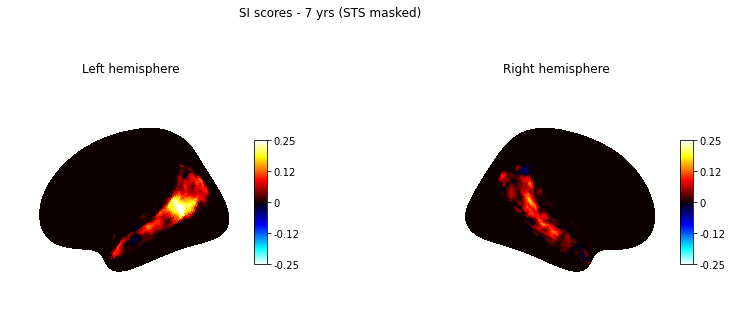

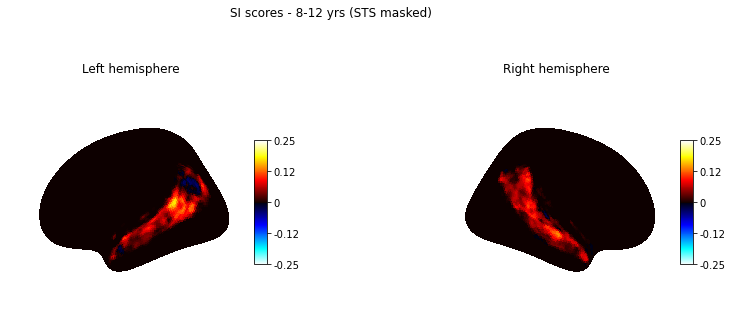

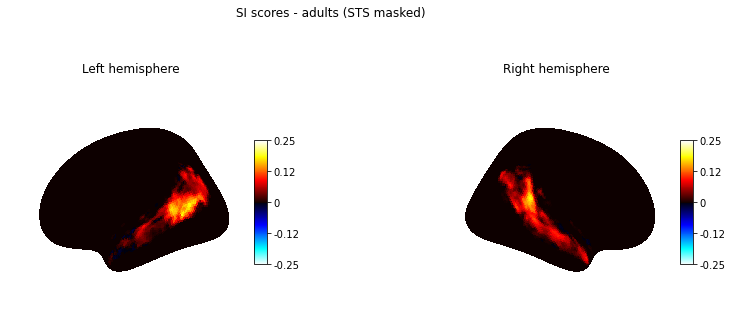

In [36]:
# mask 3-4 yrs data - STS
sts_mask_array = np.invert(STS_mask_resampled.get_fdata().astype('bool'))
SI_isc_volume_34yrs = make_vol(SI_scores_34yrs_unthresholded, mask)
SI_isc_volume_34yrs_array = SI_isc_volume_34yrs.get_fdata()
SI_sts_volume_34yrs = SI_isc_volume_34yrs_array.copy()
SI_sts_volume_34yrs[sts_mask_array] = 0
SI_sts_volume_34yrs_image = nib.Nifti1Image(SI_sts_volume_34yrs, affine=SI_isc_volume_34yrs.affine, header=SI_isc_volume_34yrs.header)
plot_lateral_only_with_vmax(vol=SI_sts_volume_34yrs_image, 
                            title='SI scores - 3-4 yrs (STS masked)', 
                            vis_threshold=0, vmax=0.25)

print(SI_isc_volume_34yrs_array[np.invert(sts_mask_array)].mean())



# mask 5 yrs data - STS
sts_mask_array = np.invert(STS_mask_resampled.get_fdata().astype('bool'))
SI_isc_volume_5yrs = make_vol(SI_scores_5yrs_unthresholded, mask)
SI_isc_volume_5yrs_array = SI_isc_volume_5yrs.get_fdata()
SI_sts_volume_5yrs = SI_isc_volume_5yrs_array.copy()
SI_sts_volume_5yrs[sts_mask_array] = 0
SI_sts_volume_5yrs_image = nib.Nifti1Image(SI_sts_volume_5yrs, affine=SI_isc_volume_5yrs.affine, header=SI_isc_volume_5yrs.header)
plot_lateral_only_with_vmax(vol=SI_sts_volume_5yrs_image, 
                            title='SI scores - 5 yrs (STS masked)', 
                            vis_threshold=0, vmax=0.25)

print(SI_isc_volume_5yrs_array[np.invert(sts_mask_array)].mean())

# mask 7 yrs data - STS
sts_mask_array = np.invert(STS_mask_resampled.get_fdata().astype('bool'))
SI_isc_volume_7yrs = make_vol(SI_scores_7yrs_unthresholded, mask)
SI_isc_volume_7yrs_array = SI_isc_volume_7yrs.get_fdata()
SI_sts_volume_7yrs = SI_isc_volume_7yrs_array.copy()
SI_sts_volume_7yrs[sts_mask_array] = 0
SI_sts_volume_7yrs_image = nib.Nifti1Image(SI_sts_volume_7yrs, affine=SI_isc_volume_7yrs.affine, header=SI_isc_volume_7yrs.header)
plot_lateral_only_with_vmax(vol=SI_sts_volume_7yrs_image, 
                            title='SI scores - 7 yrs (STS masked)', 
                            vis_threshold=0, vmax=0.25)

print(SI_isc_volume_7yrs_array[np.invert(sts_mask_array)].mean())

# mask 8-12 yrs data - STS
sts_mask_array = np.invert(STS_mask_resampled.get_fdata().astype('bool'))
SI_isc_volume_812yrs = make_vol(SI_scores_812yrs_unthresholded, mask)
SI_isc_volume_812yrs_array = SI_isc_volume_812yrs.get_fdata()
SI_sts_volume_812yrs = SI_isc_volume_812yrs_array.copy()
SI_sts_volume_812yrs[sts_mask_array] = 0
SI_sts_volume_812yrs_image = nib.Nifti1Image(SI_sts_volume_812yrs, affine=SI_isc_volume_812yrs.affine, header=SI_isc_volume_812yrs.header)
plot_lateral_only_with_vmax(vol=SI_sts_volume_812yrs_image, 
                            title='SI scores - 8-12 yrs (STS masked)', 
                            vis_threshold=0, vmax=0.25)

print(SI_isc_volume_812yrs_array[np.invert(sts_mask_array)].mean())

#mask adult data - STS
sts_mask_array = np.invert(STS_mask_resampled.get_fdata().astype('bool'))

SI_isc_volume_adult = make_vol(SI_scores_adults_unthresholded, mask)
SI_isc_volume_adult_array = SI_isc_volume_adult.get_fdata()
SI_sts_volume_adult = SI_isc_volume_adult_array.copy()
SI_sts_volume_adult[sts_mask_array] = 0
SI_sts_volume_adult_image = nib.Nifti1Image(SI_sts_volume_adult, affine=SI_isc_volume_adult.affine, header=SI_isc_volume_adult.header)
plot_lateral_only_with_vmax(vol=SI_sts_volume_adult_image, 
                            title='SI scores - adults (STS masked)', 
                            vis_threshold=0, vmax=0.25)

print(SI_isc_volume_adult_array[np.invert(sts_mask_array)].mean())

0.053684589634819396
0.07208849877823445
0.09064628217232194
0.08253895175779603
0.09559261785505986


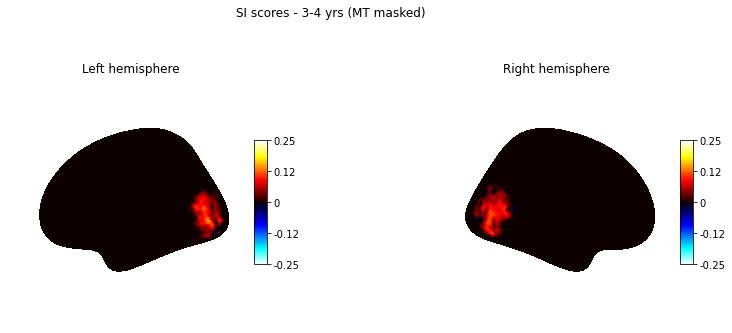

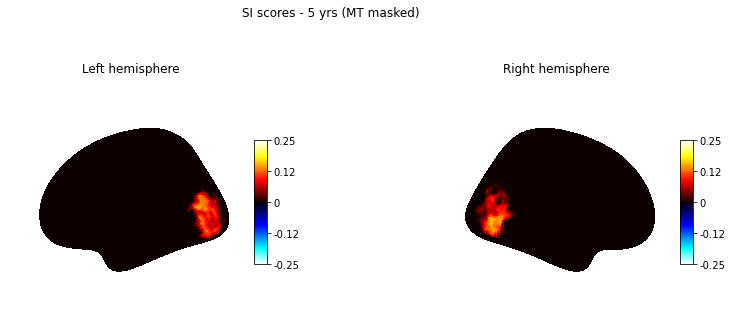

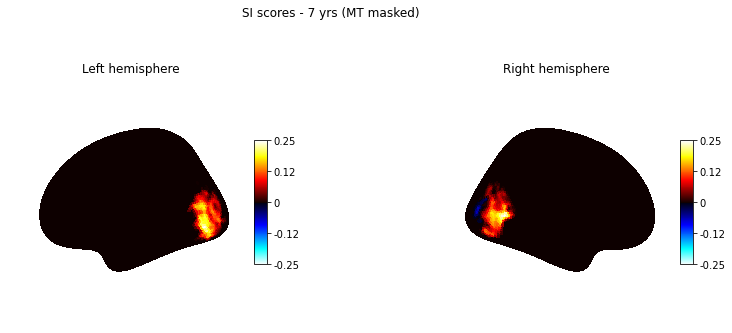

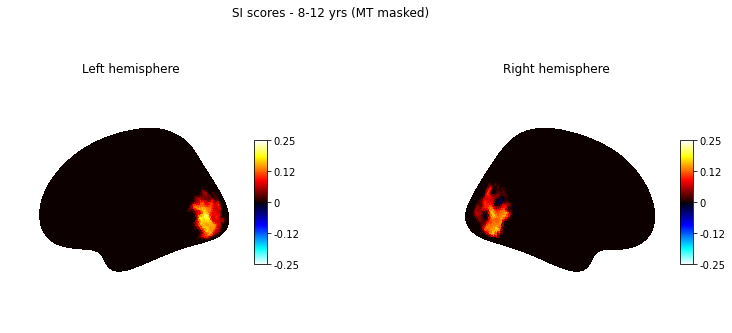

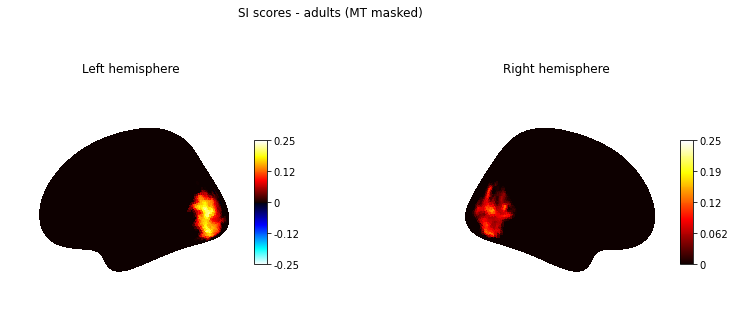

In [37]:
# mask 3-4 yrs data - MT

SI_isc_volume_34yrs = make_vol(SI_scores_34yrs_unthresholded, mask)
SI_isc_volume_34yrs_array = SI_isc_volume_34yrs.get_fdata()
MT_mask_array = np.invert(MT_mask_resampled_bool.get_fdata().astype('bool'))
SI_MT_volume_34yrs = SI_isc_volume_34yrs_array.copy()
SI_MT_volume_34yrs[MT_mask_array] = 0
SI_MT_volume_34yrs_image = nib.Nifti1Image(SI_MT_volume_34yrs, affine=SI_isc_volume_34yrs.affine, header=SI_isc_volume_34yrs.header)
plot_lateral_only_with_vmax(vol=SI_MT_volume_34yrs_image, 
                            title='SI scores - 3-4 yrs (MT masked)', 
                            vis_threshold=0, vmax=0.25)

print(SI_isc_volume_34yrs_array[np.invert(MT_mask_array)].mean())



# mask 5 yrs data - MT

SI_isc_volume_5yrs = make_vol(SI_scores_5yrs_unthresholded, mask)
SI_isc_volume_5yrs_array = SI_isc_volume_5yrs.get_fdata()
MT_mask_array = np.invert(MT_mask_resampled_bool.get_fdata().astype('bool'))
SI_MT_volume_5yrs = SI_isc_volume_5yrs_array.copy()
SI_MT_volume_5yrs[MT_mask_array] = 0
SI_MT_volume_5yrs_image = nib.Nifti1Image(SI_MT_volume_5yrs, affine=SI_isc_volume_5yrs.affine, header=SI_isc_volume_5yrs.header)
plot_lateral_only_with_vmax(vol=SI_MT_volume_5yrs_image, 
                            title='SI scores - 5 yrs (MT masked)', 
                            vis_threshold=0, vmax=0.25)

print(SI_isc_volume_5yrs_array[np.invert(MT_mask_array)].mean())

# mask 7 yrs data - MT

SI_isc_volume_7yrs = make_vol(SI_scores_7yrs_unthresholded, mask)
SI_isc_volume_7yrs_array = SI_isc_volume_7yrs.get_fdata()
MT_mask_array = np.invert(MT_mask_resampled_bool.get_fdata().astype('bool'))
SI_MT_volume_7yrs = SI_isc_volume_7yrs_array.copy()
SI_MT_volume_7yrs[MT_mask_array] = 0
SI_MT_volume_7yrs_image = nib.Nifti1Image(SI_MT_volume_7yrs, affine=SI_isc_volume_7yrs.affine, header=SI_isc_volume_7yrs.header)
plot_lateral_only_with_vmax(vol=SI_MT_volume_7yrs_image, 
                            title='SI scores - 7 yrs (MT masked)', 
                            vis_threshold=0, vmax=0.25)

print(SI_isc_volume_7yrs_array[np.invert(MT_mask_array)].mean())

# mask 8-12 yrs data - MT

SI_isc_volume_812yrs = make_vol(SI_scores_812yrs_unthresholded, mask)
SI_isc_volume_812yrs_array = SI_isc_volume_812yrs.get_fdata()
MT_mask_array = np.invert(MT_mask_resampled_bool.get_fdata().astype('bool'))
SI_MT_volume_812yrs = SI_isc_volume_812yrs_array.copy()
SI_MT_volume_812yrs[MT_mask_array] = 0
SI_MT_volume_812yrs_image = nib.Nifti1Image(SI_MT_volume_812yrs, affine=SI_isc_volume_812yrs.affine, header=SI_isc_volume_812yrs.header)
plot_lateral_only_with_vmax(vol=SI_MT_volume_812yrs_image, 
                            title='SI scores - 8-12 yrs (MT masked)', 
                            vis_threshold=0, vmax=0.25)

print(SI_isc_volume_812yrs_array[np.invert(MT_mask_array)].mean())

#mask adult data - MT
SI_isc_volume_adult = make_vol(SI_scores_adults_unthresholded, mask)
SI_isc_volume_adult_array = SI_isc_volume_adult.get_fdata()
MT_mask_array = np.invert(MT_mask_resampled_bool.get_fdata().astype('bool'))
SI_MT_volume_adult = SI_isc_volume_adult_array.copy()
SI_MT_volume_adult[MT_mask_array] = 0
SI_MT_volume_adult_image = nib.Nifti1Image(SI_MT_volume_adult, affine=SI_isc_volume_adult.affine, header=SI_isc_volume_adult.header)
plot_lateral_only_with_vmax(vol=SI_MT_volume_adult_image, 
                            title='SI scores - adults (MT masked)', 
                            vis_threshold=0, vmax=0.25)

print(SI_isc_volume_adult_array[np.invert(MT_mask_array)].mean())

In [38]:
#load individual subject score

subj_SI_scores_34yrs_unthresholded = np.load(os.path.join(
    directory, '3-4-yrs', 'encoding_results','unthresholded_whole', '3-4-yrs_interaction_only_scores_adult_isc_mask.npy')).T
print(subj_SI_scores_34yrs_unthresholded.shape)
n_34yrs = subj_SI_scores_34yrs_unthresholded.shape[-1]

subj_SI_scores_5yrs_unthresholded = np.load(os.path.join(
    directory, '5-yrs', 'encoding_results','unthresholded', '5-yrs_interaction_only_scores_adult_isc_mask.npy')).T
print(subj_SI_scores_5yrs_unthresholded.shape)
n_5yrs = subj_SI_scores_5yrs_unthresholded.shape[-1]

subj_SI_scores_7yrs_unthresholded = np.load(os.path.join(
    directory, '7-yrs', 'encoding_results','unthresholded', '7-yrs_interaction_only_scores_adult_isc_mask.npy')).T
print(subj_SI_scores_7yrs_unthresholded.shape)
n_7yrs = subj_SI_scores_7yrs_unthresholded.shape[-1]

subj_SI_scores_812yrs_unthresholded = np.load(os.path.join(
    directory, '8-12-yrs', 'encoding_results','unthresholded', '8-12-yrs_interaction_only_scores_adult_isc_mask.npy')).T
print(subj_SI_scores_5yrs_unthresholded.shape)
n_812yrs = subj_SI_scores_812yrs_unthresholded.shape[-1]

subj_SI_scores_adults_unthresholded = np.load(os.path.join(
    directory, 'adults', 'encoding_results','unthresholded', 'adults_interaction_only_scores_adult_isc_mask.npy')).T
print(subj_SI_scores_adults_unthresholded.shape)
n_adults = subj_SI_scores_adults_unthresholded.shape[-1]

(136543, 31)
(136543, 34)
(136543, 23)
(136543, 34)
(136543, 33)


In [39]:
### get the encoding performance correlation score for STS

sts_mask_array = STS_mask_resampled.get_fdata().astype('bool') #un-invert it bc not mapping it to brain surSI

mask_volume = mask.get_fdata() > 0
print(mask_volume.shape)
print(mask_volume.size) #shape of the brain
print(mask_volume.sum())

### adults
print(subj_SI_scores_adults_unthresholded.shape)
volume_adult = np.zeros(mask_volume.shape + (n_adults,))
volume_adult[mask_volume, :] = subj_SI_scores_adults_unthresholded # change subj data to shape of the brain
sts_adult_SI_score = volume_adult[sts_mask_array, :].mean(axis=0)
print('STS adults SI:', sts_adult_SI_score.mean())

(79, 95, 68)
510340
136543
(136543, 33)
STS adults SI: 0.05707641310413939


In [40]:
### 3-4-yrs
print(subj_SI_scores_34yrs_unthresholded.shape)
volume_34yrs = np.zeros(mask_volume.shape + (n_34yrs,))
volume_34yrs[mask_volume, :] = subj_SI_scores_34yrs_unthresholded # change subj data to shape of the brain
sts_34yrs_SI_score = volume_34yrs[sts_mask_array, :].mean(axis=0)
print('STS 3-4 yrs SI:', sts_34yrs_SI_score.mean())

null_distribution = generate_null_difference_permute_groups(sts_adult_SI_score, sts_34yrs_SI_score, 5000)
print(np.shape(null_distribution)) #returns array of differences of a mean of randomly split (5000 times) groups
observed_difference = np.mean(sts_adult_SI_score) - np.mean(sts_34yrs_SI_score)
print(observed_difference)

# Compute the p-value
p_value = np.sum(np.abs(null_distribution) >= np.abs(observed_difference)) / 5000 #two-tailed p-val test

# Check significance
if p_value < 0.05:
    print("The difference between groups is statistically significant!")
else:
    print("The difference between groups is not statistically significant.")

print(p_value)

(136543, 31)
STS 3-4 yrs SI: 0.04594559397071065
(5000,)
0.01113081913342874
The difference between groups is not statistically significant.
0.3142


In [41]:
### 5-yrs
print(subj_SI_scores_5yrs_unthresholded.shape)
volume_5yrs = np.zeros(mask_volume.shape + (n_5yrs,))
volume_5yrs[mask_volume, :] = subj_SI_scores_5yrs_unthresholded # change subj data to shape of the brain
sts_5yrs_SI_score = volume_5yrs[sts_mask_array, :].mean(axis=0)
print('STS 5 yrs SI:',sts_5yrs_SI_score.mean())

null_distribution = generate_null_difference_permute_groups(sts_adult_SI_score, sts_5yrs_SI_score, 5000)
print(np.shape(null_distribution)) #returns array of differences of a mean of randomly split (5000 times) groups
observed_difference = np.mean(sts_adult_SI_score) - np.mean(sts_5yrs_SI_score)
print(observed_difference)

# Compute the p-value
p_value = np.sum(np.abs(null_distribution) >= np.abs(observed_difference)) / 5000 #two-tailed p-val test

# Check significance
if p_value < 0.05:
    print("The difference between groups is statistically significant!")
else:
    print("The difference between groups is not statistically significant.")

print(p_value)

(136543, 34)
STS 5 yrs SI: 0.040910956267068393
(5000,)
0.016165456837070998
The difference between groups is not statistically significant.
0.0984


In [42]:
### 7-yrs
print(subj_SI_scores_7yrs_unthresholded.shape)
volume_7yrs = np.zeros(mask_volume.shape + (n_7yrs,))
volume_7yrs[mask_volume, :] = subj_SI_scores_7yrs_unthresholded # change subj data to shape of the brain
sts_7yrs_SI_score = volume_7yrs[sts_mask_array, :].mean(axis=0)
print('STS 7 yrs SI:',sts_7yrs_SI_score.mean())

null_distribution = generate_null_difference_permute_groups(sts_adult_SI_score, sts_7yrs_SI_score, 5000)
print(np.shape(null_distribution)) #returns array of differences of a mean of randomly split (5000 times) groups
observed_difference = np.mean(sts_adult_SI_score) - np.mean(sts_7yrs_SI_score)
print(observed_difference)

# Compute the p-value
p_value = np.sum(np.abs(null_distribution) >= np.abs(observed_difference)) / 5000 #two-tailed p-val test

# Check significance
if p_value < 0.05:
    print("The difference between groups is statistically significant!")
else:
    print("The difference between groups is not statistically significant.")

print(p_value)

(136543, 23)
STS 7 yrs SI: 0.0628237434214614
(5000,)
-0.005747330317322004
The difference between groups is not statistically significant.
0.6408


In [43]:
### 8-12-yrs
print(subj_SI_scores_812yrs_unthresholded.shape)
volume_812yrs = np.zeros(mask_volume.shape + (n_812yrs,))
volume_812yrs[mask_volume, :] = subj_SI_scores_812yrs_unthresholded # change subj data to shape of the brain
sts_812yrs_SI_score = volume_812yrs[sts_mask_array, :].mean(axis=0)
print('STS 8-12 yrs SI:', sts_812yrs_SI_score.mean())

null_distribution = generate_null_difference_permute_groups(sts_adult_SI_score, sts_812yrs_SI_score, 5000)
print(np.shape(null_distribution)) #returns array of differences of a mean of randomly split (5000 times) groups
observed_difference = np.mean(sts_adult_SI_score) - np.mean(sts_812yrs_SI_score)
print(observed_difference)

# Compute the p-value
p_value = np.sum(np.abs(null_distribution) >= np.abs(observed_difference)) / 5000 #two-tailed p-val test

# Check significance
if p_value < 0.05:
    print("The difference between groups is statistically significant!")
else:
    print("The difference between groups is not statistically significant.")

print(p_value)

(136543, 34)
STS 8-12 yrs SI: 0.05078142602483521
(5000,)
0.006294987079304183
The difference between groups is not statistically significant.
0.5218


In [44]:
### get the encoding performance correlation score - MT

mt_mask_array = MT_mask_resampled_bool.get_fdata().astype('bool') #un-invert it bc not mapping it to brain surSI

mask_volume = mask.get_fdata() > 0
print(mask_volume.shape)
print(mask_volume.size) #shape of the brain
print(mask_volume.sum())

### adults
print(subj_SI_scores_adults_unthresholded.shape)
volume_adult = np.zeros(mask_volume.shape + (n_adults,))
volume_adult[mask_volume, :] = subj_SI_scores_adults_unthresholded # change subj data to shape of the brain
mt_adult_SI_score = volume_adult[mt_mask_array, :].mean(axis=0)
print('MT adults SI mean:', mt_adult_SI_score.mean())

(79, 95, 68)
510340
136543
(136543, 33)
MT adults SI mean: 0.09559261785505989


In [45]:
### 3-4-yrs
print(subj_SI_scores_34yrs_unthresholded.shape)
volume_34yrs = np.zeros(mask_volume.shape + (n_34yrs,))
volume_34yrs[mask_volume, :] = subj_SI_scores_34yrs_unthresholded # change subj data to shape of the brain
mt_34yrs_SI_score = volume_34yrs[mt_mask_array, :].mean(axis=0)
print('MT 3-4 yrs SI:', mt_34yrs_SI_score.mean())

null_distribution = generate_null_difference_permute_groups(mt_adult_SI_score, mt_34yrs_SI_score, 5000)
print(np.shape(null_distribution)) #returns array of differences of a mean of randomly split (5000 times) groups
observed_difference = np.mean(mt_adult_SI_score) - np.mean(mt_34yrs_SI_score)
print(observed_difference)

# Compute the p-value
p_value = np.sum(np.abs(null_distribution) >= np.abs(observed_difference)) / 5000 #two-tailed p-val test

# Check significance
if p_value < 0.05:
    print("The difference between groups is statistically significant!")
else:
    print("The difference between groups is not statistically significant.")

print(p_value)

(136543, 31)
MT 3-4 yrs SI: 0.0536845896348194
(5000,)
0.041908028220240486
The difference between groups is statistically significant!
0.0144


In [46]:
### 5-yrs
print(subj_SI_scores_5yrs_unthresholded.shape)
volume_5yrs = np.zeros(mask_volume.shape + (n_5yrs,))
volume_5yrs[mask_volume, :] = subj_SI_scores_5yrs_unthresholded # change subj data to shape of the brain
mt_5yrs_SI_score = volume_5yrs[mt_mask_array, :].mean(axis=0)
print('MT 5 yrs SI:', mt_5yrs_SI_score.mean())

null_distribution = generate_null_difference_permute_groups(mt_adult_SI_score, mt_5yrs_SI_score, 5000)
print(np.shape(null_distribution)) #returns array of differences of a mean of randomly split (5000 times) groups
observed_difference = np.mean(mt_adult_SI_score) - np.mean(mt_5yrs_SI_score)
print(observed_difference)

# Compute the p-value
p_value = np.sum(np.abs(null_distribution) >= np.abs(observed_difference)) / 5000 #two-tailed p-val test

# Check significance
if p_value < 0.05:
    print("The difference between groups is statistically significant!")
else:
    print("The difference between groups is not statistically significant.")

print(p_value)

(136543, 34)
MT 5 yrs SI: 0.07208849877823441
(5000,)
0.02350411907682548
The difference between groups is not statistically significant.
0.159


In [47]:
### 7-yrs
print(subj_SI_scores_7yrs_unthresholded.shape)
volume_7yrs = np.zeros(mask_volume.shape + (n_7yrs,))
volume_7yrs[mask_volume, :] = subj_SI_scores_7yrs_unthresholded # change subj data to shape of the brain
mt_7yrs_SI_score = volume_7yrs[mt_mask_array, :].mean(axis=0)
print('MT 7 yrs SI:', mt_7yrs_SI_score.mean())

null_distribution = generate_null_difference_permute_groups(mt_adult_SI_score, mt_7yrs_SI_score, 5000)
print(np.shape(null_distribution)) #returns array of differences of a mean of randomly split (5000 times) groups
observed_difference = np.mean(mt_adult_SI_score) - np.mean(mt_7yrs_SI_score)
print(observed_difference)

# Compute the p-value
p_value = np.sum(np.abs(null_distribution) >= np.abs(observed_difference)) / 5000 #two-tailed p-val test

# Check significance
if p_value < 0.05:
    print("The difference between groups is statistically significant!")
else:
    print("The difference between groups is not statistically significant.")

print(p_value)

(136543, 23)
MT 7 yrs SI: 0.09064628217232196
(5000,)
0.004946335682737932
The difference between groups is not statistically significant.
0.763


In [48]:
### 8-12-yrs
print(subj_SI_scores_812yrs_unthresholded.shape)
volume_812yrs = np.zeros(mask_volume.shape + (n_812yrs,))
volume_812yrs[mask_volume, :] = subj_SI_scores_812yrs_unthresholded # change subj data to shape of the brain
mt_812yrs_SI_score = volume_812yrs[mt_mask_array, :].mean(axis=0)
print('MT 8-12 yrs SI:', mt_812yrs_SI_score.mean())

null_distribution = generate_null_difference_permute_groups(mt_adult_SI_score, mt_812yrs_SI_score, 5000)
print(np.shape(null_distribution)) #returns array of differences of a mean of randomly split (5000 times) groups
observed_difference = np.mean(mt_adult_SI_score) - np.mean(mt_812yrs_SI_score)
print(observed_difference)

# Compute the p-value
p_value = np.sum(np.abs(null_distribution) >= np.abs(observed_difference)) / 5000 #two-tailed p-val test

# Check significance
if p_value < 0.05:
    print("The difference between groups is statistically significant!")
else:
    print("The difference between groups is not statistically significant.")

print(p_value)


(136543, 34)
MT 8-12 yrs SI: 0.08253895175779599
(5000,)
0.013053666097263897
The difference between groups is not statistically significant.
0.3926


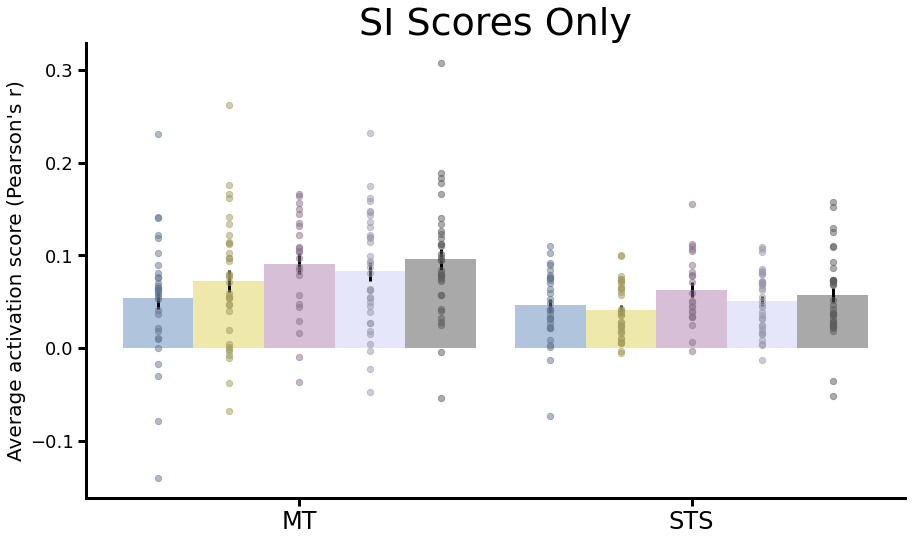

In [49]:
### mean activation for each subject in STS for SI model

# Calculate the average of the array of individual subj average 
SI_STS_34yrs_mean = sts_34yrs_SI_score.mean()
SI_STS_5yrs_mean = sts_5yrs_SI_score.mean()
SI_STS_7yrs_mean = sts_7yrs_SI_score.mean()
SI_STS_812yrs_mean = sts_812yrs_SI_score.mean()
SI_STS_adults_mean = sts_adult_SI_score.mean()

#STD
SI_STS_34yrs_std = np.std(sts_34yrs_SI_score)
SI_STS_5yrs_std= np.std(sts_5yrs_SI_score)
SI_STS_7yrs_std= np.std(sts_7yrs_SI_score)
SI_STS_812yrs_std= np.std(sts_812yrs_SI_score)
SI_STS_adults_std = np.std(sts_adult_SI_score)

SI_STS_34yrs_err = np.std(sts_34yrs_SI_score)/np.sqrt(len(sts_34yrs_SI_score))
SI_STS_5yrs_err= np.std(sts_5yrs_SI_score)/np.sqrt(len(sts_5yrs_SI_score))
SI_STS_7yrs_err= np.std(sts_7yrs_SI_score)/np.sqrt(len(sts_7yrs_SI_score))
SI_STS_812yrs_err= np.std(sts_812yrs_SI_score)/np.sqrt(len(sts_812yrs_SI_score))
SI_STS_adults_err = np.std(sts_adult_SI_score)/np.sqrt(len(sts_adult_SI_score))

### mean activation for each subject in MT for SI model

# Calculate the average of the array of individual subj average 
SI_MT_34yrs_mean = mt_34yrs_SI_score.mean()
#print(SI_MT_34yrs_mean)
SI_MT_5yrs_mean = mt_5yrs_SI_score.mean()
SI_MT_7yrs_mean = mt_7yrs_SI_score.mean()
SI_MT_812yrs_mean = mt_812yrs_SI_score.mean()
SI_MT_adults_mean = mt_adult_SI_score.mean()

#std
SI_MT_34yrs_std = np.std(mt_34yrs_SI_score)
SI_MT_5yrs_std= np.std(mt_5yrs_SI_score)
SI_MT_7yrs_std= np.std(mt_7yrs_SI_score)
SI_MT_812yrs_std= np.std(mt_812yrs_SI_score)
SI_MT_adults_std = np.std(mt_adult_SI_score)

#err
SI_MT_34yrs_err = np.std(mt_34yrs_SI_score)/np.sqrt(len(mt_34yrs_SI_score))
SI_MT_5yrs_err= np.std(mt_5yrs_SI_score)/np.sqrt(len(mt_5yrs_SI_score))
SI_MT_7yrs_err= np.std(mt_7yrs_SI_score)/np.sqrt(len(mt_7yrs_SI_score))
SI_MT_812yrs_err= np.std(mt_812yrs_SI_score)/np.sqrt(len(mt_812yrs_SI_score))
SI_MT_adults_err = np.std(mt_adult_SI_score)/np.sqrt(len(mt_adult_SI_score))

# Define labels, positions, bar heights and error bar heights
labels = ['MT','STS']
X_axis = np.arange(len(labels))


SI_34 = [SI_MT_34yrs_mean, SI_STS_34yrs_mean]
error = [SI_MT_34yrs_err, SI_STS_34yrs_err]

SI_5 = [SI_MT_5yrs_mean, SI_STS_5yrs_mean]
error2 = [SI_MT_5yrs_err, SI_STS_5yrs_err ]

SI_7 = [SI_MT_7yrs_mean, SI_STS_7yrs_mean]
error3 = [SI_MT_7yrs_err, SI_STS_7yrs_err ]

SI_812 = [SI_MT_812yrs_mean, SI_STS_812yrs_mean]
error4 = [SI_MT_812yrs_err, SI_STS_812yrs_err ]

SI_adult = [SI_MT_adults_mean, SI_STS_adults_mean]
error5 = [SI_MT_adults_err, SI_STS_adults_err]

_, ax = plt.subplots(figsize=(14.69, 8.38))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(3)
ax.spines['bottom'].set_linewidth(3)
ax.tick_params(width=3, length=8)
ax.bar(X_axis - 0.36, SI_34, 0.18, yerr=error, label = '3-4 yrs', color = 'lightsteelblue', error_kw=dict(lw=3))
ax.bar(X_axis - 0.18, SI_5, 0.18, yerr= error2, label = '5 yrs', color ='palegoldenrod', error_kw=dict(lw=3))
ax.bar(X_axis + 0.0, SI_7, 0.18, yerr= error3, label = '7 yrs', color ='thistle', error_kw=dict(lw=3))
ax.bar(X_axis + 0.18, SI_812, 0.18, yerr= error4, label = '8-12 yrs', color ='lavender', error_kw=dict(lw=3))
ax.bar(X_axis + 0.36, SI_adult, 0.18, yerr= error5, label = 'adults', color ='darkgrey', error_kw=dict(lw=3))

# Scatter individual scores
scatter_width = 0.18
scatter_shifts = [-0.36, -0.18, 0.0, 0.18, 0.36]
scores_MT = [mt_34yrs_SI_score, mt_5yrs_SI_score, mt_7yrs_SI_score, mt_812yrs_SI_score, mt_adult_SI_score]
scores_STS = [sts_34yrs_SI_score, sts_5yrs_SI_score, sts_7yrs_SI_score, sts_812yrs_SI_score, sts_adult_SI_score]

age_colors = ['lightsteelblue', 'palegoldenrod', 'thistle', 'lavender', 'darkgrey']
darkened_colors = [darken_color(color) for color in age_colors]


for i, shift in enumerate(scatter_shifts):
    # Scatter for MT
    ax.scatter([X_axis[0] + shift]*len(scores_MT[i]), 
               scores_MT[i], 
               marker='o', color=darkened_colors[i], s=40, alpha=0.5, zorder=3) # <-- Added zorder

    # Scatter for STS
    ax.scatter([X_axis[1] + shift]* len(scores_STS[i]), 
               scores_STS[i], 
               marker='o', color=darkened_colors[i], s=40, alpha=0.5, zorder=3) # <-- Added zorder

    ax.set_xticks([0,1])
ax.set_xticklabels(labels, fontsize=24)
ax.tick_params(axis='y', which='major', labelsize=18)
ax.set_ylabel("Average activation score (Pearson's r)", fontsize=20)
ax.set_title("SI Scores Only", fontsize=38)
#ax.set_yticks([0, 0.05, 0.10, 0.15, 0.20])
#ax.set_ylim([0, 0.2])
ax.legend([], [], frameon=False)
plt.savefig('SI_only_w_scatter.pdf')
plt.show()


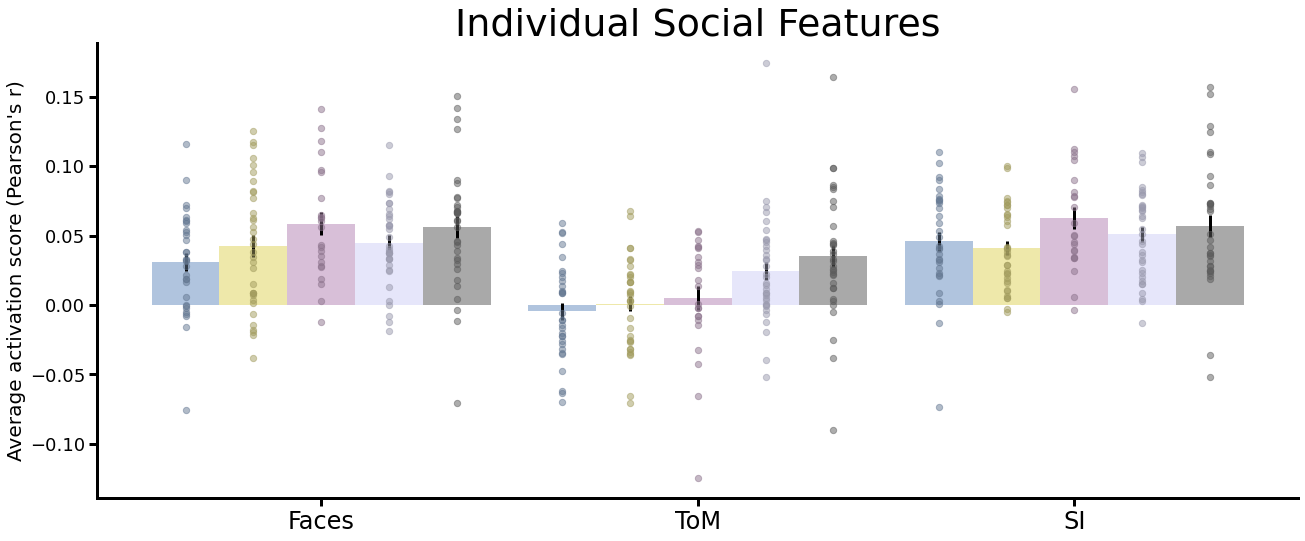

In [50]:
### mean activation for each subject in STS for SI model

# Calculate the average of the array of individual subj average 
### mean activation for each subject in MT for SI model
SI_STS_34yrs_mean = sts_34yrs_SI_score.mean()
SI_STS_5yrs_mean = sts_5yrs_SI_score.mean()
SI_STS_7yrs_mean = sts_7yrs_SI_score.mean()
SI_STS_812yrs_mean = sts_812yrs_SI_score.mean()
SI_STS_adults_mean = sts_adult_SI_score.mean()

#STD
SI_STS_34yrs_std = np.std(sts_34yrs_SI_score)
SI_STS_5yrs_std= np.std(sts_5yrs_SI_score)
SI_STS_7yrs_std= np.std(sts_7yrs_SI_score)
SI_STS_812yrs_std= np.std(sts_812yrs_SI_score)
SI_STS_adults_std = np.std(sts_adult_SI_score)

SI_STS_34yrs_err = np.std(sts_34yrs_SI_score)/np.sqrt(len(sts_34yrs_SI_score))
SI_STS_5yrs_err= np.std(sts_5yrs_SI_score)/np.sqrt(len(sts_5yrs_SI_score))
SI_STS_7yrs_err= np.std(sts_7yrs_SI_score)/np.sqrt(len(sts_7yrs_SI_score))
SI_STS_812yrs_err= np.std(sts_812yrs_SI_score)/np.sqrt(len(sts_812yrs_SI_score))
SI_STS_adults_err = np.std(sts_adult_SI_score)/np.sqrt(len(sts_adult_SI_score))

### mean activation for each subject in STS for faces model
face_STS_34yrs_mean = sts_34yrs_face_score.mean()
face_STS_5yrs_mean = sts_5yrs_face_score.mean()
face_STS_7yrs_mean = sts_7yrs_face_score.mean()
face_STS_812yrs_mean = sts_812yrs_face_score.mean()
face_STS_adults_mean = sts_adult_face_score.mean()

#STD
face_STS_34yrs_std = np.std(sts_34yrs_face_score)
face_STS_5yrs_std= np.std(sts_5yrs_face_score)
face_STS_7yrs_std= np.std(sts_7yrs_face_score)
face_STS_812yrs_std= np.std(sts_812yrs_face_score)
face_STS_adults_std = np.std(sts_adult_face_score)

face_STS_34yrs_err = np.std(sts_34yrs_face_score)/np.sqrt(len(sts_34yrs_face_score))
face_STS_5yrs_err= np.std(sts_5yrs_face_score)/np.sqrt(len(sts_5yrs_face_score))
face_STS_7yrs_err= np.std(sts_7yrs_face_score)/np.sqrt(len(sts_7yrs_face_score))
face_STS_812yrs_err= np.std(sts_812yrs_face_score)/np.sqrt(len(sts_812yrs_face_score))
face_STS_adults_err = np.std(sts_adult_face_score)/np.sqrt(len(sts_adult_face_score))


### mean activation for each subject in STS for ToM model
ToM_STS_34yrs_mean = sts_34yrs_ToM_score.mean()
ToM_STS_5yrs_mean = sts_5yrs_ToM_score.mean()
ToM_STS_7yrs_mean = sts_7yrs_ToM_score.mean()
ToM_STS_812yrs_mean = sts_812yrs_ToM_score.mean()
ToM_STS_adults_mean = sts_adult_ToM_score.mean()

#STD
ToM_STS_34yrs_std = np.std(sts_34yrs_ToM_score)
ToM_STS_5yrs_std= np.std(sts_5yrs_ToM_score)
ToM_STS_7yrs_std= np.std(sts_7yrs_ToM_score)
ToM_STS_812yrs_std= np.std(sts_812yrs_ToM_score)
ToM_STS_adults_std = np.std(sts_adult_ToM_score)

ToM_STS_34yrs_err = np.std(sts_34yrs_ToM_score)/np.sqrt(len(sts_34yrs_ToM_score))
ToM_STS_5yrs_err= np.std(sts_5yrs_ToM_score)/np.sqrt(len(sts_5yrs_ToM_score))
ToM_STS_7yrs_err= np.std(sts_7yrs_ToM_score)/np.sqrt(len(sts_7yrs_ToM_score))
ToM_STS_812yrs_err= np.std(sts_812yrs_ToM_score)/np.sqrt(len(sts_812yrs_ToM_score))
ToM_STS_adults_err = np.std(sts_adult_ToM_score)/np.sqrt(len(sts_adult_ToM_score))

# Define labels, positions, bar heights and error bar heights
labels = ['Faces','ToM', 'SI']
X_axis = np.arange(len(labels))


all_34 = [face_STS_34yrs_mean,ToM_STS_34yrs_mean,SI_STS_34yrs_mean]
error = [face_STS_34yrs_err,ToM_STS_34yrs_err,SI_STS_34yrs_err]

all_5 = [face_STS_5yrs_mean,ToM_STS_5yrs_mean,SI_STS_5yrs_mean]
error2 = [face_STS_5yrs_err,ToM_STS_5yrs_err,SI_STS_5yrs_err ]

all_7 = [face_STS_7yrs_mean,ToM_STS_7yrs_mean,SI_STS_7yrs_mean]
error3 = [face_STS_7yrs_err,ToM_STS_7yrs_err,SI_STS_7yrs_err ]

all_812 = [face_STS_812yrs_mean,ToM_STS_812yrs_mean,SI_STS_812yrs_mean]
error4 = [face_STS_812yrs_err,ToM_STS_812yrs_err,SI_STS_812yrs_err ]

all_adult = [face_STS_adults_mean,ToM_STS_adults_mean,SI_STS_adults_mean]
error5 = [face_STS_adults_err, ToM_STS_adults_err,SI_STS_adults_err]

_, ax = plt.subplots(figsize=(21.53, 8.38))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(3)
ax.spines['bottom'].set_linewidth(3)
ax.tick_params(width=3, length=8)
ax.bar(X_axis - 0.36, all_34, 0.18, yerr=error, label = '3-4 yrs', color = 'lightsteelblue', error_kw=dict(lw=3))
ax.bar(X_axis - 0.18, all_5, 0.18, yerr= error2, label = '5 yrs', color ='palegoldenrod', error_kw=dict(lw=3))
ax.bar(X_axis + 0.0, all_7, 0.18, yerr= error3, label = '7 yrs', color ='thistle', error_kw=dict(lw=3))
ax.bar(X_axis + 0.18, all_812, 0.18, yerr= error4, label = '8-12 yrs', color ='lavender', error_kw=dict(lw=3))
ax.bar(X_axis + 0.36, all_adult, 0.18, yerr= error5, label = 'adults', color ='darkgrey', error_kw=dict(lw=3))

# Scatter individual scores
scatter_width = 0.18
scatter_shifts = [-0.36, -0.18, 0.0, 0.18, 0.36]
scores_face = [sts_34yrs_face_score, sts_5yrs_face_score, sts_7yrs_face_score, sts_812yrs_face_score, sts_adult_face_score]
scores_ToM = [sts_34yrs_ToM_score, sts_5yrs_ToM_score, sts_7yrs_ToM_score, sts_812yrs_ToM_score, sts_adult_ToM_score]
scores_SI = [sts_34yrs_SI_score, sts_5yrs_SI_score, sts_7yrs_SI_score, sts_812yrs_SI_score, sts_adult_SI_score]

age_colors = ['lightsteelblue', 'palegoldenrod', 'thistle', 'lavender', 'darkgrey']
darkened_colors = [darken_color(color) for color in age_colors]


for i, shift in enumerate(scatter_shifts):
    # Scatter for face
    ax.scatter([X_axis[0] + shift]*len(scores_face[i]), 
               scores_face[i], 
               marker='o', color=darkened_colors[i], s=40, alpha=0.5, zorder=3) # <-- Added zorder

    # Scatter for ToM
    ax.scatter([X_axis[1] + shift]* len(scores_ToM[i]), 
               scores_ToM[i], 
               marker='o', color=darkened_colors[i], s=40, alpha=0.5, zorder=3) # <-- Added zorder
    
    # Scatter for SI
    ax.scatter([X_axis[2] + shift]*len(scores_SI[i]), 
               scores_SI[i], 
               marker='o', color=darkened_colors[i], s=40, alpha=0.5, zorder=3) # <-- Added zorder

ax.set_xticks([0,1,2])
ax.set_xticklabels(labels, fontsize=24)
ax.tick_params(axis='y', which='major', labelsize=18)
ax.set_ylabel("Average activation score (Pearson's r)", fontsize=20)
ax.set_title("Individual Social Features", fontsize=38)
#ax.set_yticks([-0.10, -0.05, 0, 0.05, 0.10, 0.15, 0.2])
#ax.set_ylim([0, 0.2])
ax.legend([], [], frameon=False)
plt.savefig('all_indv_social_w_scatter.pdf')
plt.show()


<h1>Valence</h1>

In [52]:
#Load social model scores data

valence_scores_34yrs_unthresholded = np.mean(np.load(os.path.join(
    directory, '3-4-yrs', 'encoding_results', 'unthresholded_whole', '3-4-yrs_valence_only_scores_adult_isc_mask.npy')), axis=0)

valence_scores_5yrs_unthresholded = np.mean(np.load(os.path.join(
    directory, '5-yrs','encoding_results', 'unthresholded', '5-yrs_valence_only_scores_adult_isc_mask.npy')), axis=0)

valence_scores_7yrs_unthresholded = np.mean(np.load(os.path.join(
    directory, '7-yrs','encoding_results', 'unthresholded', '7-yrs_valence_only_scores_adult_isc_mask.npy')), axis=0)

valence_scores_812yrs_unthresholded = np.mean(np.load(os.path.join(
    directory, '8-12-yrs','encoding_results', 'unthresholded', '8-12-yrs_valence_only_scores_adult_isc_mask.npy')), axis=0)

valence_scores_adults_unthresholded = np.mean(np.load(os.path.join(
    directory, 'adults', 'encoding_results','unthresholded', 'adults_valence_only_scores_adult_isc_mask.npy')), axis=0)

0.06345673721879412
0.06984031875935791
0.05522488432986455
0.0577938750834152
0.044216527743773805


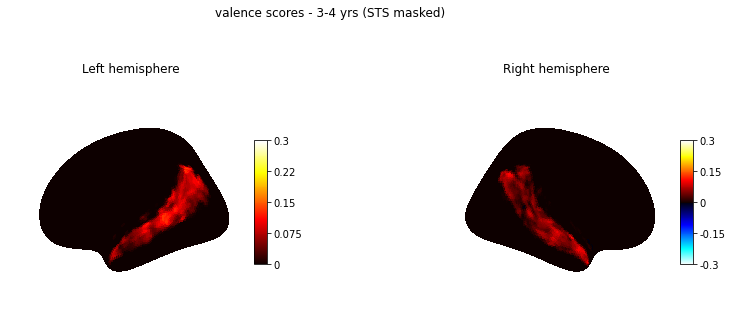

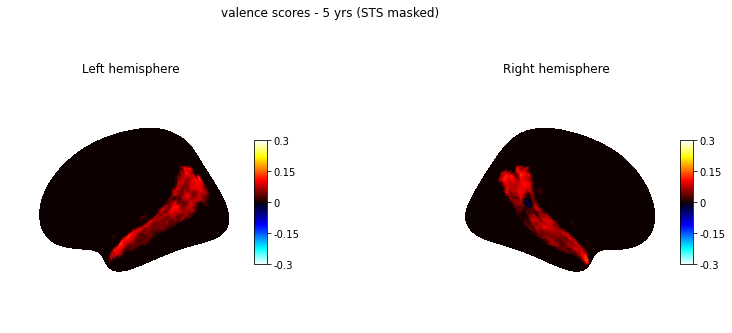

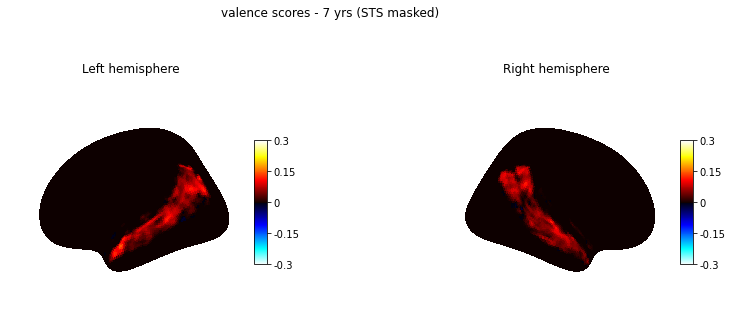

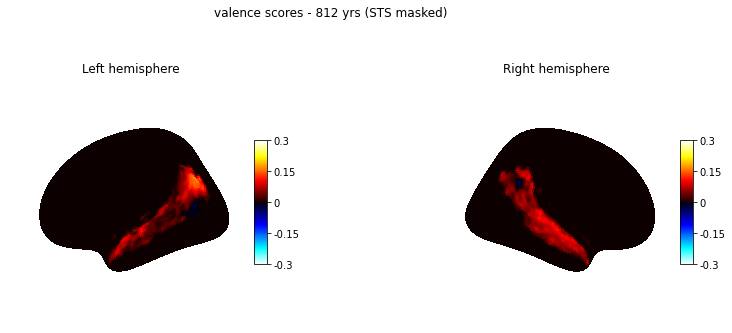

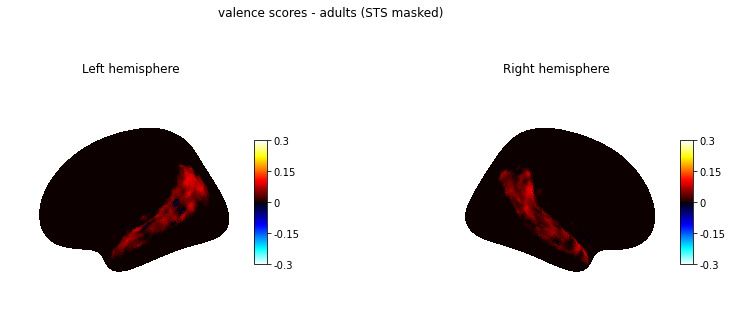

In [53]:
# mask 3-4 yrs data - STS
sts_mask_array = np.invert(STS_mask_resampled.get_fdata().astype('bool'))
valence_isc_volume_34yrs = make_vol(valence_scores_34yrs_unthresholded, mask)
valence_isc_volume_34yrs_array = valence_isc_volume_34yrs.get_fdata()
valence_sts_volume_34yrs = valence_isc_volume_34yrs_array.copy()
valence_sts_volume_34yrs[sts_mask_array] = 0
valence_sts_volume_34yrs_image = nib.Nifti1Image(valence_sts_volume_34yrs, affine=valence_isc_volume_34yrs.affine, header=valence_isc_volume_34yrs.header)
plot_lateral_only_with_vmax(vol=valence_sts_volume_34yrs_image, 
                            title='valence scores - 3-4 yrs (STS masked)', 
                            vis_threshold=0, vmax=0.3)

print(valence_isc_volume_34yrs_array[np.invert(sts_mask_array)].mean())



# mask 5 yrs data - STS
sts_mask_array = np.invert(STS_mask_resampled.get_fdata().astype('bool'))
valence_isc_volume_5yrs = make_vol(valence_scores_5yrs_unthresholded, mask)
valence_isc_volume_5yrs_array = valence_isc_volume_5yrs.get_fdata()
valence_sts_volume_5yrs = valence_isc_volume_5yrs_array.copy()
valence_sts_volume_5yrs[sts_mask_array] = 0
valence_sts_volume_5yrs_image = nib.Nifti1Image(valence_sts_volume_5yrs, affine=valence_isc_volume_5yrs.affine, header=valence_isc_volume_5yrs.header)
plot_lateral_only_with_vmax(vol=valence_sts_volume_5yrs_image, 
                            title='valence scores - 5 yrs (STS masked)', 
                            vis_threshold=0, vmax=0.3)

print(valence_isc_volume_5yrs_array[np.invert(sts_mask_array)].mean())

# mask 7 yrs data - STS
sts_mask_array = np.invert(STS_mask_resampled.get_fdata().astype('bool'))
valence_isc_volume_7yrs = make_vol(valence_scores_7yrs_unthresholded, mask)
valence_isc_volume_7yrs_array = valence_isc_volume_7yrs.get_fdata()
valence_sts_volume_7yrs = valence_isc_volume_7yrs_array.copy()
valence_sts_volume_7yrs[sts_mask_array] = 0
valence_sts_volume_7yrs_image = nib.Nifti1Image(valence_sts_volume_7yrs, affine=valence_isc_volume_7yrs.affine, header=valence_isc_volume_7yrs.header)
plot_lateral_only_with_vmax(vol=valence_sts_volume_7yrs_image, 
                            title='valence scores - 7 yrs (STS masked)', 
                            vis_threshold=0, vmax=0.3)

print(valence_isc_volume_7yrs_array[np.invert(sts_mask_array)].mean())

# mask 8-12 yrs data - STS
sts_mask_array = np.invert(STS_mask_resampled.get_fdata().astype('bool'))
valence_isc_volume_812yrs = make_vol(valence_scores_812yrs_unthresholded, mask)
valence_isc_volume_812yrs_array = valence_isc_volume_812yrs.get_fdata()
valence_sts_volume_812yrs = valence_isc_volume_812yrs_array.copy()
valence_sts_volume_812yrs[sts_mask_array] = 0
valence_sts_volume_812yrs_image = nib.Nifti1Image(valence_sts_volume_812yrs, affine=valence_isc_volume_812yrs.affine, header=valence_isc_volume_812yrs.header)
plot_lateral_only_with_vmax(vol=valence_sts_volume_812yrs_image, 
                            title='valence scores - 812 yrs (STS masked)', 
                            vis_threshold=0, vmax=0.3)

print(valence_isc_volume_812yrs_array[np.invert(sts_mask_array)].mean())

#mask adult data - STS
sts_mask_array = np.invert(STS_mask_resampled.get_fdata().astype('bool'))

valence_isc_volume_adult = make_vol(valence_scores_adults_unthresholded, mask)
valence_isc_volume_adult_array = valence_isc_volume_adult.get_fdata()
valence_sts_volume_adult = valence_isc_volume_adult_array.copy()
valence_sts_volume_adult[sts_mask_array] = 0
valence_sts_volume_adult_image = nib.Nifti1Image(valence_sts_volume_adult, affine=valence_isc_volume_adult.affine, header=valence_isc_volume_adult.header)
plot_lateral_only_with_vmax(vol=valence_sts_volume_adult_image, 
                            title='valence scores - adults (STS masked)', 
                            vis_threshold=0, vmax=0.3)

print(valence_isc_volume_adult_array[np.invert(sts_mask_array)].mean())

#maybe processing things differently from adults

0.08406597908112089
0.08724791157239929
0.05266562076866496
0.05098753636099855
0.05694368436073667


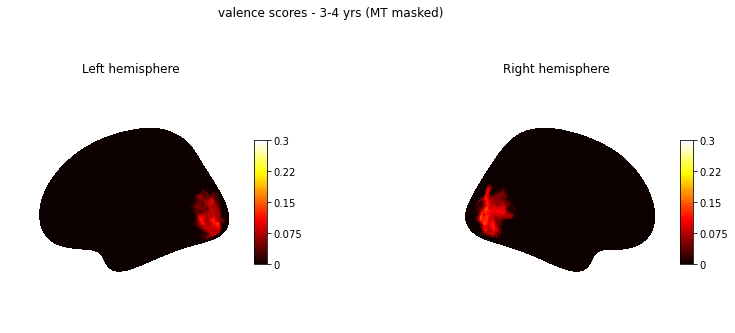

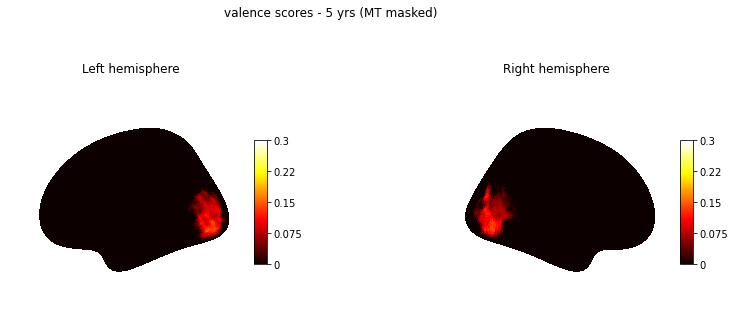

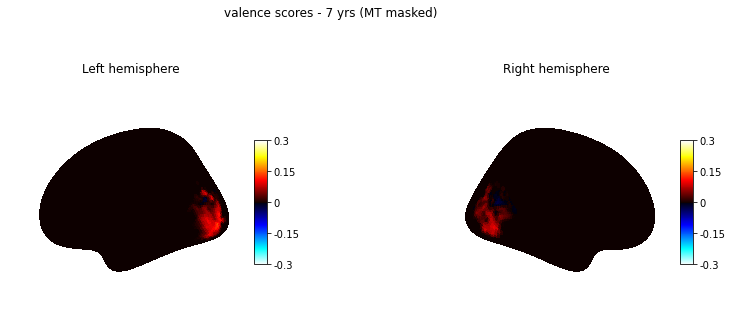

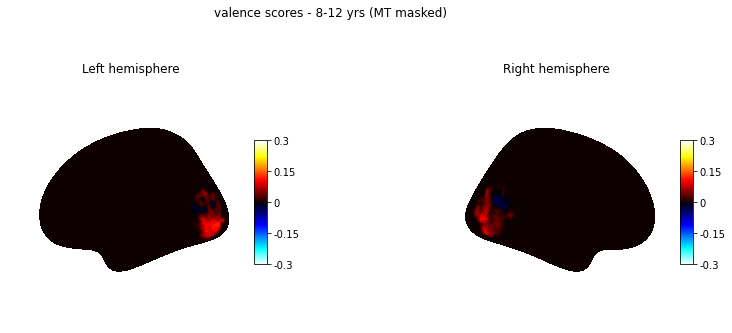

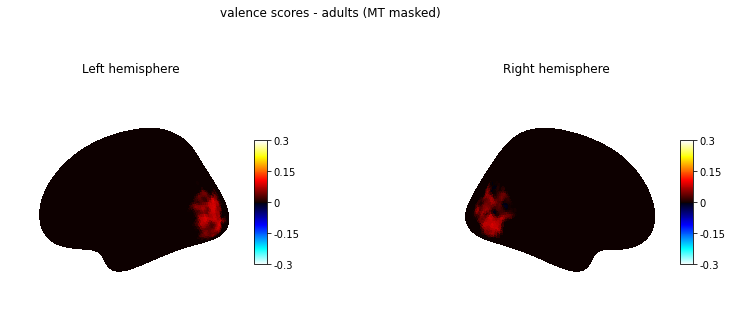

In [54]:
# mask 3-4 yrs data - MT

valence_isc_volume_34yrs = make_vol(valence_scores_34yrs_unthresholded, mask)
valence_isc_volume_34yrs_array = valence_isc_volume_34yrs.get_fdata()
MT_mask_array = np.invert(MT_mask_resampled_bool.get_fdata().astype('bool'))
valence_MT_volume_34yrs = valence_isc_volume_34yrs_array.copy()
valence_MT_volume_34yrs[MT_mask_array] = 0
valence_MT_volume_34yrs_image = nib.Nifti1Image(valence_MT_volume_34yrs, affine=valence_isc_volume_34yrs.affine, header=valence_isc_volume_34yrs.header)
plot_lateral_only_with_vmax(vol=valence_MT_volume_34yrs_image, 
                            title='valence scores - 3-4 yrs (MT masked)', 
                            vis_threshold=0, vmax=0.3)

print(valence_isc_volume_34yrs_array[np.invert(MT_mask_array)].mean())



# mask 5 yrs data - MT

valence_isc_volume_5yrs = make_vol(valence_scores_5yrs_unthresholded, mask)
valence_isc_volume_5yrs_array = valence_isc_volume_5yrs.get_fdata()
MT_mask_array = np.invert(MT_mask_resampled_bool.get_fdata().astype('bool'))
valence_MT_volume_5yrs = valence_isc_volume_5yrs_array.copy()
valence_MT_volume_5yrs[MT_mask_array] = 0
valence_MT_volume_5yrs_image = nib.Nifti1Image(valence_MT_volume_5yrs, affine=valence_isc_volume_5yrs.affine, header=valence_isc_volume_5yrs.header)
plot_lateral_only_with_vmax(vol=valence_MT_volume_5yrs_image, 
                            title='valence scores - 5 yrs (MT masked)', 
                            vis_threshold=0, vmax=0.3)

print(valence_isc_volume_5yrs_array[np.invert(MT_mask_array)].mean())

# mask 7 yrs data - MT

valence_isc_volume_7yrs = make_vol(valence_scores_7yrs_unthresholded, mask)
valence_isc_volume_7yrs_array = valence_isc_volume_7yrs.get_fdata()
MT_mask_array = np.invert(MT_mask_resampled_bool.get_fdata().astype('bool'))
valence_MT_volume_7yrs = valence_isc_volume_7yrs_array.copy()
valence_MT_volume_7yrs[MT_mask_array] = 0
valence_MT_volume_7yrs_image = nib.Nifti1Image(valence_MT_volume_7yrs, affine=valence_isc_volume_7yrs.affine, header=valence_isc_volume_7yrs.header)
plot_lateral_only_with_vmax(vol=valence_MT_volume_7yrs_image, 
                            title='valence scores - 7 yrs (MT masked)', 
                            vis_threshold=0, vmax=0.3)

print(valence_isc_volume_7yrs_array[np.invert(MT_mask_array)].mean())

# mask 8-12 yrs data - MT

valence_isc_volume_812yrs = make_vol(valence_scores_812yrs_unthresholded, mask)
valence_isc_volume_812yrs_array = valence_isc_volume_812yrs.get_fdata()
MT_mask_array = np.invert(MT_mask_resampled_bool.get_fdata().astype('bool'))
valence_MT_volume_812yrs = valence_isc_volume_812yrs_array.copy()
valence_MT_volume_812yrs[MT_mask_array] = 0
valence_MT_volume_812yrs_image = nib.Nifti1Image(valence_MT_volume_812yrs, affine=valence_isc_volume_812yrs.affine, header=valence_isc_volume_812yrs.header)
plot_lateral_only_with_vmax(vol=valence_MT_volume_812yrs_image, 
                            title='valence scores - 8-12 yrs (MT masked)', 
                            vis_threshold=0, vmax=0.3)

print(valence_isc_volume_812yrs_array[np.invert(MT_mask_array)].mean())

#mask adult data - MT
valence_isc_volume_adult = make_vol(valence_scores_adults_unthresholded, mask)
valence_isc_volume_adult_array = valence_isc_volume_adult.get_fdata()
MT_mask_array = np.invert(MT_mask_resampled_bool.get_fdata().astype('bool'))
valence_MT_volume_adult = valence_isc_volume_adult_array.copy()
valence_MT_volume_adult[MT_mask_array] = 0
valence_MT_volume_adult_image = nib.Nifti1Image(valence_MT_volume_adult, affine=valence_isc_volume_adult.affine, header=valence_isc_volume_adult.header)
plot_lateral_only_with_vmax(vol=valence_MT_volume_adult_image, 
                            title='valence scores - adults (MT masked)', 
                            vis_threshold=0, vmax=0.3)

print(valence_isc_volume_adult_array[np.invert(MT_mask_array)].mean())

#maybe not maturing but just different?

In [55]:
#load individual subject score

subj_valence_scores_34yrs_unthresholded = np.load(os.path.join(
    directory, '3-4-yrs', 'encoding_results','unthresholded_whole', '3-4-yrs_valence_only_scores_adult_isc_mask.npy')).T
print(subj_valence_scores_34yrs_unthresholded.shape)
n_34yrs = subj_valence_scores_34yrs_unthresholded.shape[-1]

subj_valence_scores_5yrs_unthresholded = np.load(os.path.join(
    directory, '5-yrs', 'encoding_results','unthresholded', '5-yrs_valence_only_scores_adult_isc_mask.npy')).T
print(subj_valence_scores_5yrs_unthresholded.shape)
n_5yrs = subj_valence_scores_5yrs_unthresholded.shape[-1]

subj_valence_scores_7yrs_unthresholded = np.load(os.path.join(
    directory, '7-yrs', 'encoding_results','unthresholded', '7-yrs_valence_only_scores_adult_isc_mask.npy')).T
print(subj_valence_scores_7yrs_unthresholded.shape)
n_7yrs = subj_valence_scores_7yrs_unthresholded.shape[-1]

subj_valence_scores_812yrs_unthresholded = np.load(os.path.join(
    directory, '8-12-yrs', 'encoding_results','unthresholded', '8-12-yrs_valence_only_scores_adult_isc_mask.npy')).T
print(subj_valence_scores_812yrs_unthresholded.shape)
n_812yrs = subj_valence_scores_812yrs_unthresholded.shape[-1]

subj_valence_scores_adults_unthresholded = np.load(os.path.join(
    directory, 'adults', 'encoding_results','unthresholded', 'adults_valence_only_scores_adult_isc_mask.npy')).T
print(subj_valence_scores_adults_unthresholded.shape)
n_adults = subj_valence_scores_adults_unthresholded.shape[-1]

(136543, 31)
(136543, 34)
(136543, 23)
(136543, 34)
(136543, 33)


In [56]:
### get the encoding performance correlation score for STS

sts_mask_array = STS_mask_resampled.get_fdata().astype('bool') #un-invert it bc not mapping it to brain surface

mask_volume = mask.get_fdata() > 0
print(mask_volume.shape)
print(mask_volume.size) #shape of the brain
print(mask_volume.sum())

### adults
print(subj_valence_scores_adults_unthresholded.shape)
volume_adult = np.zeros(mask_volume.shape + (n_adults,))
volume_adult[mask_volume, :] = subj_valence_scores_adults_unthresholded # change subj data to shape of the brain
sts_adult_valence_score = volume_adult[sts_mask_array, :].mean(axis=0)
print(sts_adult_valence_score.mean())

(79, 95, 68)
510340
136543
(136543, 33)
0.0442165277437738


In [57]:
### 3-4-yrs
print(subj_valence_scores_34yrs_unthresholded.shape)
volume_34yrs = np.zeros(mask_volume.shape + (n_34yrs,))
volume_34yrs[mask_volume, :] = subj_valence_scores_34yrs_unthresholded # change subj data to shape of the brain
sts_34yrs_valence_score = volume_34yrs[sts_mask_array, :].mean(axis=0)
print(sts_34yrs_valence_score.mean())

null_distribution = generate_null_difference_permute_groups(sts_adult_valence_score, mt_812yrs_SI_score, 5000)
print(np.shape(null_distribution)) #returns array of differences of a mean of randomly split (5000 times) groups
observed_difference = np.mean(sts_adult_valence_score) - np.mean(mt_812yrs_SI_score)
print(observed_difference)

# Compute the p-value
p_value = np.sum(np.abs(null_distribution) >= np.abs(observed_difference)) / 5000 #two-tailed p-val test

# Check significance
if p_value < 0.05:
    print("The difference between groups is statistically significant!")
else:
    print("The difference between groups is not statistically significant.")

print(p_value)

(136543, 31)
0.06345673721879418
(5000,)
-0.038322424014022194
The difference between groups is statistically significant!
0.0032


In [58]:
### 5-yrs
print(subj_valence_scores_5yrs_unthresholded.shape)
volume_5yrs = np.zeros(mask_volume.shape + (n_5yrs,))
volume_5yrs[mask_volume, :] = subj_valence_scores_5yrs_unthresholded # change subj data to shape of the brain
sts_5yrs_valence_score = volume_5yrs[sts_mask_array, :].mean(axis=0)
print(sts_5yrs_valence_score.mean())

null_distribution = generate_null_difference_permute_groups(sts_adult_valence_score, mt_812yrs_SI_score, 5000)
print(np.shape(null_distribution)) #returns array of differences of a mean of randomly split (5000 times) groups
observed_difference = np.mean(sts_adult_valence_score) - np.mean(mt_812yrs_SI_score)
print(observed_difference)

# Compute the p-value
p_value = np.sum(np.abs(null_distribution) >= np.abs(observed_difference)) / 5000 #two-tailed p-val test

# Check significance
if p_value < 0.05:
    print("The difference between groups is statistically significant!")
else:
    print("The difference between groups is not statistically significant.")

print(p_value)

(136543, 34)
0.06984031875935799
(5000,)
-0.038322424014022194
The difference between groups is statistically significant!
0.0042


In [59]:
### 7-yrs
print(subj_valence_scores_7yrs_unthresholded.shape)
volume_7yrs = np.zeros(mask_volume.shape + (n_7yrs,))
volume_7yrs[mask_volume, :] = subj_valence_scores_7yrs_unthresholded # change subj data to shape of the brain
sts_7yrs_valence_score = volume_7yrs[sts_mask_array, :].mean(axis=0)
print(sts_7yrs_valence_score.mean())

null_distribution = generate_null_difference_permute_groups(sts_adult_valence_score, mt_812yrs_SI_score, 5000)
print(np.shape(null_distribution)) #returns array of differences of a mean of randomly split (5000 times) groups
observed_difference = np.mean(sts_adult_valence_score) - np.mean(mt_812yrs_SI_score)
print(observed_difference)

# Compute the p-value
p_value = np.sum(np.abs(null_distribution) >= np.abs(observed_difference)) / 5000 #two-tailed p-val test

# Check significance
if p_value < 0.05:
    print("The difference between groups is statistically significant!")
else:
    print("The difference between groups is not statistically significant.")

print(p_value)

(136543, 23)
0.05522488432986454
(5000,)
-0.038322424014022194
The difference between groups is statistically significant!
0.0026


In [60]:
### 8-12-yrs
print(subj_valence_scores_812yrs_unthresholded.shape)
volume_812yrs = np.zeros(mask_volume.shape + (n_812yrs,))
volume_812yrs[mask_volume, :] = subj_valence_scores_812yrs_unthresholded # change subj data to shape of the brain
sts_812yrs_valence_score = volume_812yrs[sts_mask_array, :].mean(axis=0)
print(sts_812yrs_valence_score.mean())

null_distribution = generate_null_difference_permute_groups(sts_adult_valence_score, mt_812yrs_SI_score, 5000)
print(np.shape(null_distribution)) #returns array of differences of a mean of randomly split (5000 times) groups
observed_difference = np.mean(sts_adult_valence_score) - np.mean(mt_812yrs_SI_score)
print(observed_difference)

# Compute the p-value
p_value = np.sum(np.abs(null_distribution) >= np.abs(observed_difference)) / 5000 #two-tailed p-val test

# Check significance
if p_value < 0.05:
    print("The difference between groups is statistically significant!")
else:
    print("The difference between groups is not statistically significant.")

print(p_value)

(136543, 34)
0.05779387508341518
(5000,)
-0.038322424014022194
The difference between groups is statistically significant!
0.004


In [61]:
### get the encoding performance correlation score - MT

mt_mask_array = MT_mask_resampled_bool.get_fdata().astype('bool') #un-invert it bc not mapping it to brain surface

mask_volume = mask.get_fdata() > 0
print(mask_volume.shape)
print(mask_volume.size) #shape of the brain
print(mask_volume.sum())

### 3-4-yrs
print(subj_valence_scores_34yrs_unthresholded.shape)
volume_34yrs = np.zeros(mask_volume.shape + (n_34yrs,))
volume_34yrs[mask_volume, :] = subj_valence_scores_34yrs_unthresholded # change subj data to shape of the brain
mt_34yrs_valence_score = volume_34yrs[mt_mask_array, :].mean(axis=0)
print('MT 3-4 yrs valence:', mt_34yrs_valence_score.mean())

### 5-yrs
print(subj_valence_scores_5yrs_unthresholded.shape)
volume_5yrs = np.zeros(mask_volume.shape + (n_5yrs,))
volume_5yrs[mask_volume, :] = subj_valence_scores_5yrs_unthresholded # change subj data to shape of the brain
mt_5yrs_valence_score = volume_5yrs[mt_mask_array, :].mean(axis=0)
print('MT 5 yrs valence:', mt_5yrs_valence_score.mean())

### 7-yrs
print(subj_valence_scores_7yrs_unthresholded.shape)
volume_7yrs = np.zeros(mask_volume.shape + (n_7yrs,))
volume_7yrs[mask_volume, :] = subj_valence_scores_7yrs_unthresholded # change subj data to shape of the brain
mt_7yrs_valence_score = volume_7yrs[mt_mask_array, :].mean(axis=0)
print('MT 7 yrs valence:', mt_7yrs_valence_score.mean())

### 8-12-yrs
print(subj_valence_scores_812yrs_unthresholded.shape)
volume_812yrs = np.zeros(mask_volume.shape + (n_812yrs,))
volume_812yrs[mask_volume, :] = subj_valence_scores_812yrs_unthresholded # change subj data to shape of the brain
mt_812yrs_valence_score = volume_812yrs[mt_mask_array, :].mean(axis=0)
print('MT 8-12 yrs valence:', mt_812yrs_valence_score.mean())

### adults
print(subj_valence_scores_adults_unthresholded.shape)
volume_adult = np.zeros(mask_volume.shape + (n_adults,))
volume_adult[mask_volume, :] = subj_valence_scores_adults_unthresholded # change subj data to shape of the brain
mt_adult_valence_score = volume_adult[mt_mask_array, :].mean(axis=0)
print('MT adults valence:', mt_adult_valence_score.mean())

(79, 95, 68)
510340
136543
(136543, 31)
MT 3-4 yrs valence: 0.08406597908112096
(136543, 34)
MT 5 yrs valence: 0.08724791157239932
(136543, 23)
MT 7 yrs valence: 0.05266562076866495
(136543, 34)
MT 8-12 yrs valence: 0.05098753636099863
(136543, 33)
MT adults valence: 0.05694368436073668


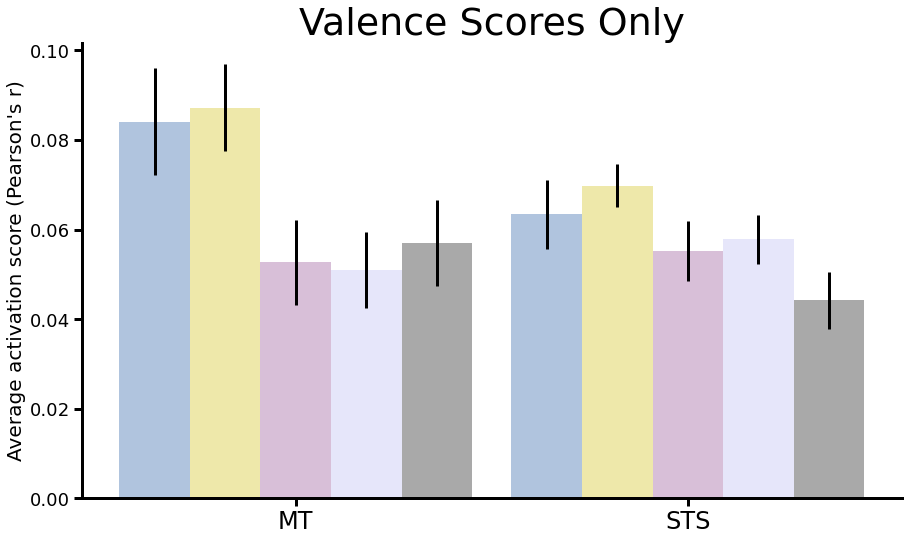

In [62]:
### mean activation for each subject in STS for valence model

# Calculate the average of the array of individual subj average 
valence_STS_34yrs_mean = sts_34yrs_valence_score.mean()
valence_STS_5yrs_mean = sts_5yrs_valence_score.mean()
valence_STS_7yrs_mean = sts_7yrs_valence_score.mean()
valence_STS_812yrs_mean = sts_812yrs_valence_score.mean()
valence_STS_adults_mean = sts_adult_valence_score.mean()

#STD
valence_STS_34yrs_std = np.std(sts_34yrs_valence_score)
valence_STS_5yrs_std= np.std(sts_5yrs_valence_score)
valence_STS_7yrs_std= np.std(sts_7yrs_valence_score)
valence_STS_812yrs_std= np.std(sts_812yrs_valence_score)
valence_STS_adults_std = np.std(sts_adult_valence_score)

valence_STS_34yrs_err = np.std(sts_34yrs_valence_score)/np.sqrt(len(sts_34yrs_valence_score))
valence_STS_5yrs_err= np.std(sts_5yrs_valence_score)/np.sqrt(len(sts_5yrs_valence_score))
valence_STS_7yrs_err= np.std(sts_7yrs_valence_score)/np.sqrt(len(sts_7yrs_valence_score))
valence_STS_812yrs_err= np.std(sts_812yrs_valence_score)/np.sqrt(len(sts_812yrs_valence_score))
valence_STS_adults_err = np.std(sts_adult_valence_score)/np.sqrt(len(sts_adult_valence_score))

### mean activation for each subject in MT for valence model

# Calculate the average of the array of individual subj average 
valence_MT_34yrs_mean = mt_34yrs_valence_score.mean()
#print(valence_MT_34yrs_mean)
valence_MT_5yrs_mean = mt_5yrs_valence_score.mean()
valence_MT_7yrs_mean = mt_7yrs_valence_score.mean()
valence_MT_812yrs_mean = mt_812yrs_valence_score.mean()
valence_MT_adults_mean = mt_adult_valence_score.mean()

#std
valence_MT_34yrs_std = np.std(mt_34yrs_valence_score)
valence_MT_5yrs_std= np.std(mt_5yrs_valence_score)
valence_MT_7yrs_std= np.std(mt_7yrs_valence_score)
valence_MT_812yrs_std= np.std(mt_812yrs_valence_score)
valence_MT_adults_std = np.std(mt_adult_valence_score)

#err
valence_MT_34yrs_err = np.std(mt_34yrs_valence_score)/np.sqrt(len(mt_34yrs_valence_score))
valence_MT_5yrs_err= np.std(mt_5yrs_valence_score)/np.sqrt(len(mt_5yrs_valence_score))
valence_MT_7yrs_err= np.std(mt_7yrs_valence_score)/np.sqrt(len(mt_7yrs_valence_score))
valence_MT_812yrs_err= np.std(mt_812yrs_valence_score)/np.sqrt(len(mt_812yrs_valence_score))
valence_MT_adults_err = np.std(mt_adult_valence_score)/np.sqrt(len(mt_adult_valence_score))

# Define labels, povalencetions, bar heights and error bar heights
labels = ['MT','STS']
X_axis = np.arange(len(labels))


valence_34 = [valence_MT_34yrs_mean, valence_STS_34yrs_mean]
error = [valence_MT_34yrs_err, valence_STS_34yrs_err]

valence_5 = [valence_MT_5yrs_mean, valence_STS_5yrs_mean]
error2 = [valence_MT_5yrs_err, valence_STS_5yrs_err ]

valence_7 = [valence_MT_7yrs_mean, valence_STS_7yrs_mean]
error3 = [valence_MT_7yrs_err, valence_STS_7yrs_err ]

valence_812 = [valence_MT_812yrs_mean, valence_STS_812yrs_mean]
error4 = [valence_MT_812yrs_err, valence_STS_812yrs_err ]

valence_adult = [valence_MT_adults_mean, valence_STS_adults_mean]
error5 = [valence_MT_adults_err, valence_STS_adults_err]

_, ax = plt.subplots(figsize=(14.69, 8.38))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(3)
ax.spines['bottom'].set_linewidth(3)
ax.tick_params(width=3, length=8)
ax.bar(X_axis - 0.36, valence_34, 0.18, yerr=error, label = '3-4 yrs', color = 'lightsteelblue', error_kw=dict(lw=3))
ax.bar(X_axis - 0.18, valence_5, 0.18, yerr= error2, label = '5 yrs', color ='palegoldenrod', error_kw=dict(lw=3))
ax.bar(X_axis + 0.0, valence_7, 0.18, yerr= error3, label = '7 yrs', color ='thistle', error_kw=dict(lw=3))
ax.bar(X_axis + 0.18, valence_812, 0.18, yerr= error4, label = '8-12 yrs', color ='lavender', error_kw=dict(lw=3))
ax.bar(X_axis + 0.36, valence_adult, 0.18, yerr= error5, label = 'adults', color ='darkgrey', error_kw=dict(lw=3))

ax.set_xticks([0,1])
ax.set_xticklabels(labels, fontsize=24)
ax.tick_params(axis='y', which='major', labelsize=18)
ax.set_ylabel("Average activation score (Pearson's r)", fontsize=20)
ax.set_title("Valence Scores Only", fontsize=38)
#ax.set_yticks([0, 0.05, 0.10, 0.15, 0.20])
#ax.set_ylim([0, 0.2])
ax.legend([], [], frameon=False)
plt.savefig('Valence_only.pdf')
plt.show()


<h1> t-test (Valence) 

In [63]:
#t test

from scipy.stats import ttest_ind
from scipy.stats import t


##### STS #######

#3-4yr vs adults

# Two sample groups with different mean values and sample sizes
adults_STS_valence = sts_adult_valence_score
child34_STS_valence = sts_34yrs_valence_score

# Perform one-sided unpaired t-test with unequal variances assumed
tstat_34_valence_sts, pval_34_valence_sts = ttest_ind(adults_STS_valence, child34_STS_valence, equal_var=False)

# Print results
#print("t-stat for valence score 3-4 yrs vs adult in STS:", tstat_34_valence_sts)
#print("p-val for valence score 3-4 yrs vs adult in STS:", pval_34_valence_sts/2) # Divide p-value by 2 for one-sided test

if pval_34_valence_sts/2 < 0.05 and pval_34_valence_sts/2 > 0.01:
    print("p-val for valence score 3-4 yrs vs adult in STS:", "*")
elif pval_34_valence_sts/2 < 0.01 and pval_34_valence_sts/2 > 0.001:
    print ("p-val for valence score 3-4 yrs vs adult in STS:", "**")
elif pval_34_valence_sts/2 < 0.001:
    print ("p-val for valence score 3-4 yrs vs adult in STS:", "***")
elif pval_34_valence_sts/2 > 0.05:
    print ("p-val for valence score 3-4 yrs vs adult in STS", "NOT significant:", pval_34_valence_sts/2 )


#5yr vs adults

# Two sample groups with different mean values and sample sizes
adults_STS_valence = sts_adult_valence_score
child5_STS_valence = sts_5yrs_valence_score

# Perform one-sided unpaired t-test with unequal variances assumed
tstat_5_valence_sts, pval_5_valence_sts = ttest_ind(adults_STS_valence, child5_STS_valence, equal_var=False)

# Print results
#print("t-stat for valence score 5 yrs vs adult in STS:", tstat_5_valence_sts)
#print("p-val for valence score 5 yrs vs adult in STS:", pval_5_valence_sts/2) # Divide p-value by 2 for one-sided test

if pval_5_valence_sts/2 < 0.05 and pval_5_valence_sts/2 > 0.01:
    print("p-val for valence score 5 yrs vs adult in STS:", "*")
elif pval_5_valence_sts/2 < 0.01 and pval_5_valence_sts/2 > 0.001:
    print ("p-val for valence score 5 yrs vs adult in STS:", "**")
elif pval_5_valence_sts/2 < 0.001:
    print ("p-val for valence score 5 yrs vs adult in STS:", "***")
elif pval_5_valence_sts/2 > 0.05:
    print ("p-val for valence score 5 yrs vs adult in STS", "NOT significant:", pval_5_valence_sts/2 )

#7yr vs adults

# Two sample groups with different mean values and sample sizes
adults_STS_valence = sts_adult_valence_score
child7_STS_valence = sts_7yrs_valence_score

# Perform one-sided unpaired t-test with unequal variances assumed
tstat_7_valence_sts, pval_7_valence_sts = ttest_ind(adults_STS_valence, child7_STS_valence, equal_var=False)

# Print results
#print("t-stat for valence score 7 yrs vs adult in STS:", tstat_7_valence_sts)
#print("p-val for valence score 7 yrs vs adult in STS:", pval_7_valence_sts/2) # Divide p-value by 2 for one-sided test

if pval_7_valence_sts/2 < 0.05 and pval_7_valence_sts/2 > 0.01:
    print("p-val for valence score 7 yrs vs adult in STS:", "*")
elif pval_7_valence_sts/2 < 0.01 and pval_7_valence_sts/2 > 0.001:
    print ("p-val for valence score 7 yrs vs adult in STS:", "**")
elif pval_7_valence_sts/2 < 0.001:
    print ("p-val for valence score 7 yrs vs adult in STS:", "***")
elif pval_7_valence_sts/2 > 0.05:
    print ("p-val for valence score 7 yrs vs adult in STS", "NOT significant:", pval_7_valence_sts/2 )

#8-12yr vs adults

# Two sample groups with different mean values and sample sizes
adults_STS_valence = sts_adult_valence_score
child812_STS_valence = sts_812yrs_valence_score

# Perform one-sided unpaired t-test with unequal variances assumed
tstat_812_valence_sts, pval_812_valence_sts = ttest_ind(adults_STS_valence, child812_STS_valence, equal_var=False)

# Print results
#print("t-stat for valence score 8-12 yrs vs adult in STS:", tstat_812_valence_sts)
#print("p-val for valence score 8-12 yrs vs adult in STS:", pval_812_valence_sts/2) # Divide p-value by 2 for one-sided test
if pval_812_valence_sts/2 < 0.05 and pval_812_valence_sts/2 > 0.01:
    print("p-val for valence score 8-12 yrs vs adult in STS:", "*")
elif pval_812_valence_sts/2 < 0.01 and pval_812_valence_sts/2 > 0.001:
    print ("p-val for valence score 8-12 yrs vs adult in STS:", "**")
elif pval_812_valence_sts/2 < 0.001:
    print ("p-val for valence score 8-12 yrs vs adult in STS:", "***")
elif pval_812_valence_sts/2 > 0.05:
    print ("p-val for valence score 8-12 yrs vs adult in STS", "NOT significant:", pval_812_valence_sts/2 )
    
##### MT ######

#3-4yr vs adults

# Two sample groups with different mean values and sample sizes
adults_MT_valence = mt_adult_valence_score
child34_MT_valence = mt_34yrs_valence_score

# Perform one-sided unpaired t-test with unequal variances assumed
tstat_34_valence_mt, pval_34_valence_mt = ttest_ind(adults_MT_valence, child34_MT_valence, equal_var=False)

# Print results
#print("t-stat for valence score 3-4 yrs vs adult in MT:", tstat_34_valence_mt)
#print("p-val for valence score 3-4 yrs vs adult in MT:", pval_34_valence_mt/2) # Divide p-value by 2 for one-sided test
if pval_34_valence_mt/2 < 0.05 and pval_34_valence_mt/2 > 0.01:
    print("p-val for valence score 3-4 yrs vs adult in MT:", "*")
elif pval_34_valence_mt/2 < 0.01 and pval_34_valence_mt/2 > 0.001:
    print ("p-val for valence score 3-4 yrs vs adult in MT:", "**")
elif pval_34_valence_mt/2 < 0.001:
    print ("p-val for valence score 3-4 yrs vs adult in MT:", "***")
elif pval_34_valence_mt/2 > 0.05:
    print ("p-val for valence score 3-4 yrs vs adult in MT", "NOT significant:", pval_34_valence_mt/2 )

    
#5yr vs adults

# Two sample groups with different mean values and sample sizes
adults_MT_valence = mt_adult_valence_score
child5_MT_valence = mt_5yrs_valence_score

# Perform one-sided unpaired t-test with unequal variances assumed
tstat_5_valence_mt, pval_5_valence_mt = ttest_ind(adults_MT_valence, child5_MT_valence, equal_var=False)

# Print results
#print("t-stat for valence score 5 yrs vs adult in MT:", tstat_5_valence_mt)
#print("p-val for valence score 5 yrs vs adult in MT:", pval_5_valence_mt/2) # Divide p-value by 2 for one-sided test
if pval_5_valence_mt/2 < 0.05 and pval_5_valence_mt/2 > 0.01:
    print("p-val for valence score 5 yrs vs adult in MT:", "*")
elif pval_5_valence_mt/2 < 0.01 and pval_5_valence_mt/2 > 0.001:
    print ("p-val for valence score 5 yrs vs adult in MT:", "**")
elif pval_5_valence_mt/2 < 0.001:
    print ("p-val for valence score 5 yrs vs adult in MT:", "***")
elif pval_5_valence_mt/2 > 0.05:
    print ("p-val for valence score 5 yrs vs adult in MT", "NOT significant:", pval_5_valence_mt/2 )



#7yr vs adults

# Two sample groups with different mean values and sample sizes
adults_MT_valence = mt_adult_valence_score
child7_MT_valence = mt_7yrs_valence_score

# Perform one-sided unpaired t-test with unequal variances assumed
tstat_7_valence_mt, pval_7_valence_mt = ttest_ind(adults_MT_valence, child7_MT_valence, equal_var=False)

# Print results
#print("t-stat for valence score 7 yrs vs adult in MT:", tstat_7_valence_mt)
#print("p-val for valence score 7 yrs vs adult in MT:", pval_7_valence_mt/2) # Divide p-value by 2 for one-sided test
if pval_7_valence_mt/2 < 0.05 and pval_7_valence_mt/2 > 0.01:
    print("p-val for valence score 7 yrs vs adult in MT:", "*")
elif pval_7_valence_mt/2 < 0.01 and pval_7_valence_mt/2 > 0.001:
    print ("p-val for valence score 7 yrs vs adult in MT:", "**")
elif pval_7_valence_mt/2 < 0.001:
    print ("p-val for valence score 7 yrs vs adult in MT:", "***")
elif pval_7_valence_mt/2 > 0.05:
    print ("p-val for valence score 7 yrs vs adult in MT", "NOT significant:",pval_7_valence_mt/2 )
    
    
#8-12 yr vs adults

# Two sample groups with different mean values and sample sizes
adults_MT_valence = mt_adult_valence_score
child812_MT_valence = mt_812yrs_valence_score

# Perform one-sided unpaired t-test with unequal variances assumed
tstat_812_valence_mt, pval_812_valence_mt = ttest_ind(adults_MT_valence, child812_MT_valence, equal_var=False)

# Print results
#print("t-stat for valence score 8-12 yrs vs adult in MT:", tstat_812_valence_mt)
#print("p-val for valence score 8-12 yrs vs adult in MT:", pval_812_valence_mt/2) # Divide p-value by 2 for one-sided test
if pval_812_valence_mt/2 < 0.05 and pval_812_valence_mt/2 > 0.01:
    print("p-val for valence score 8-12 yrs vs adult in MT:", "*")
elif pval_812_valence_mt/2 < 0.01 and pval_812_valence_mt/2 > 0.001:
    print ("p-val for valence score 8-12 yrs vs adult in MT:", "**")
elif pval_812_valence_mt/2 < 0.001:
    print ("p-val for valence score 8-12 yrs vs adult in MT:", "***")
elif pval_812_valence_mt/2 > 0.05:
    print ("p-val for valence score 8-12 yrs vs adult in MT", "NOT significant:",pval_812_valence_mt/2 )

p-val for valence score 3-4 yrs vs adult in STS: *
p-val for valence score 5 yrs vs adult in STS: **
p-val for valence score 7 yrs vs adult in STS NOT significant: 0.12517637469459605
p-val for valence score 8-12 yrs vs adult in STS NOT significant: 0.05800691184715894
p-val for valence score 3-4 yrs vs adult in MT: *
p-val for valence score 5 yrs vs adult in MT: *
p-val for valence score 7 yrs vs adult in MT NOT significant: 0.3788643473214137
p-val for valence score 8-12 yrs vs adult in MT NOT significant: 0.3250971252596423


<h1>Arousal</h1>

In [64]:
#Load social model scores data

arousal_scores_34yrs_unthresholded = np.mean(np.load(os.path.join(
    directory, '3-4-yrs', 'encoding_results', 'unthresholded_whole', '3-4-yrs_arousal_only_scores_adult_isc_mask.npy')), axis=0)

arousal_scores_5yrs_unthresholded = np.mean(np.load(os.path.join(
    directory, '5-yrs','encoding_results', 'unthresholded', '5-yrs_arousal_only_scores_adult_isc_mask.npy')), axis=0)

arousal_scores_7yrs_unthresholded = np.mean(np.load(os.path.join(
    directory, '7-yrs','encoding_results', 'unthresholded', '7-yrs_arousal_only_scores_adult_isc_mask.npy')), axis=0)

arousal_scores_812yrs_unthresholded = np.mean(np.load(os.path.join(
    directory, '8-12-yrs','encoding_results', 'unthresholded', '8-12-yrs_arousal_only_scores_adult_isc_mask.npy')), axis=0)

arousal_scores_adults_unthresholded = np.mean(np.load(os.path.join(
    directory, 'adults', 'encoding_results','unthresholded', 'adults_arousal_only_scores_adult_isc_mask.npy')), axis=0)

0.012086360982164026
0.004864094990778353
0.006805785028799445
0.0193226248874007
0.0304026422564086


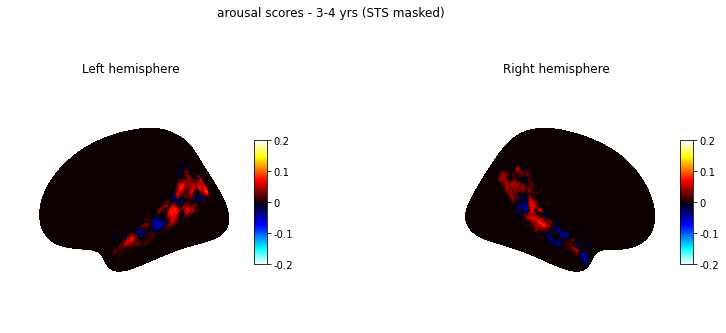

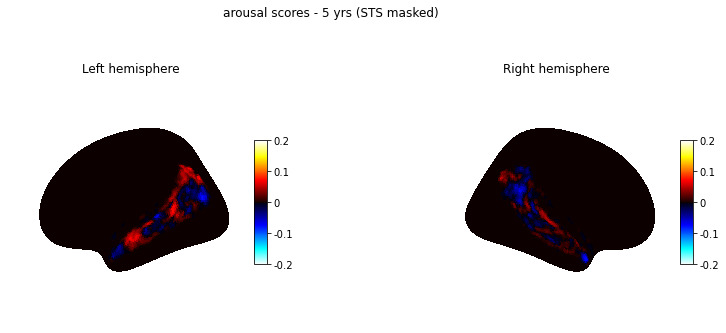

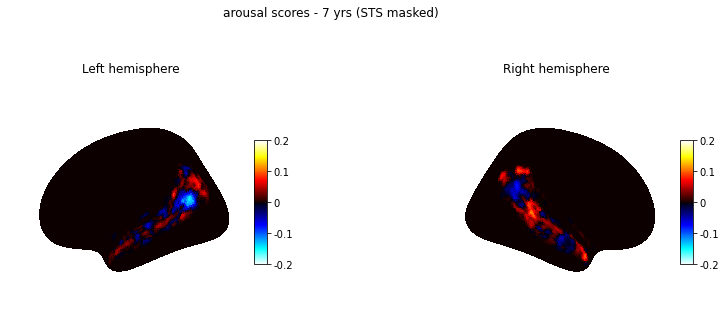

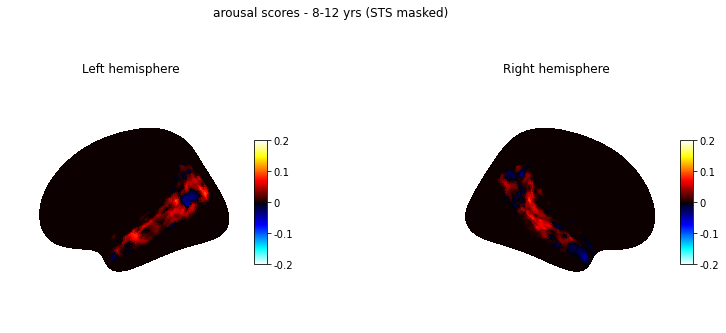

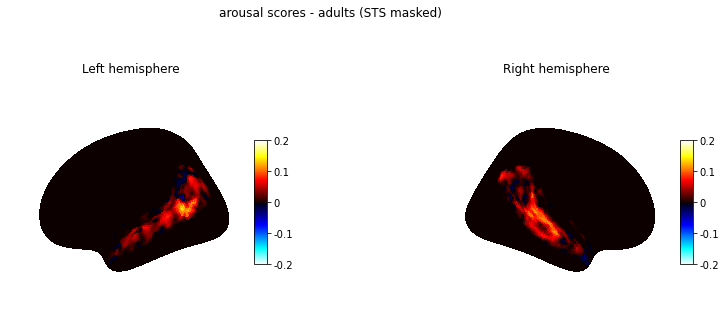

In [65]:
# mask 3-4 yrs data - STS
sts_mask_array = np.invert(STS_mask_resampled.get_fdata().astype('bool'))
arousal_isc_volume_34yrs = make_vol(arousal_scores_34yrs_unthresholded, mask)
arousal_isc_volume_34yrs_array = arousal_isc_volume_34yrs.get_fdata()
arousal_sts_volume_34yrs = arousal_isc_volume_34yrs_array.copy()
arousal_sts_volume_34yrs[sts_mask_array] = 0
arousal_sts_volume_34yrs_image = nib.Nifti1Image(arousal_sts_volume_34yrs, affine=arousal_isc_volume_34yrs.affine, header=arousal_isc_volume_34yrs.header)
plot_lateral_only_with_vmax(vol=arousal_sts_volume_34yrs_image, 
                            title='arousal scores - 3-4 yrs (STS masked)', 
                            vis_threshold=0, vmax=0.2)

print(arousal_isc_volume_34yrs_array[np.invert(sts_mask_array)].mean())



# mask 5 yrs data - STS
sts_mask_array = np.invert(STS_mask_resampled.get_fdata().astype('bool'))
arousal_isc_volume_5yrs = make_vol(arousal_scores_5yrs_unthresholded, mask)
arousal_isc_volume_5yrs_array = arousal_isc_volume_5yrs.get_fdata()
arousal_sts_volume_5yrs = arousal_isc_volume_5yrs_array.copy()
arousal_sts_volume_5yrs[sts_mask_array] = 0
arousal_sts_volume_5yrs_image = nib.Nifti1Image(arousal_sts_volume_5yrs, affine=arousal_isc_volume_5yrs.affine, header=arousal_isc_volume_5yrs.header)
plot_lateral_only_with_vmax(vol=arousal_sts_volume_5yrs_image, 
                            title='arousal scores - 5 yrs (STS masked)', 
                            vis_threshold=0, vmax=0.2)

print(arousal_isc_volume_5yrs_array[np.invert(sts_mask_array)].mean())

# mask 7 yrs data - STS
sts_mask_array = np.invert(STS_mask_resampled.get_fdata().astype('bool'))
arousal_isc_volume_7yrs = make_vol(arousal_scores_7yrs_unthresholded, mask)
arousal_isc_volume_7yrs_array = arousal_isc_volume_7yrs.get_fdata()
arousal_sts_volume_7yrs = arousal_isc_volume_7yrs_array.copy()
arousal_sts_volume_7yrs[sts_mask_array] = 0
arousal_sts_volume_7yrs_image = nib.Nifti1Image(arousal_sts_volume_7yrs, affine=arousal_isc_volume_7yrs.affine, header=arousal_isc_volume_7yrs.header)
plot_lateral_only_with_vmax(vol=arousal_sts_volume_7yrs_image, 
                            title='arousal scores - 7 yrs (STS masked)', 
                            vis_threshold=0, vmax=0.2)

print(arousal_isc_volume_7yrs_array[np.invert(sts_mask_array)].mean())


# mask 8-12 yrs data - STS
sts_mask_array = np.invert(STS_mask_resampled.get_fdata().astype('bool'))
arousal_isc_volume_812yrs = make_vol(arousal_scores_812yrs_unthresholded, mask)
arousal_isc_volume_812yrs_array = arousal_isc_volume_812yrs.get_fdata()
arousal_sts_volume_812yrs = arousal_isc_volume_812yrs_array.copy()
arousal_sts_volume_812yrs[sts_mask_array] = 0
arousal_sts_volume_812yrs_image = nib.Nifti1Image(arousal_sts_volume_812yrs, affine=arousal_isc_volume_812yrs.affine, header=arousal_isc_volume_812yrs.header)
plot_lateral_only_with_vmax(vol=arousal_sts_volume_812yrs_image, 
                            title='arousal scores - 8-12 yrs (STS masked)', 
                            vis_threshold=0, vmax=0.2)

print(arousal_isc_volume_812yrs_array[np.invert(sts_mask_array)].mean())


#mask adult data - STS
sts_mask_array = np.invert(STS_mask_resampled.get_fdata().astype('bool'))

arousal_isc_volume_adult = make_vol(arousal_scores_adults_unthresholded, mask)
arousal_isc_volume_adult_array = arousal_isc_volume_adult.get_fdata()
arousal_sts_volume_adult = arousal_isc_volume_adult_array.copy()
arousal_sts_volume_adult[sts_mask_array] = 0
arousal_sts_volume_adult_image = nib.Nifti1Image(arousal_sts_volume_adult, affine=arousal_isc_volume_adult.affine, header=arousal_isc_volume_adult.header)
plot_lateral_only_with_vmax(vol=arousal_sts_volume_adult_image, 
                            title='arousal scores - adults (STS masked)', 
                            vis_threshold=0, vmax=0.2)

print(arousal_isc_volume_adult_array[np.invert(sts_mask_array)].mean())

0.005726824631636395
-0.0072894338149308005
0.013436560138138908
0.02528982823144072
0.050691675209294115


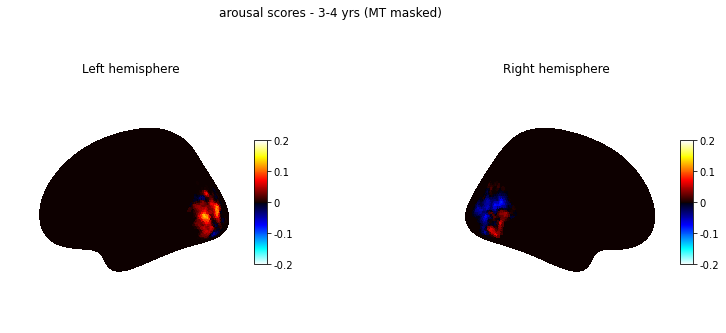

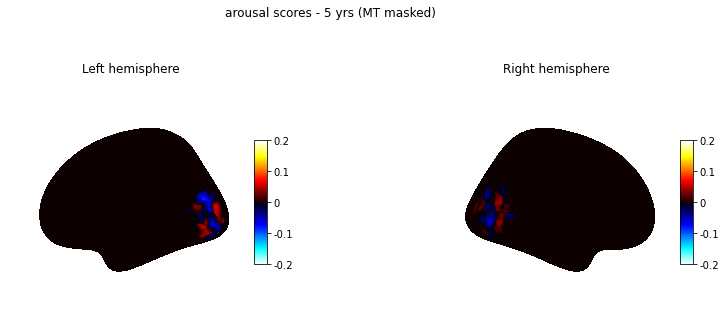

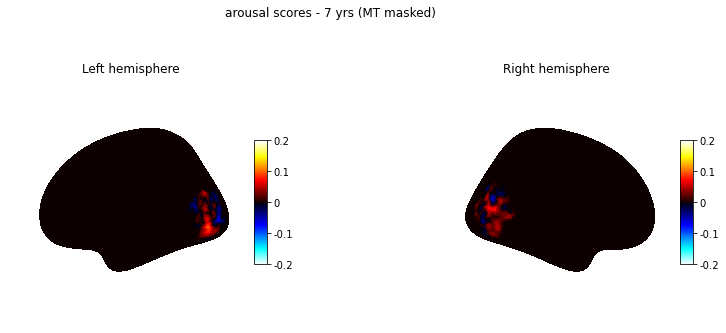

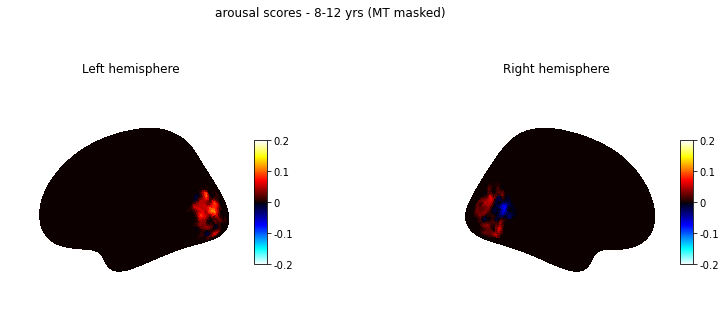

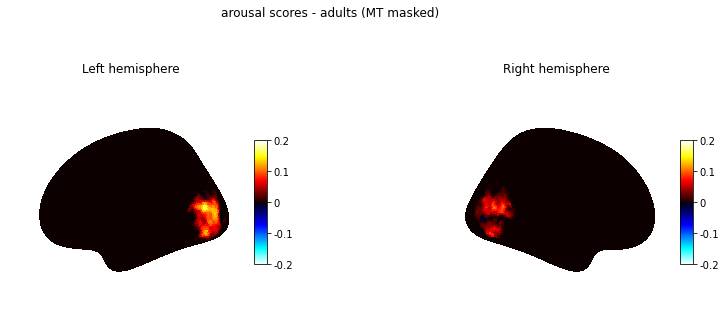

In [66]:
# mask 3-4 yrs data - MT

arousal_isc_volume_34yrs = make_vol(arousal_scores_34yrs_unthresholded, mask)
arousal_isc_volume_34yrs_array = arousal_isc_volume_34yrs.get_fdata()
MT_mask_array = np.invert(MT_mask_resampled_bool.get_fdata().astype('bool'))
arousal_MT_volume_34yrs = arousal_isc_volume_34yrs_array.copy()
arousal_MT_volume_34yrs[MT_mask_array] = 0
arousal_MT_volume_34yrs_image = nib.Nifti1Image(arousal_MT_volume_34yrs, affine=arousal_isc_volume_34yrs.affine, header=arousal_isc_volume_34yrs.header)
plot_lateral_only_with_vmax(vol=arousal_MT_volume_34yrs_image, 
                            title='arousal scores - 3-4 yrs (MT masked)', 
                            vis_threshold=0, vmax=0.2)

print(arousal_isc_volume_34yrs_array[np.invert(MT_mask_array)].mean())



# mask 5 yrs data - MT

arousal_isc_volume_5yrs = make_vol(arousal_scores_5yrs_unthresholded, mask)
arousal_isc_volume_5yrs_array = arousal_isc_volume_5yrs.get_fdata()
MT_mask_array = np.invert(MT_mask_resampled_bool.get_fdata().astype('bool'))
arousal_MT_volume_5yrs = arousal_isc_volume_5yrs_array.copy()
arousal_MT_volume_5yrs[MT_mask_array] = 0
arousal_MT_volume_5yrs_image = nib.Nifti1Image(arousal_MT_volume_5yrs, affine=arousal_isc_volume_5yrs.affine, header=arousal_isc_volume_5yrs.header)
plot_lateral_only_with_vmax(vol=arousal_MT_volume_5yrs_image, 
                            title='arousal scores - 5 yrs (MT masked)', 
                            vis_threshold=0, vmax=0.2)

print(arousal_isc_volume_5yrs_array[np.invert(MT_mask_array)].mean())

# mask 7 yrs data - MT

arousal_isc_volume_7yrs = make_vol(arousal_scores_7yrs_unthresholded, mask)
arousal_isc_volume_7yrs_array = arousal_isc_volume_7yrs.get_fdata()
MT_mask_array = np.invert(MT_mask_resampled_bool.get_fdata().astype('bool'))
arousal_MT_volume_7yrs = arousal_isc_volume_7yrs_array.copy()
arousal_MT_volume_7yrs[MT_mask_array] = 0
arousal_MT_volume_7yrs_image = nib.Nifti1Image(arousal_MT_volume_7yrs, affine=arousal_isc_volume_7yrs.affine, header=arousal_isc_volume_7yrs.header)
plot_lateral_only_with_vmax(vol=arousal_MT_volume_7yrs_image, 
                            title='arousal scores - 7 yrs (MT masked)', 
                            vis_threshold=0, vmax=0.2)

print(arousal_isc_volume_7yrs_array[np.invert(MT_mask_array)].mean())

# mask 8-12 yrs data - MT

arousal_isc_volume_812yrs = make_vol(arousal_scores_812yrs_unthresholded, mask)
arousal_isc_volume_812yrs_array = arousal_isc_volume_812yrs.get_fdata()
MT_mask_array = np.invert(MT_mask_resampled_bool.get_fdata().astype('bool'))
arousal_MT_volume_812yrs = arousal_isc_volume_812yrs_array.copy()
arousal_MT_volume_812yrs[MT_mask_array] = 0
arousal_MT_volume_812yrs_image = nib.Nifti1Image(arousal_MT_volume_812yrs, affine=arousal_isc_volume_812yrs.affine, header=arousal_isc_volume_812yrs.header)
plot_lateral_only_with_vmax(vol=arousal_MT_volume_812yrs_image, 
                            title='arousal scores - 8-12 yrs (MT masked)', 
                            vis_threshold=0, vmax=0.2)

print(arousal_isc_volume_812yrs_array[np.invert(MT_mask_array)].mean())

#mask adult data - MT
arousal_isc_volume_adult = make_vol(arousal_scores_adults_unthresholded, mask)
arousal_isc_volume_adult_array = arousal_isc_volume_adult.get_fdata()
MT_mask_array = np.invert(MT_mask_resampled_bool.get_fdata().astype('bool'))
arousal_MT_volume_adult = arousal_isc_volume_adult_array.copy()
arousal_MT_volume_adult[MT_mask_array] = 0
arousal_MT_volume_adult_image = nib.Nifti1Image(arousal_MT_volume_adult, affine=arousal_isc_volume_adult.affine, header=arousal_isc_volume_adult.header)
plot_lateral_only_with_vmax(vol=arousal_MT_volume_adult_image, 
                            title='arousal scores - adults (MT masked)', 
                            vis_threshold=0, vmax=0.2)

print(arousal_isc_volume_adult_array[np.invert(MT_mask_array)].mean())

In [67]:
#load individual subject score

subj_arousal_scores_34yrs_unthresholded = np.load(os.path.join(
    directory, '3-4-yrs', 'encoding_results','unthresholded_whole', '3-4-yrs_arousal_only_scores_adult_isc_mask.npy')).T
print(subj_arousal_scores_34yrs_unthresholded.shape)
n_34yrs = subj_arousal_scores_34yrs_unthresholded.shape[-1]

subj_arousal_scores_5yrs_unthresholded = np.load(os.path.join(
    directory, '5-yrs', 'encoding_results','unthresholded', '5-yrs_arousal_only_scores_adult_isc_mask.npy')).T
print(subj_arousal_scores_5yrs_unthresholded.shape)
n_5yrs = subj_arousal_scores_5yrs_unthresholded.shape[-1]

subj_arousal_scores_7yrs_unthresholded = np.load(os.path.join(
    directory, '7-yrs', 'encoding_results','unthresholded', '7-yrs_arousal_only_scores_adult_isc_mask.npy')).T
print(subj_arousal_scores_5yrs_unthresholded.shape)
n_7yrs = subj_arousal_scores_7yrs_unthresholded.shape[-1]

subj_arousal_scores_812yrs_unthresholded = np.load(os.path.join(
    directory, '8-12-yrs', 'encoding_results','unthresholded', '8-12-yrs_arousal_only_scores_adult_isc_mask.npy')).T
print(subj_arousal_scores_5yrs_unthresholded.shape)
n_812yrs = subj_arousal_scores_812yrs_unthresholded.shape[-1]

subj_arousal_scores_adults_unthresholded = np.load(os.path.join(
    directory, 'adults', 'encoding_results','unthresholded', 'adults_arousal_only_scores_adult_isc_mask.npy')).T
print(subj_arousal_scores_adults_unthresholded.shape)
n_adults = subj_arousal_scores_adults_unthresholded.shape[-1]

### get the encoding performance correlation score for STS

sts_mask_array = STS_mask_resampled.get_fdata().astype('bool') #un-invert it bc not mapping it to brain surface

mask_volume = mask.get_fdata() > 0
print(mask_volume.shape)
print(mask_volume.size) #shape of the brain
print(mask_volume.sum())


### 3-4-yrs
print(subj_arousal_scores_34yrs_unthresholded.shape)
volume_34yrs = np.zeros(mask_volume.shape + (n_34yrs,))
volume_34yrs[mask_volume, :] = subj_arousal_scores_34yrs_unthresholded # change subj data to shape of the brain
sts_34yrs_arousal_score = volume_34yrs[sts_mask_array, :].mean(axis=0)
print(sts_34yrs_arousal_score.mean())

### 5-yrs
print(subj_arousal_scores_5yrs_unthresholded.shape)
volume_5yrs = np.zeros(mask_volume.shape + (n_5yrs,))
volume_5yrs[mask_volume, :] = subj_arousal_scores_5yrs_unthresholded # change subj data to shape of the brain
sts_5yrs_arousal_score = volume_5yrs[sts_mask_array, :].mean(axis=0)
print(sts_5yrs_arousal_score.mean())

### 7-yrs
print(subj_arousal_scores_7yrs_unthresholded.shape)
volume_7yrs = np.zeros(mask_volume.shape + (n_7yrs,))
volume_7yrs[mask_volume, :] = subj_arousal_scores_7yrs_unthresholded # change subj data to shape of the brain
sts_7yrs_arousal_score = volume_7yrs[sts_mask_array, :].mean(axis=0)
print(sts_7yrs_arousal_score.mean())

### 8-12-yrs
print(subj_arousal_scores_812yrs_unthresholded.shape)
volume_812yrs = np.zeros(mask_volume.shape + (n_812yrs,))
volume_812yrs[mask_volume, :] = subj_arousal_scores_812yrs_unthresholded # change subj data to shape of the brain
sts_812yrs_arousal_score = volume_812yrs[sts_mask_array, :].mean(axis=0)
print(sts_812yrs_arousal_score.mean())

### adults
print(subj_arousal_scores_adults_unthresholded.shape)
volume_adult = np.zeros(mask_volume.shape + (n_adults,))
volume_adult[mask_volume, :] = subj_arousal_scores_adults_unthresholded # change subj data to shape of the brain
sts_adult_arousal_score = volume_adult[sts_mask_array, :].mean(axis=0)
print(sts_adult_arousal_score.mean())

### get the encoding performance correlation score - MT

mt_mask_array = MT_mask_resampled_bool.get_fdata().astype('bool') #un-invert it bc not mapping it to brain surface

mask_volume = mask.get_fdata() > 0
print(mask_volume.shape)
print(mask_volume.size) #shape of the brain
print(mask_volume.sum())

### 3-4-yrs
print(subj_arousal_scores_34yrs_unthresholded.shape)
volume_34yrs = np.zeros(mask_volume.shape + (n_34yrs,))
volume_34yrs[mask_volume, :] = subj_arousal_scores_34yrs_unthresholded # change subj data to shape of the brain
mt_34yrs_arousal_score = volume_34yrs[mt_mask_array, :].mean(axis=0)
print('MT 3-4 yrs arousal:', mt_34yrs_arousal_score.mean())

### 5-yrs
print(subj_arousal_scores_5yrs_unthresholded.shape)
volume_5yrs = np.zeros(mask_volume.shape + (n_5yrs,))
volume_5yrs[mask_volume, :] = subj_arousal_scores_5yrs_unthresholded # change subj data to shape of the brain
mt_5yrs_arousal_score = volume_5yrs[mt_mask_array, :].mean(axis=0)
print('MT 5 yrs arousal:', mt_5yrs_arousal_score.mean())

### 7-yrs
print(subj_arousal_scores_7yrs_unthresholded.shape)
volume_7yrs = np.zeros(mask_volume.shape + (n_7yrs,))
volume_7yrs[mask_volume, :] = subj_arousal_scores_7yrs_unthresholded # change subj data to shape of the brain
mt_7yrs_arousal_score = volume_7yrs[mt_mask_array, :].mean(axis=0)
print('MT 7 yrs arousal:', mt_7yrs_arousal_score.mean())

### 8-12-yrs
print(subj_arousal_scores_812yrs_unthresholded.shape)
volume_812yrs = np.zeros(mask_volume.shape + (n_812yrs,))
volume_812yrs[mask_volume, :] = subj_arousal_scores_812yrs_unthresholded # change subj data to shape of the brain
mt_812yrs_arousal_score = volume_812yrs[mt_mask_array, :].mean(axis=0)
print('MT 8-12 yrs arousal:', mt_812yrs_arousal_score.mean())

### adults
print(subj_arousal_scores_adults_unthresholded.shape)
volume_adult = np.zeros(mask_volume.shape + (n_adults,))
volume_adult[mask_volume, :] = subj_arousal_scores_adults_unthresholded # change subj data to shape of the brain
mt_adult_arousal_score = volume_adult[mt_mask_array, :].mean(axis=0)
print('MT adults arousal:', mt_adult_arousal_score.mean())

(136543, 31)
(136543, 34)
(136543, 34)
(136543, 34)
(136543, 33)
(79, 95, 68)
510340
136543
(136543, 31)
0.012086360982164
(136543, 34)
0.004864094990778344
(136543, 23)
0.0068057850287994584
(136543, 34)
0.019322624887400695
(136543, 33)
0.03040264225640862
(79, 95, 68)
510340
136543
(136543, 31)
MT 3-4 yrs arousal: 0.005726824631636379
(136543, 34)
MT 5 yrs arousal: -0.0072894338149307935
(136543, 23)
MT 7 yrs arousal: 0.013436560138138917
(136543, 34)
MT 8-12 yrs arousal: 0.025289828231440735
(136543, 33)
MT adults arousal: 0.05069167520929411


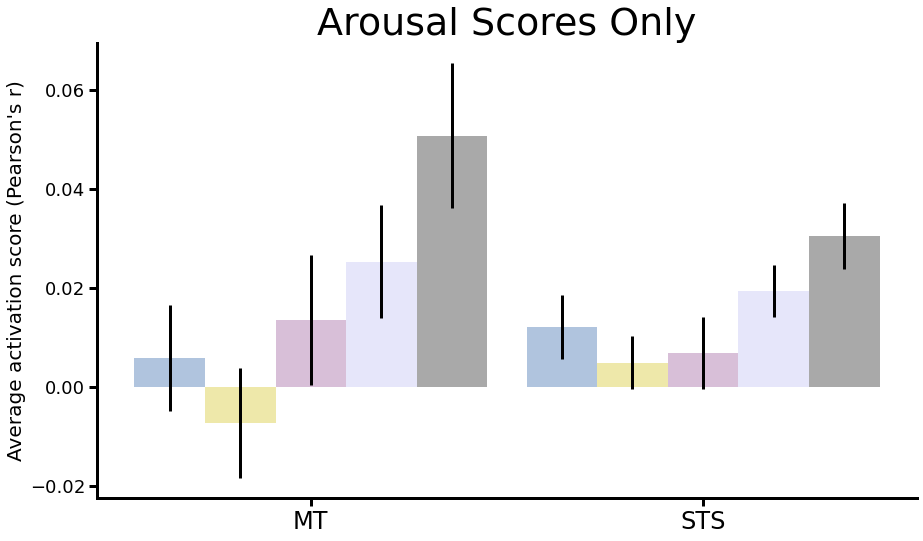

In [68]:
### mean activation for each subject in STS for arousal model

# Calculate the average of the array of individual subj average 
arousal_STS_34yrs_mean = sts_34yrs_arousal_score.mean()
arousal_STS_5yrs_mean = sts_5yrs_arousal_score.mean()
arousal_STS_7yrs_mean = sts_7yrs_arousal_score.mean()
arousal_STS_812yrs_mean = sts_812yrs_arousal_score.mean()
arousal_STS_adults_mean = sts_adult_arousal_score.mean()

#STD
arousal_STS_34yrs_std = np.std(sts_34yrs_arousal_score)
arousal_STS_5yrs_std= np.std(sts_5yrs_arousal_score)
arousal_STS_7yrs_std= np.std(sts_7yrs_arousal_score)
arousal_STS_812yrs_std= np.std(sts_812yrs_arousal_score)
arousal_STS_adults_std = np.std(sts_adult_arousal_score)

arousal_STS_34yrs_err = np.std(sts_34yrs_arousal_score)/np.sqrt(len(sts_34yrs_arousal_score))
arousal_STS_5yrs_err= np.std(sts_5yrs_arousal_score)/np.sqrt(len(sts_5yrs_arousal_score))
arousal_STS_7yrs_err= np.std(sts_7yrs_arousal_score)/np.sqrt(len(sts_7yrs_arousal_score))
arousal_STS_812yrs_err= np.std(sts_812yrs_arousal_score)/np.sqrt(len(sts_812yrs_arousal_score))
arousal_STS_adults_err = np.std(sts_adult_arousal_score)/np.sqrt(len(sts_adult_arousal_score))

### mean activation for each subject in MT for arousal model

# Calculate the average of the array of individual subj average 
arousal_MT_34yrs_mean = mt_34yrs_arousal_score.mean()
#print(arousal_MT_34yrs_mean)
arousal_MT_5yrs_mean = mt_5yrs_arousal_score.mean()
arousal_MT_7yrs_mean = mt_7yrs_arousal_score.mean()
arousal_MT_812yrs_mean = mt_812yrs_arousal_score.mean()
arousal_MT_adults_mean = mt_adult_arousal_score.mean()

#std
arousal_MT_34yrs_std = np.std(mt_34yrs_arousal_score)
arousal_MT_5yrs_std= np.std(mt_5yrs_arousal_score)
arousal_MT_7yrs_std= np.std(mt_7yrs_arousal_score)
arousal_MT_812yrs_std= np.std(mt_812yrs_arousal_score)
arousal_MT_adults_std = np.std(mt_adult_arousal_score)

#err
arousal_MT_34yrs_err = np.std(mt_34yrs_arousal_score)/np.sqrt(len(mt_34yrs_arousal_score))
arousal_MT_5yrs_err= np.std(mt_5yrs_arousal_score)/np.sqrt(len(mt_5yrs_arousal_score))
arousal_MT_7yrs_err= np.std(mt_7yrs_arousal_score)/np.sqrt(len(mt_7yrs_arousal_score))
arousal_MT_812yrs_err= np.std(mt_812yrs_arousal_score)/np.sqrt(len(mt_812yrs_arousal_score))
arousal_MT_adults_err = np.std(mt_adult_arousal_score)/np.sqrt(len(mt_adult_arousal_score))

# Define labels, positions, bar heights and error bar heights
labels = ['MT','STS']
X_axis = np.arange(len(labels))


arousal_34 = [arousal_MT_34yrs_mean, arousal_STS_34yrs_mean]
error = [arousal_MT_34yrs_err, arousal_STS_34yrs_err]

arousal_5 = [arousal_MT_5yrs_mean, arousal_STS_5yrs_mean]
error2 = [arousal_MT_5yrs_err, arousal_STS_5yrs_err ]

arousal_7 = [arousal_MT_7yrs_mean, arousal_STS_7yrs_mean]
error3 = [arousal_MT_7yrs_err, arousal_STS_7yrs_err ]

arousal_812 = [arousal_MT_812yrs_mean, arousal_STS_812yrs_mean]
error4 = [arousal_MT_812yrs_err, arousal_STS_812yrs_err ]

arousal_adult = [arousal_MT_adults_mean, arousal_STS_adults_mean]
error5 = [arousal_MT_adults_err, arousal_STS_adults_err]

_, ax = plt.subplots(figsize=(14.69, 8.38))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(3)
ax.spines['bottom'].set_linewidth(3)
ax.tick_params(width=3, length=8)
ax.bar(X_axis - 0.36, arousal_34, 0.18, yerr=error, label = '3-4 yrs', color = 'lightsteelblue', error_kw=dict(lw=3))
ax.bar(X_axis - 0.18, arousal_5, 0.18, yerr= error2, label = '5 yrs', color ='palegoldenrod', error_kw=dict(lw=3))
ax.bar(X_axis + 0.0, arousal_7, 0.18, yerr= error3, label = '7 yrs', color ='thistle', error_kw=dict(lw=3))
ax.bar(X_axis + 0.18, arousal_812, 0.18, yerr= error4, label = '8-12 yrs', color ='lavender', error_kw=dict(lw=3))
ax.bar(X_axis + 0.36, arousal_adult, 0.18, yerr= error5, label = 'adults', color ='darkgrey', error_kw=dict(lw=3))

ax.set_xticks([0,1])
ax.set_xticklabels(labels, fontsize=24)
ax.tick_params(axis='y', which='major', labelsize=18)
ax.set_ylabel("Average activation score (Pearson's r)", fontsize=20)
ax.set_title("Arousal Scores Only", fontsize=38)
#ax.set_yticks([0, 0.05, 0.10, 0.15, 0.20])
#ax.set_ylim([0, 0.2])
ax.legend([], [], frameon=False)
plt.savefig('Arousal_only.pdf')
plt.show()


<h1> t-test (Arousal)

In [69]:
#t test

from scipy.stats import ttest_ind
from scipy.stats import t


##### STS #######

#3-4yr vs adults

# Two sample groups with different mean values and sample sizes
adults_STS_arousal = sts_adult_arousal_score
child34_STS_arousal = sts_34yrs_arousal_score

# Perform one-sided unpaired t-test with unequal variances assumed
tstat_34_arousal_sts, pval_34_arousal_sts = ttest_ind(adults_STS_arousal, child34_STS_arousal, equal_var=False)

# Print results
#print("t-stat for arousal score 3-4 yrs vs adult in STS:", tstat_34_arousal_sts)
#print("p-val for arousal score 3-4 yrs vs adult in STS:", pval_34_arousal_sts/2) # Divide p-value by 2 for one-sided test

if pval_34_arousal_sts/2 < 0.05 and pval_34_arousal_sts/2 > 0.01:
    print("p-val for arousal score 3-4 yrs vs adult in STS:", "*")
elif pval_34_arousal_sts/2 < 0.01 and pval_34_arousal_sts/2 > 0.001:
    print ("p-val for arousal score 3-4 yrs vs adult in STS:", "**")
elif pval_34_arousal_sts/2 < 0.001:
    print ("p-val for arousal score 3-4 yrs vs adult in STS:", "***")
elif pval_34_arousal_sts/2 > 0.05:
    print ("p-val for arousal score 3-4 yrs vs adult in STS", "NOT significant:", pval_34_arousal_sts/2 )


#5yr vs adults

# Two sample groups with different mean values and sample sizes
adults_STS_arousal = sts_adult_arousal_score
child5_STS_arousal = sts_5yrs_arousal_score

# Perform one-sided unpaired t-test with unequal variances assumed
tstat_5_arousal_sts, pval_5_arousal_sts = ttest_ind(adults_STS_arousal, child5_STS_arousal, equal_var=False)

# Print results
#print("t-stat for arousal score 5 yrs vs adult in STS:", tstat_5_arousal_sts)
#print("p-val for arousal score 5 yrs vs adult in STS:", pval_5_arousal_sts/2) # Divide p-value by 2 for one-sided test

if pval_5_arousal_sts/2 < 0.05 and pval_5_arousal_sts/2 > 0.01:
    print("p-val for arousal score 5 yrs vs adult in STS:", "*")
elif pval_5_arousal_sts/2 < 0.01 and pval_5_arousal_sts/2 > 0.001:
    print ("p-val for arousal score 5 yrs vs adult in STS:", "**")
elif pval_5_arousal_sts/2 < 0.001:
    print ("p-val for arousal score 5 yrs vs adult in STS:", "***")
elif pval_5_arousal_sts/2 > 0.05:
    print ("p-val for arousal score 5 yrs vs adult in STS", "NOT significant:", pval_5_arousal_sts/2 )

#7yr vs adults

# Two sample groups with different mean values and sample sizes
adults_STS_arousal = sts_adult_arousal_score
child7_STS_arousal = sts_7yrs_arousal_score

# Perform one-sided unpaired t-test with unequal variances assumed
tstat_7_arousal_sts, pval_7_arousal_sts = ttest_ind(adults_STS_arousal, child7_STS_arousal, equal_var=False)

# Print results
#print("t-stat for arousal score 7 yrs vs adult in STS:", tstat_7_arousal_sts)
#print("p-val for arousal score 7 yrs vs adult in STS:", pval_7_arousal_sts/2) # Divide p-value by 2 for one-sided test

if pval_7_arousal_sts/2 < 0.05 and pval_7_arousal_sts/2 > 0.01:
    print("p-val for arousal score 7 yrs vs adult in STS:", "*")
elif pval_7_arousal_sts/2 < 0.01 and pval_7_arousal_sts/2 > 0.001:
    print ("p-val for arousal score 7 yrs vs adult in STS:", "**")
elif pval_7_arousal_sts/2 < 0.001:
    print ("p-val for arousal score 7 yrs vs adult in STS:", "***")
elif pval_7_arousal_sts/2 > 0.05:
    print ("p-val for arousal score 7 yrs vs adult in STS", "NOT significant:", pval_7_arousal_sts/2 )

#8-12yr vs adults

# Two sample groups with different mean values and sample sizes
adults_STS_arousal = sts_adult_arousal_score
child812_STS_arousal = sts_812yrs_arousal_score

# Perform one-sided unpaired t-test with unequal variances assumed
tstat_812_arousal_sts, pval_812_arousal_sts = ttest_ind(adults_STS_arousal, child812_STS_arousal, equal_var=False)

# Print results
#print("t-stat for arousal score 8-12 yrs vs adult in STS:", tstat_812_arousal_sts)
#print("p-val for arousal score 8-12 yrs vs adult in STS:", pval_812_arousal_sts/2) # Divide p-value by 2 for one-sided test
if pval_812_arousal_sts/2 < 0.05 and pval_812_arousal_sts/2 > 0.01:
    print("p-val for arousal score 8-12 yrs vs adult in STS:", "*")
elif pval_812_arousal_sts/2 < 0.01 and pval_812_arousal_sts/2 > 0.001:
    print ("p-val for arousal score 8-12 yrs vs adult in STS:", "**")
elif pval_812_arousal_sts/2 < 0.001:
    print ("p-val for arousal score 8-12 yrs vs adult in STS:", "***")
elif pval_812_arousal_sts/2 > 0.05:
    print ("p-val for arousal score 8-12 yrs vs adult in STS", "NOT significant:", pval_812_arousal_sts/2 )
    
##### MT ######

#3-4yr vs adults

# Two sample groups with different mean values and sample sizes
adults_MT_arousal = mt_adult_arousal_score
child34_MT_arousal = mt_34yrs_arousal_score

# Perform one-sided unpaired t-test with unequal variances assumed
tstat_34_arousal_mt, pval_34_arousal_mt = ttest_ind(adults_MT_arousal, child34_MT_arousal, equal_var=False)

# Print results
#print("t-stat for arousal score 3-4 yrs vs adult in MT:", tstat_34_arousal_mt)
#print("p-val for arousal score 3-4 yrs vs adult in MT:", pval_34_arousal_mt/2) # Divide p-value by 2 for one-sided test
if pval_34_arousal_mt/2 < 0.05 and pval_34_arousal_mt/2 > 0.01:
    print("p-val for arousal score 3-4 yrs vs adult in MT:", "*")
elif pval_34_arousal_mt/2 < 0.01 and pval_34_arousal_mt/2 > 0.001:
    print ("p-val for arousal score 3-4 yrs vs adult in MT:", "**")
elif pval_34_arousal_mt/2 < 0.001:
    print ("p-val for arousal score 3-4 yrs vs adult in MT:", "***")
elif pval_34_arousal_mt/2 > 0.05:
    print ("p-val for arousal score 3-4 yrs vs adult in MT", "NOT significant:", pval_34_arousal_mt/2 )

    
#5yr vs adults

# Two sample groups with different mean values and sample sizes
adults_MT_arousal = mt_adult_arousal_score
child5_MT_arousal = mt_5yrs_arousal_score

# Perform one-sided unpaired t-test with unequal variances assumed
tstat_5_arousal_mt, pval_5_arousal_mt = ttest_ind(adults_MT_arousal, child5_MT_arousal, equal_var=False)

# Print results
#print("t-stat for arousal score 5 yrs vs adult in MT:", tstat_5_arousal_mt)
#print("p-val for arousal score 5 yrs vs adult in MT:", pval_5_arousal_mt/2) # Divide p-value by 2 for one-sided test
if pval_5_arousal_mt/2 < 0.05 and pval_5_arousal_mt/2 > 0.01:
    print("p-val for arousal score 5 yrs vs adult in MT:", "*")
elif pval_5_arousal_mt/2 < 0.01 and pval_5_arousal_mt/2 > 0.001:
    print ("p-val for arousal score 5 yrs vs adult in MT:", "**")
elif pval_5_arousal_mt/2 < 0.001:
    print ("p-val for arousal score 5 yrs vs adult in MT:", "***")
elif pval_5_arousal_mt/2 > 0.05:
    print ("p-val for arousal score 5 yrs vs adult in MT", "NOT significant:", pval_5_arousal_mt/2 )



#7yr vs adults

# Two sample groups with different mean values and sample sizes
adults_MT_arousal = mt_adult_arousal_score
child7_MT_arousal = mt_7yrs_arousal_score

# Perform one-sided unpaired t-test with unequal variances assumed
tstat_7_arousal_mt, pval_7_arousal_mt = ttest_ind(adults_MT_arousal, child7_MT_arousal, equal_var=False)

# Print results
#print("t-stat for arousal score 7 yrs vs adult in MT:", tstat_7_arousal_mt)
#print("p-val for arousal score 7 yrs vs adult in MT:", pval_7_arousal_mt/2) # Divide p-value by 2 for one-sided test
if pval_7_arousal_mt/2 < 0.05 and pval_7_arousal_mt/2 > 0.01:
    print("p-val for arousal score 7 yrs vs adult in MT:", "*")
elif pval_7_arousal_mt/2 < 0.01 and pval_7_arousal_mt/2 > 0.001:
    print ("p-val for arousal score 7 yrs vs adult in MT:", "**")
elif pval_7_arousal_mt/2 < 0.001:
    print ("p-val for arousal score 7 yrs vs adult in MT:", "***")
elif pval_7_arousal_mt/2 > 0.05:
    print ("p-val for arousal score 7 yrs vs adult in MT", "NOT significant:",pval_7_arousal_mt/2 )
    
    
#8-12 yr vs adults

# Two sample groups with different mean values and sample sizes
adults_MT_arousal = mt_adult_arousal_score
child812_MT_arousal = mt_812yrs_arousal_score

# Perform one-sided unpaired t-test with unequal variances assumed
tstat_812_arousal_mt, pval_812_arousal_mt = ttest_ind(adults_MT_arousal, child812_MT_arousal, equal_var=False)

# Print results
#print("t-stat for arousal score 8-12 yrs vs adult in MT:", tstat_812_arousal_mt)
#print("p-val for arousal score 8-12 yrs vs adult in MT:", pval_812_arousal_mt/2) # Divide p-value by 2 for one-sided test
if pval_812_arousal_mt/2 < 0.05 and pval_812_arousal_mt/2 > 0.01:
    print("p-val for arousal score 8-12 yrs vs adult in MT:", "*")
elif pval_812_arousal_mt/2 < 0.01 and pval_812_arousal_mt/2 > 0.001:
    print ("p-val for arousal score 8-12 yrs vs adult in MT:", "**")
elif pval_812_arousal_mt/2 < 0.001:
    print ("p-val for arousal score 8-12 yrs vs adult in MT:", "***")
elif pval_812_arousal_mt/2 > 0.05:
    print ("p-val for arousal score 8-12 yrs vs adult in MT", "NOT significant:",pval_812_arousal_mt/2 )

p-val for arousal score 3-4 yrs vs adult in STS: *
p-val for arousal score 5 yrs vs adult in STS: **
p-val for arousal score 7 yrs vs adult in STS: *
p-val for arousal score 8-12 yrs vs adult in STS NOT significant: 0.10024485406845668
p-val for arousal score 3-4 yrs vs adult in MT: **
p-val for arousal score 5 yrs vs adult in MT: **
p-val for arousal score 7 yrs vs adult in MT: *
p-val for arousal score 8-12 yrs vs adult in MT NOT significant: 0.09187667525394405


<h1> Two-way Anova </h1>

In [57]:

age_groups = ['34yrs', '5yrs', '7yrs', '812yrs', 'adult']
#features = ['ToM', 'SI', 'face']
features = ['ToM', 'SI']
#features = ['ToM', 'face']
#features = ['SI', 'face']

data = []

for age in age_groups:
    for feature in features:
        array_name = f'sts_{age}_{feature}_score'
        scores = eval(array_name) # Use the array name to get the actual array
        for score in scores:
            data.append([age, feature, score])

df = pd.DataFrame(data, columns=['Age', 'Feature', 'Score'])

print(df)

       Age Feature     Score
0    34yrs     ToM -0.070015
1    34yrs     ToM  0.022905
2    34yrs     ToM  0.008431
3    34yrs     ToM -0.063235
4    34yrs     ToM  0.020262
..     ...     ...       ...
305  adult      SI  0.037428
306  adult      SI  0.072578
307  adult      SI  0.028401
308  adult      SI  0.071536
309  adult      SI  0.093048

[310 rows x 3 columns]


In [58]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

#perform two-way ANOVA
model = ols('Score ~ C(Age) + C(Feature) + C(Age):C(Feature)', data=df).fit()
anova_results = sm.stats.anova_lm(model, typ=2)

# Display the entire ANOVA table
print(anova_results)
print("\n")  # Add a newline for clearer separation

# Extract p-values
p_values = anova_results['PR(>F)']

# Display p-values and significance
alpha = 0.05
for factor, p_val in p_values.iteritems():
    is_significant = "is significant" if p_val < alpha else "is not significant"
    print(f"{factor}: p-value = {p_val:.4f} ({is_significant})")

                     sum_sq     df          F        PR(>F)
C(Age)             0.032210    4.0   5.508563  2.719847e-04
C(Feature)         0.110562    1.0  75.634429  2.285025e-16
C(Age):C(Feature)  0.013750    4.0   2.351574  5.418808e-02
Residual           0.438538  300.0        NaN           NaN


C(Age): p-value = 0.0003 (is significant)
C(Feature): p-value = 0.0000 (is significant)
C(Age):C(Feature): p-value = 0.0542 (is not significant)
Residual: p-value = nan (is not significant)


In [72]:
# can say SI is trending toward earlier developing than ToM p = 0.054